In [1]:
import pandas as pd
import pickle as pkl

## Looking at direct impact

In [91]:
# Load all samples impacts:
combined_df = pd.read_parquet("../outputs/meta_df_impact.parquet")
combined_df["number of events"] = combined_df.groupby("sample")["step"].transform("count")

#### combined_df: all TC in one dataframe

Each row is a TC

- step: step of occurrence of event
- total_damage: total secs_exp destroyed (ie productive capital)
- affected: list regions affected by the event
- max_shock_intensity: max(damage/sec_exps) across all regions (ie highest share of production capacity lost due to event) -> replaced by mean 
- max_shock_intensity_pct: same but *100 (expressed as % lost) -> replaced by mean
- recovery_duration: length of recovery duration goal (is a function of max_shock_intensity)
- sample: sample id
- MRIOT: MRIOT used
- number of events : total number of TCs in the sample of the TC looked at

In [94]:
combined_df.sort_values("mean_shock_intensity").tail(20)

step  total_damage         affected  mean_shock_intensity  \
2038   367  2.278323e+10       [MEX, ROW]              0.002959   
2418   815  1.948461e+11            [USA]              0.002980   
1058   760  3.940931e+10            [ROW]              0.003134   
2467   482  2.399413e+09            [PHL]              0.003275   
249    797  2.399413e+09            [PHL]              0.003275   
2205  1596  6.503349e+10            [JPN]              0.003440   
1563  1119  5.390937e+09       [PHL, ROW]              0.003584   
2715   402  5.902644e+09       [PHL, ROW]              0.003608   
560     50  4.609179e+10       [MEX, ROW]              0.003685   
1344  1493  5.447666e+10            [ROW]              0.004332   
1185   483  6.000799e+11       [ROW, USA]              0.004624   
1813     0  1.067131e+11       [MEX, ROW]              0.004673   
2516    46  5.887413e+10            [ROW]              0.004682   
338    419  5.887413e+10            [ROW]              0.004682   
1742   432  3.667996e+09            [PHL]              0.005006   
1825   439  3.667996e+09            [PHL]              0.005006   
1287  1167  6.351409e+10            [ROW]              0.005050   
2477  1156  6.351409e+10            [ROW]              0.005050   
2671  1550  6.351409e+10            [ROW]              0.005050   
1565  1152  1.187852e+10  [COL, CRI, ROW]              0.034163   

      mean_shock_intensity_pct  recovery_duration  sample        MRIOT  \
2038                  0.295900               1000      75  OECD21-2018   
2418                  0.298000               1000       0  OECD21-2018   
1058                  0.313372               1000      95  OECD21-2018   
2467                  0.327480               1000      85  OECD21-2018   
249                   0.327480               1000      21  OECD21-2018   
2205                  0.343991               1000      90  OECD21-2018   
1563                  0.358411               1000      10  OECD21-2018   
2715                  0.360833               1000      45  OECD21-2018   
560                   0.368543               1000       7  OECD21-2018   
1344                  0.433184               1000      53  OECD21-2018   
1185                  0.462431               1000       1  OECD21-2018   
1813                  0.467332               1000      34  OECD21-2018   
2516                  0.468151               1000      27  OECD21-2018   
338                   0.468151               1000      92  OECD21-2018   
1742                  0.500621               1000      74  OECD21-2018   
1825                  0.500621               1000      34  OECD21-2018   
1287                  0.505047               1000      24  OECD21-2018   
2477                  0.505047               1000      85  OECD21-2018   
2671                  0.505047               1000      12  OECD21-2018   
1565                  3.416290               1000      10  OECD21-2018   

      number of events  
2038                31  
2418                28  
1058                26  
2467                29  
249                 25  
2205                30  
1563                29  
2715                25  
560                 27  
1344                28  
1185                37  
1813                33  
2516                25  
338                 28  
1742                29  
1825                33  
1287                39  
2477                29  
2671                38  
1565                29

To look at a specific sample:

In [117]:
combined_df.loc[(combined_df["sample"]==30)]

step  total_damage                        affected  \
1234     0  8.424389e+08                 [CHN, HKG, PHL]   
1235    68  8.590561e+08                      [CHN, TWN]   
1236    91  1.134691e+11            [CHN, HKG, PHL, TWN]   
1237   101  3.458926e+09                           [JPN]   
1238   114  4.156446e+08                 [CHN, LAO, VNM]   
1239   395  4.838315e+08                           [JPN]   
1240   411  4.329870e+09                 [CHN, JPN, ROW]   
1241   481  1.106385e+09                      [JPN, ROW]   
1242   799  2.468237e+08                           [CHN]   
1243  1054  1.992737e+09                      [JPN, ROW]   
1244  1157  2.816575e+09                      [ROW, USA]   
1245  1165  2.111556e+10                           [USA]   
1246  1181  1.830234e+09                           [JPN]   
1247  1197  5.138420e+09  [CHN, JPN, KOR, LAO, PHL, VNM]   
1248  1213  2.161925e+11                 [MEX, ROW, USA]   
1249  1224  9.765546e+08                           [USA]   
1250  1228  5.451979e+08                           [ROW]   
1251  1528  2.670024e+09                 [CHN, JPN, KOR]   
1252  1534  7.144992e+08                           [ROW]   
1253  1578  1.235252e+11            [CAN, MEX, ROW, USA]   

      mean_shock_intensity  mean_shock_intensity_pct  recovery_duration  \
1234              0.000020                  0.002000                 51   
1235              0.000289                  0.028883                136   
1236              0.002426                  0.242607                999   
1237              0.000183                  0.018296                 94   
1238              0.000261                  0.026060                124   
1239              0.000026                  0.002559                 52   
1240              0.000063                  0.006312                 60   
1241              0.000044                  0.004399                 56   
1242              0.000006                  0.000592                 49   
1243              0.000079                  0.007923                 64   
1244              0.000034                  0.003381                 54   
1245              0.000323                  0.032294                153   
1246              0.000097                  0.009681                 68   
1247              0.001074                  0.107389                785   
1248              0.002220                  0.222020                997   
1249              0.000015                  0.001494                 50   
1250              0.000043                  0.004335                 56   
1251              0.000021                  0.002135                 51   
1252              0.000057                  0.005682                 59   
1253              0.000891                  0.089055                637   

      sample        MRIOT  number of events  
1234      30  OECD21-2018                20  
1235      30  OECD21-2018                20  
1236      30  OECD21-2018                20  
1237      30  OECD21-2018                20  
1238      30  OECD21-2018                20  
1239      30  OECD21-2018                20  
1240      30  OECD21-2018                20  
1241      30  OECD21-2018                20  
1242      30  OECD21-2018                20  
1243      30  OECD21-2018                20  
1244      30  OECD21-2018                20  
1245      30  OECD21-2018                20  
1246      30  OECD21-2018                20  
1247      30  OECD21-2018                20  
1248      30  OECD21-2018                20  
1249      30  OECD21-2018                20  
1250      30  OECD21-2018                20  
1251      30  OECD21-2018                20  
1252      30  OECD21-2018                20  
1253      30  OECD21-2018                20

### Some stats on direct impacts

#### Inter Event Time (days) distribution per sample
Large graph (100 facets)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate inter-event time differences
df = combined_df.copy()
df["time_diff"] = df.groupby("sample")["step"].diff()

df = df.dropna()
df = df[df["time_diff"] > 0]

# Create a facet grid of histograms by sample
g = sns.FacetGrid(df, col="sample", col_wrap=3, height=4, sharex=False)
g.map_dataframe(sns.histplot, x="time_diff", bins=20, edgecolor="black")
g.set_titles("Sample {col_name}")
g.set_axis_labels("Inter-Event Time (days)", "Frequency")
g.tight_layout()
plt.show()

#### Inter event time and max shock intensity stats

In [ ]:
import pandas as pd

# Calculate inter-event time differences
df = combined_df.copy()
df["time_diff"] = df.groupby("sample")["step"].diff()

df = df.dropna()
df = df[df["time_diff"] > 0]

# Group by sample and calculate summary statistics
summary_df = df.groupby("sample").agg({
    "time_diff": ["mean", "std", "median", lambda x: x.quantile(0.75) - x.quantile(0.25)],
    "max_shock_intensity": ["mean", "std", "median", lambda x: x.quantile(0.75) - x.quantile(0.25)]
}).reset_index()

summary_df.columns = ['sample', 'time_diff_mean', 'time_diff_std', 'time_diff_median', 'interquartile_difference_time_diff',
                     'max_shock_intensity_mean', 'max_shock_intensity_std', 'max_shock_intensity_median', 'interquartile_difference_max_shock_intensity']

# Display the summary statistics
summary_df

#### Some Normalised measure of time diff and intensity

In [ ]:
import numpy as np
import pandas as pd

# Assuming df contains the relevant data
df = combined_df.copy()
df["time_diff"] = df.groupby("sample")["step"].diff()

df = df.dropna()
df = df[df["time_diff"] > 0]

# Normalize the variables
df["normalized_time_diff"] = (df["time_diff"] - df["time_diff"].min()) / (df["time_diff"].max() - df["time_diff"].min())
df["normalized_intensity"] = (df["max_shock_intensity"] - df["max_shock_intensity"].min()) / (df["max_shock_intensity"].max() - df["max_shock_intensity"].min())

# Define weights (e.g., 0.6 for inter-event time and 0.4 for intensity)
weight_time_diff = 0.5
weight_intensity = 0.5

# Calculate the weighted average
df["combined_measure"] = (weight_time_diff * df["normalized_time_diff"]) + (weight_intensity * df["normalized_intensity"])

# Group by sample and calculate the average combined measure
sample_characteristics = df.groupby("sample")["combined_measure"].mean().reset_index()

# Display the sample characteristics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a facet grid of histograms by sample
g = sns.FacetGrid(df, col="sample", col_wrap=3, height=4, sharex=False)
g.map_dataframe(sns.histplot, x="combined_measure", bins=20, edgecolor="black")
g.set_titles("Sample {col_name}")
g.set_axis_labels("Inter-Event Time (days) x Intensity", "Frequency")
g.tight_layout()
plt.show()

#### Max intensity per sample

In [ ]:
df = combined_df.copy()
df.sort_values(["max_shock_intensity_pct"],inplace=True)
sorted_samples = df.groupby("sample")["max_shock_intensity_pct"].mean().sort_values().index

plt.figure(figsize=(16, 7))
sns.boxplot(data=df, x="sample", y="max_shock_intensity_pct", order=sorted_samples)
plt.title("Distribution of Max Shock Intensity Percentage by Sample")
plt.xlabel("Sample")
plt.ylabel("Max Shock Intensity Percentage")
plt.tight_layout()
plt.show()

#### Number of events with max intensity > 0.01% of capital destroyed

In [ ]:
# Convert affected regions to individual rows
df = combined_df.copy()
affected_df = df.explode("affected")

# Filter high max_shock_intensity events (example threshold: 0.01)
high_intensity_df = affected_df[affected_df["max_shock_intensity_pct"] > 0.01]

# Calculate the count of high-intensity events for each region
sample_region_counts = high_intensity_df.groupby(["sample", "affected"]).size().unstack(fill_value=0)
sample_region_counts.loc[:,"All Regions"] = sample_region_counts.sum(axis=1)
sample_region_counts.loc["All samples",:] = sample_region_counts.sum(axis=0)
sample_region_counts=sample_region_counts.T
sample_region_counts = sample_region_counts.astype(int)
sample_region_counts.sort_values(axis=1,by="All Regions",inplace=True,ascending=False)
sample_region_counts.sort_values(axis=0,by="All samples",inplace=True,ascending=False)

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(data=sample_region_counts.drop("All samples",axis=1).drop("All Regions"), cmap="YlOrRd", annot=True, fmt="d")
plt.title("Regions Affected by Events with > 0.01% ")
plt.xlabel("Sample")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

## Indirect impacts results

### Setting up data

At the moment recent results are with OECD21 (more countries in west pacific)

In [3]:
mriot_name = "OECD21"

In [5]:
def add_europe(df,EU_regs):
    if "sector" in df.index.names:
        df.loc["Europe"] = df.loc[EU_regs].groupby("sector").sum()
    else:
        df.loc["Europe"] = df.loc[EU_regs].sum()
    return df

def get_affected_regions(group):
    affected_regions = group.loc[group["total direct impact"] > 0, ["region", "total direct impact"]]
    sorted_regions = affected_regions.sort_values(by="total direct impact", ascending=False)["region"].unique()
    return pd.Series({"affected regions": sorted_regions})

EU_regs_exio = ["AT","BE","BG","CH","DE","DK","EE","ES","FI","FR","GB","GR","HR","HU","IE","IT","LT","LU","LV","MT","NL","NO","PL","PT","RO","SE","SI","SK"]
EU_regs_wiod = ["AUT","BEL","BGR","CHE","DEU","DNK","EST","ESP","FIN","FRA","GBR","GRC","HRV","HUN","IRL","ITA","LTU","LUX","LVA","MLT","NLD","NOR","POL","PRT","ROU","SWE","SVN","SVK"]

if mriot_name == "OECD21":
    EU_regs = EU_regs_wiod
    with open("../outputs/OECD21-2018.pkl",'rb') as f:
        mriot = pkl.load(f)
else:
    EU_regs = EU_regs_exio
    with open("../outputs/EXIOBASE3-2010.pkl",'rb') as f:
        mriot = pkl.load(f)

VA_df = (mriot.x.T - mriot.Z.sum(axis=0)).loc['indout']
production_df = (mriot.x.T - mriot.Z.sum(axis=0)).loc['indout']
final_demand_df = mriot.Y.sum(axis=0).groupby("region").sum()

production_df = add_europe(production_df,EU_regs)
final_demand_df = add_europe(final_demand_df,EU_regs)

res_df = pd.read_parquet("../outputs/results_meta_df_OECD_update.parquet")
res_df = res_df.reset_index()

###################################################################################################################################################################
# The following lines sets the values for production_losses from production_realised such that positive values are production LOSSES and negative values are gains #
###################################################################################################################################################################
#res_df.loc[(res_df["variable"]=="production_realised"),"total indirect impact"] = res_df.loc[(res_df["variable"]=="production_realised"),"total indirect impact"]# * -1 # Positives == losses
res_df.replace(to_replace="production_realised", value="production_change", inplace=True)

res_df["sample total direct damage"] = res_df.groupby(["sample","MRIOT","invtype","simtype","variable"])["total direct impact"].transform("sum")
affected_regions_df = res_df.groupby(["sample", "MRIOT", "invtype", "simtype", "variable"]).apply(get_affected_regions)
#affected_regions_df
res_df = res_df.groupby(["sample","MRIOT","invtype","simtype","variable", "region"])[["total direct impact","total indirect impact","sample total direct damage"]].agg(
    {"total direct impact":"sum",
     "total indirect impact":"sum",
     "sample total direct damage":"first"}).reset_index()
res_df = res_df.merge(affected_regions_df, left_on=["sample", "MRIOT", "invtype", "simtype", "variable"], right_index=True)
# List of regions


# custom aggregation to handle the affected regions
grouped = res_df.loc[res_df.region.isin(EU_regs)].groupby(["sample", "MRIOT", "invtype", "simtype", "variable"]).agg({
    "region": lambda x: "Europe",  # Set region to "Europe"
    "total direct impact": "sum",   # Sum total direct impact
    "total indirect impact": "sum",  # Sum total indirect impact
    "sample total direct damage": "first",  # Sum sample total direct damage
    "affected regions": "first"  # Use the first value of affected regions
}).reset_index()

# Display the updated DataFrame
res_df = pd.concat([res_df, grouped], ignore_index=True)
# Create a mask to filter rows where variable is "final_demand_unmet" or "production_change"
mask = (res_df["variable"] == "final_demand_unmet") | (res_df["variable"] == "production_change")

# Calculate 'relative indirect impact' based on variable
res_df.loc[mask, 'relative indirect impact'] = res_df.loc[mask, 'total indirect impact'] / res_df.loc[mask, 'region'].map(final_demand_df if 'final_demand_unmet' in res_df['variable'].values else production_region_df.groupby('region').sum())

dir_imp_df = combined_df[["sample","recovery_duration","mean_shock_intensity","number of events"]].groupby("sample",as_index=False).agg(
    {"recovery_duration":"sum",
     "mean_shock_intensity":"mean",
     "number of events":"first"
    })

res_df = res_df.merge(dir_imp_df, how="left", on="sample")

#### res_df
- sample : sample id
- MRIOT : MRIOT used for simulation
- invtype : type of inventory "scenario" use (example: 90-60 is 90 days stocks, 60 days rate)
- simtype : aggregated is all events taken together, separated is all events isolated then summed
- variable : variables looked at (e.g. production realised shows the cumulated difference between actual production during the simulation and initial production (*positive values are losses*))
- region : is the region looked at
- total direct impact : total direct impact (in the region) **/!\ in €**
- total indirect impact : total indirect impact (in the region) (the value of "variable") **/!\ in M€**
- sample total direct damage : total direct impact for the whole sample **/!\ in €**
- affected regions : all regions affected by at least one event **sorted by direct impact**.
- relative indirect impact : indirect loss relative to yearly output or final demand (Say total production losses in 1M€ and yearly production is 100M€ then relative indirect impact = 1/100 = 0.01)
- recovery_duration : sum of all recovery duration (has no real meaning)
- mean_shock_intensity : average of the "mean shock intensity of all TCs" of the sample
- number of events : total number of event of the sample 

In [257]:
res_df.loc[(res_df["sample"]==15) & (res_df["region"]=="ARG")]

sample        MRIOT invtype     simtype            variable region  \
8040      15  OECD21-2018     9-6  aggregated  final_demand_unmet    ARG   
8107      15  OECD21-2018     9-6  aggregated   production_change    ARG   
8174      15  OECD21-2018     9-6   separated  final_demand_unmet    ARG   
8241      15  OECD21-2018     9-6   separated   production_change    ARG   
8308      15  OECD21-2018   90-60  aggregated  final_demand_unmet    ARG   
8375      15  OECD21-2018   90-60  aggregated   production_change    ARG   
8442      15  OECD21-2018   90-60   separated  final_demand_unmet    ARG   
8509      15  OECD21-2018   90-60   separated   production_change    ARG   

      total direct impact  total indirect impact  sample total direct damage  \
8040                  0.0              64.801258                1.901355e+11   
8107                  0.0              96.245761                1.901355e+11   
8174                  0.0             104.342078                1.901355e+11   
8241                  0.0             122.711818                1.901355e+11   
8308                  0.0              70.469509                1.901355e+11   
8375                  0.0              98.666441                1.901355e+11   
8442                  0.0             116.087195                1.901355e+11   
8509                  0.0             138.859235                1.901355e+11   

                                       affected regions  \
8040  [USA, ROW, JPN, CHN, MEX, CAN, TWN, PHL, HKG, ...   
8107  [USA, ROW, JPN, CHN, MEX, CAN, TWN, PHL, HKG, ...   
8174  [USA, ROW, JPN, CHN, MEX, CAN, TWN, PHL, HKG, ...   
8241  [USA, ROW, JPN, CHN, MEX, CAN, TWN, PHL, HKG, ...   
8308  [USA, ROW, JPN, CHN, MEX, CAN, TWN, PHL, HKG, ...   
8375  [USA, ROW, JPN, CHN, MEX, CAN, TWN, PHL, HKG, ...   
8442  [USA, ROW, JPN, CHN, MEX, CAN, TWN, PHL, HKG, ...   
8509  [USA, ROW, JPN, CHN, MEX, CAN, TWN, PHL, HKG, ...   

      relative indirect impact  recovery_duration  mean_shock_intensity  \
8040                  0.000134               3579              0.000206   
8107                  0.000199               3579              0.000206   
8174                  0.000216               3579              0.000206   
8241                  0.000254               3579              0.000206   
8308                  0.000146               3579              0.000206   
8375                  0.000204               3579              0.000206   
8442                  0.000240               3579              0.000206   
8509                  0.000287               3579              0.000206   

      number of events  
8040                26  
8107                26  
8174                26  
8241                26  
8308                26  
8375                26  
8442                26  
8509                26

In [55]:
# quick check
assert not res_df.isna().any().any()

### Looking at specific samples

- ```(res_df.region=="Europe") & (res_df["total direct impact"]==0)``` to look at indirect losses in Europe from events that did not affect Europe.
- ```.sort_values("relative indirect impact").iloc[[0,1,2,3,4,5,6,7,-7,-6,-5,-4,-3,-2,-1]]``` to look at the most and least indirectly damaging events.

In [6]:
res_df.loc[(res_df.region=="Europe") & (res_df.variable=="production_change")].sort_values("relative indirect impact").iloc[[0,1,2,3,4,5,6,7,-7,-6,-5,-4,-3,-2,-1]]

sample        MRIOT invtype     simtype           variable  region  \
54227      78  OECD21-2018     9-6   separated  production_change  Europe   
53707      13  OECD21-2018     9-6   separated  production_change  Europe   
54251      81  OECD21-2018     9-6   separated  production_change  Europe   
54155      69  OECD21-2018     9-6   separated  production_change  Europe   
53899      37  OECD21-2018     9-6   separated  production_change  Europe   
54387      98  OECD21-2018     9-6   separated  production_change  Europe   
54355      94  OECD21-2018     9-6   separated  production_change  Europe   
54307      88  OECD21-2018     9-6   separated  production_change  Europe   
53879      34  OECD21-2018   90-60   separated  production_change  Europe   
53611       1  OECD21-2018     9-6   separated  production_change  Europe   
53615       1  OECD21-2018   90-60   separated  production_change  Europe   
53609       1  OECD21-2018     9-6  aggregated  production_change  Europe   
53613       1  OECD21-2018   90-60  aggregated  production_change  Europe   
53873      34  OECD21-2018     9-6  aggregated  production_change  Europe   
53877      34  OECD21-2018   90-60  aggregated  production_change  Europe   

       total direct impact  total indirect impact  sample total direct damage  \
54227                  0.0             984.778255                5.112260e+10   
53707                  0.0            1000.427557                5.559337e+10   
54251                  0.0            1146.908009                6.655239e+10   
54155                  0.0            1269.703443                7.454042e+10   
53899                  0.0            1289.594194                7.293318e+10   
54387                  0.0            1339.111116                4.708307e+10   
54355                  0.0            1446.189628                6.793175e+10   
54307                  0.0            1452.688804                6.935008e+10   
53879                  0.0           35934.093342                7.444584e+11   
53611                  0.0           36958.043721                8.075462e+11   
53615                  0.0           37369.500839                8.075462e+11   
53609                  0.0           42110.451917                8.075462e+11   
53613                  0.0           42186.849904                8.075462e+11   
53873                  0.0           44697.962857                7.444584e+11   
53877                  0.0           44757.879036                7.444584e+11   

                                        affected regions  \
54227  [CHN, JPN, TWN, VNM, USA, PHL, ROW, KOR, LAO, ...   
53707  [CHN, USA, JPN, ROW, KOR, PHL, TWN, VNM, MEX, ...   
54251  [CHN, USA, JPN, ROW, VNM, MEX, TWN, CAN, THA, ...   
54155  [USA, JPN, CHN, VNM, TWN, CAN, ROW, KOR, PHL, ...   
53899  [CHN, USA, JPN, KOR, ROW, TWN, VNM, HKG, PHL, ...   
54387  [CHN, JPN, USA, ROW, KOR, VNM, MEX, TWN, PHL, ...   
54355  [CHN, JPN, USA, MEX, TWN, KOR, ROW, VNM, CAN, ...   
54307  [CHN, USA, KOR, ROW, JPN, VNM, TWN, MEX, PHL, ...   
53879  [USA, ROW, CHN, KOR, JPN, MEX, PHL, TWN, VNM, ...   
53611  [USA, ROW, JPN, CHN, TWN, KOR, CAN, MEX, PHL, ...   
53615  [USA, ROW, JPN, CHN, TWN, KOR, CAN, MEX, PHL, ...   
53609  [USA, ROW, JPN, CHN, TWN, KOR, CAN, MEX, PHL, ...   
53613  [USA, ROW, JPN, CHN, TWN, KOR, CAN, MEX, PHL, ...   
53873  [USA, ROW, CHN, KOR, JPN, MEX, PHL, TWN, VNM, ...   
53877  [USA, ROW, CHN, KOR, JPN, MEX, PHL, TWN, VNM, ...   

       relative indirect impact  recovery_duration  mean_shock_intensity  \
54227                  0.000054               2737              0.000226   
53707                  0.000055               1931              0.000112   
54251                  0.000063               1874              0.000071   
54155                  0.000070               2265              0.000148   
53899                  0.000071               2524              0.000093   
54387                  0.000074               1853          

### Renaming for nice plots
- Names for plots
- Correct units

In [7]:
clean_df = res_df.copy()

# Replace variable values
clean_df['variable'] = clean_df['variable'].replace({'production_change': 'Production change', 'final_demand_unmet': 'Final demand losses'})
clean_df['simtype'] = clean_df['simtype'].replace({'aggregated': 'Yes', 'separated': 'No'})

# Replace column names
clean_df = clean_df.rename(columns={'total direct impact': 'Total direct impact (€ Billions)',
                                    'total indirect impact': 'Total indirect impact (€ Billions)',
                                    'sample total direct damage': 'Sample total direct impact (€ Billions)',
                                    'recovery_duration': 'Cumulated recovery time',
                                    'mean_shock_intensity': 'Mean sample shock intensity',
                                    'number of events': 'Sample number of events',
                                    'relative indirect impact' : 'Relative indirect impact',
                                    'variable':'Variable',
                                    'sample':'Sample',
                                    'region':'Region',
                                    'affected regions':'Affected regions'
                                   })
clean_df['Total direct impact (€ Billions)'] = clean_df['Total direct impact (€ Billions)'] / 1e9  # Divide by 10^9 as direct impact are in €
clean_df['Total indirect impact (€ Billions)'] = clean_df['Total indirect impact (€ Billions)'] / 1e3  # Divide by 10^3 as indirect impact are in M€
clean_df["Sample total direct impact (€ Billions)"] = clean_df["Sample total direct impact (€ Billions)"] / 1e9 # Divide by 10^9 as direct impact are in €
clean_df = clean_df.rename(columns={'invtype': 'Inv. Scenario', 'simtype': 'Event interaction ?'})
clean_df

Sample        MRIOT Inv. Scenario Event interaction ?  \
0           0  OECD21-2018           9-6                 Yes   
1           0  OECD21-2018           9-6                 Yes   
2           0  OECD21-2018           9-6                 Yes   
3           0  OECD21-2018           9-6                 Yes   
4           0  OECD21-2018           9-6                 Yes   
...       ...          ...           ...                 ...   
54395      99  OECD21-2018           9-6                  No   
54396      99  OECD21-2018         90-60                 Yes   
54397      99  OECD21-2018         90-60                 Yes   
54398      99  OECD21-2018         90-60                  No   
54399      99  OECD21-2018         90-60                  No   

                  Variable  Region  Total direct impact (€ Billions)  \
0      Final demand losses     ARG                               0.0   
1      Final demand losses     AUS                               0.0   
2      Final demand losses     AUT                               0.0   
3      Final demand losses     BEL                               0.0   
4      Final demand losses     BGR                               0.0   
...                    ...     ...                               ...   
54395    Production change  Europe                               0.0   
54396  Final demand losses  Europe                               0.0   
54397    Production change  Europe                               0.0   
54398  Final demand losses  Europe                               0.0   
54399    Production change  Europe                               0.0   

       Total indirect impact (€ Billions)  \
0                                0.108053   
1                                0.507201   
2                                0.226665   
3                                0.278806   
4                                0.057032   
...                                   ...   
54395                            2.178820   
54396                            3.428745   
54397                            4.843224   
54398                            4.622572   
54399                            2.820955   

       Sample total direct impact (€ Billions)  \
0                                   338.314777   
1                                   338.314777   
2                                   338.314777   
3                                   338.314777   
4                                   338.314777   
...                                        ...   
54395                               103.661265   
54396                               103.661265   
54397                               103.661265   
54398                               103.661265   
54399                               103.661265   

                                        Affected regions  \
0      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
1      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
2      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
3      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
4      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
...                                                  ...   
54395  [USA, CHN, JPN, TWN, ROW, VNM, MEX, HKG, PHL, ...   
54396  [USA, CHN, JPN, TWN, ROW, VNM, MEX, HKG, PHL, ...   
54397  [USA, CHN, JPN, TWN, ROW, VNM, MEX, HKG, PHL, ...   
54398  [USA, CHN, JPN, TWN, ROW, VNM, MEX, HKG, PHL, ...   
54399  [USA, CHN, JPN, TWN, ROW, VNM, MEX, HKG, PHL, ...   

       Relative indirect impact  Cumulated recovery time  \
0                      0.000224                     6501   
1                      0.000378                     6501   
2                      0.000541                     6501   
3                      0.000518                     6501   
4                      0.000943                     6501   
...                         ...                      ...   
54395                  0.000120                     2480   
54396                  0.00018

In [261]:
clean_df.loc[(clean_df["Sample"]==15) & (clean_df["Region"]=="ARG")]

Sample        MRIOT Inv. Scenario Event interaction ?  \
8040      15  OECD21-2018           9-6                 Yes   
8107      15  OECD21-2018           9-6                 Yes   
8174      15  OECD21-2018           9-6                  No   
8241      15  OECD21-2018           9-6                  No   
8308      15  OECD21-2018         90-60                 Yes   
8375      15  OECD21-2018         90-60                 Yes   
8442      15  OECD21-2018         90-60                  No   
8509      15  OECD21-2018         90-60                  No   

                 Variable Region  Total direct impact (€ Billions)  \
8040  Final demand losses    ARG                               0.0   
8107    Production change    ARG                               0.0   
8174  Final demand losses    ARG                               0.0   
8241    Production change    ARG                               0.0   
8308  Final demand losses    ARG                               0.0   
8375    Production change    ARG                               0.0   
8442  Final demand losses    ARG                               0.0   
8509    Production change    ARG                               0.0   

      Total indirect impact (€ Billions)  \
8040                            0.064801   
8107                            0.096246   
8174                            0.104342   
8241                            0.122712   
8308                            0.070470   
8375                            0.098666   
8442                            0.116087   
8509                            0.138859   

      Sample total direct impact (€ Billions)  \
8040                               190.135526   
8107                               190.135526   
8174                               190.135526   
8241                               190.135526   
8308                               190.135526   
8375                               190.135526   
8442                               190.135526   
8509                               190.135526   

                                       Affected regions  \
8040  [USA, ROW, JPN, CHN, MEX, CAN, TWN, PHL, HKG, ...   
8107  [USA, ROW, JPN, CHN, MEX, CAN, TWN, PHL, HKG, ...   
8174  [USA, ROW, JPN, CHN, MEX, CAN, TWN, PHL, HKG, ...   
8241  [USA, ROW, JPN, CHN, MEX, CAN, TWN, PHL, HKG, ...   
8308  [USA, ROW, JPN, CHN, MEX, CAN, TWN, PHL, HKG, ...   
8375  [USA, ROW, JPN, CHN, MEX, CAN, TWN, PHL, HKG, ...   
8442  [USA, ROW, JPN, CHN, MEX, CAN, TWN, PHL, HKG, ...   
8509  [USA, ROW, JPN, CHN, MEX, CAN, TWN, PHL, HKG, ...   

      Relative indirect impact  Cumulated recovery time  \
8040                  0.000134                     3579   
8107                  0.000199                     3579   
8174                  0.000216                     3579   
8241                  0.000254                     3579   
8308                  0.000146                     3579   
8375                  0.000204                     3579   
8442                  0.000240                     3579   
8509                  0.000287                     3579   

      Mean sample shock intensity  Sample number of events  
8040                     0.000206                       26  
8107                     0.000206                       26  
8174                     0.000206                       26  
8241                     0.000206                       26  
8308                     0.000206                       26  
8375                     0.000206                       26  
8442                     0.000206                       26  
8509                     0.000206                       26

### Indirect Impact (Comparing aggregated events vs separated events)

#### Absolute losses

- Note that we use log and symlog scales
- symlog is for production losses as there are negative losses (ie gains) (otherwise we miss the data)
- change the ```variable = x ``` to either "Final demand losses" or "Production losses"
- change the ```inv_type = x ``` to either "9-6" or "90-60"
- you might want to further filter plot_df_europe with ```(plot_europe_df["total direct impact"]==0)```

<Figure size 640x480 with 0 Axes>

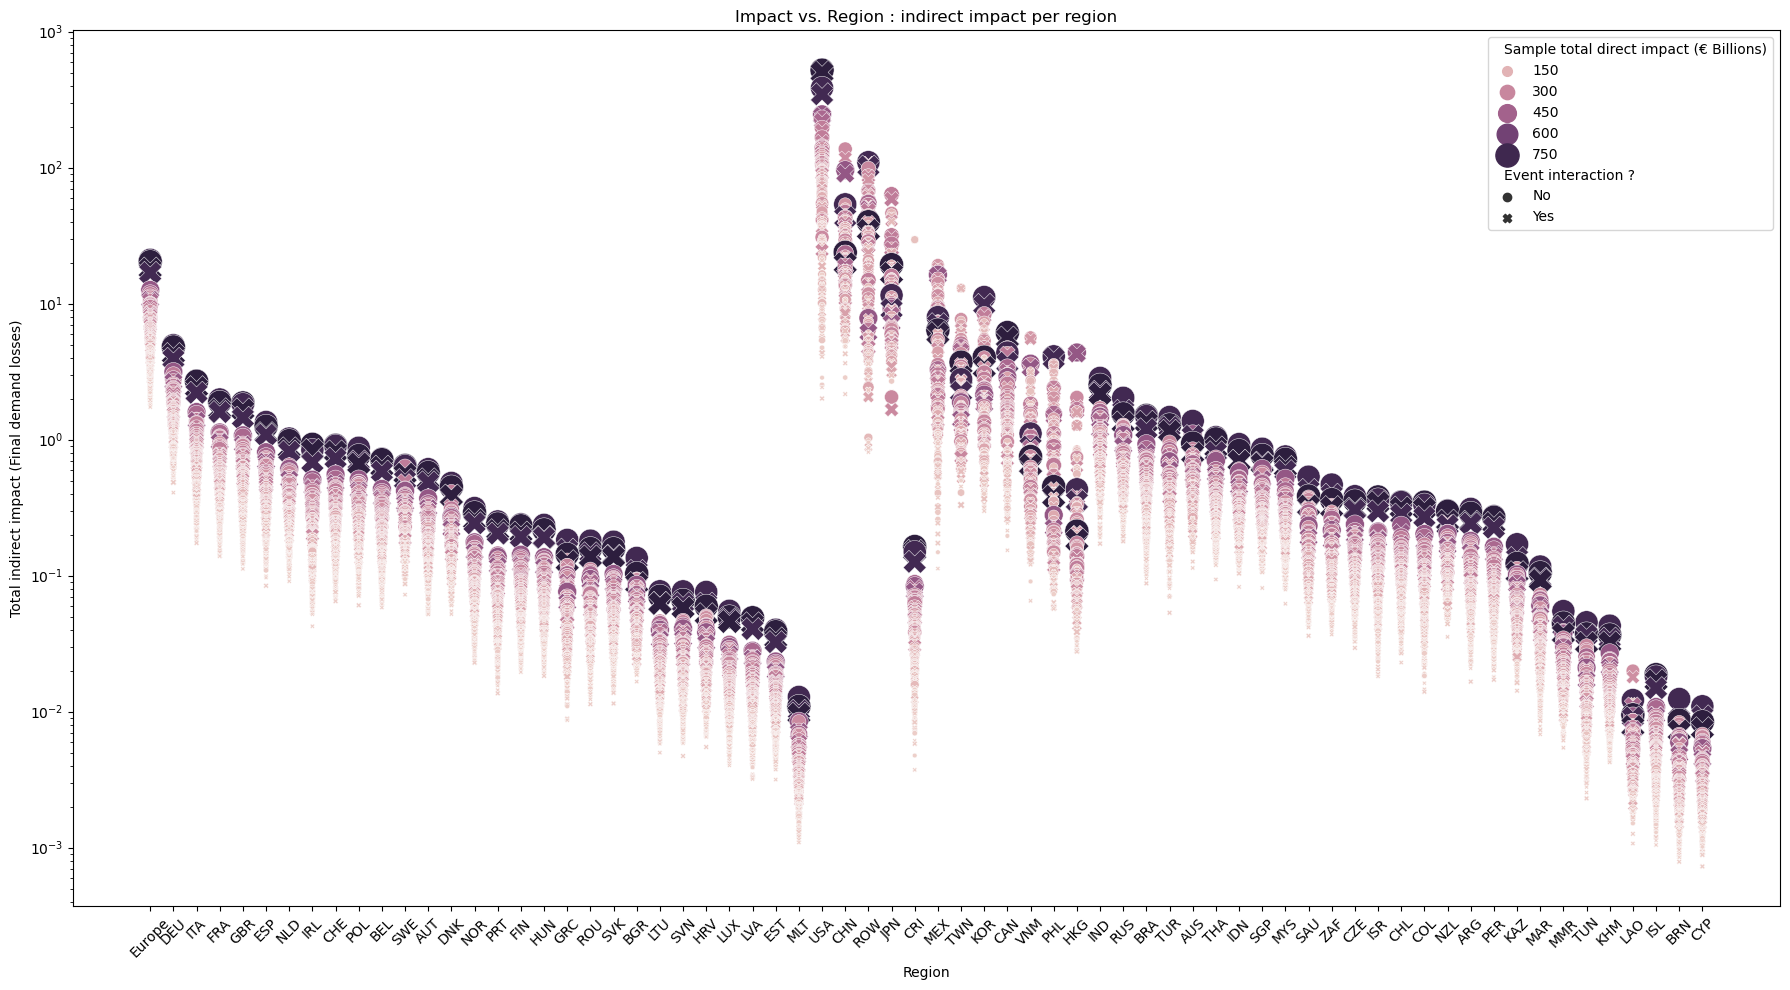

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

variable = "Final demand losses"
inv_type = "9-6"
y_value = "Total indirect impact (€ Billions)"
hue_var = size_var = "Sample total direct impact (€ Billions)"
style_var = "Event interaction ?"

plt.clf()
fig, ax = plt.subplots(figsize=(18, 10))

plot_df = clean_df.loc[(clean_df["Variable"] == variable) & (clean_df["Inv. Scenario"] == inv_type)].copy()
plot_df["Sample total direct impact (€ Billions)"] = plot_df["Sample total direct impact (€ Billions)"].apply(lambda x: max(1, x))  # Avoid log(0)

# Filter plot_df to include only regions from EU_regs
plot_df_europe = plot_df[(plot_df["Region"].isin(EU_regs)) | (plot_df["Region"]=="Europe")].sort_values(y_value, ascending=False)
plot_df = plot_df.loc[(~plot_df.Region.isin(EU_regs)) & (plot_df["Region"]!="Europe")].sort_values(y_value, ascending=False)

sns.scatterplot(data=plot_df_europe, x="Region", y=y_value, size=size_var, hue=hue_var, style=style_var, legend=False, sizes=(10, 300), ax=ax)
sns.scatterplot(data=plot_df, x="Region", y=y_value, size=size_var, hue=hue_var, style=style_var, sizes=(10, 300), ax=ax)

plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel(f"Total indirect impact ({variable})")
plt.title("Impact vs. Region : indirect impact per region")
if variable=="Production change":
    plt.yscale("symlog")
else:
    plt.yscale("log")
#plt.legend(title=f"Sample total direct damage (Billion)", ncols=3)
plt.tight_layout()
plt.show()

#### Losses relative to economy size

<Figure size 640x480 with 0 Axes>

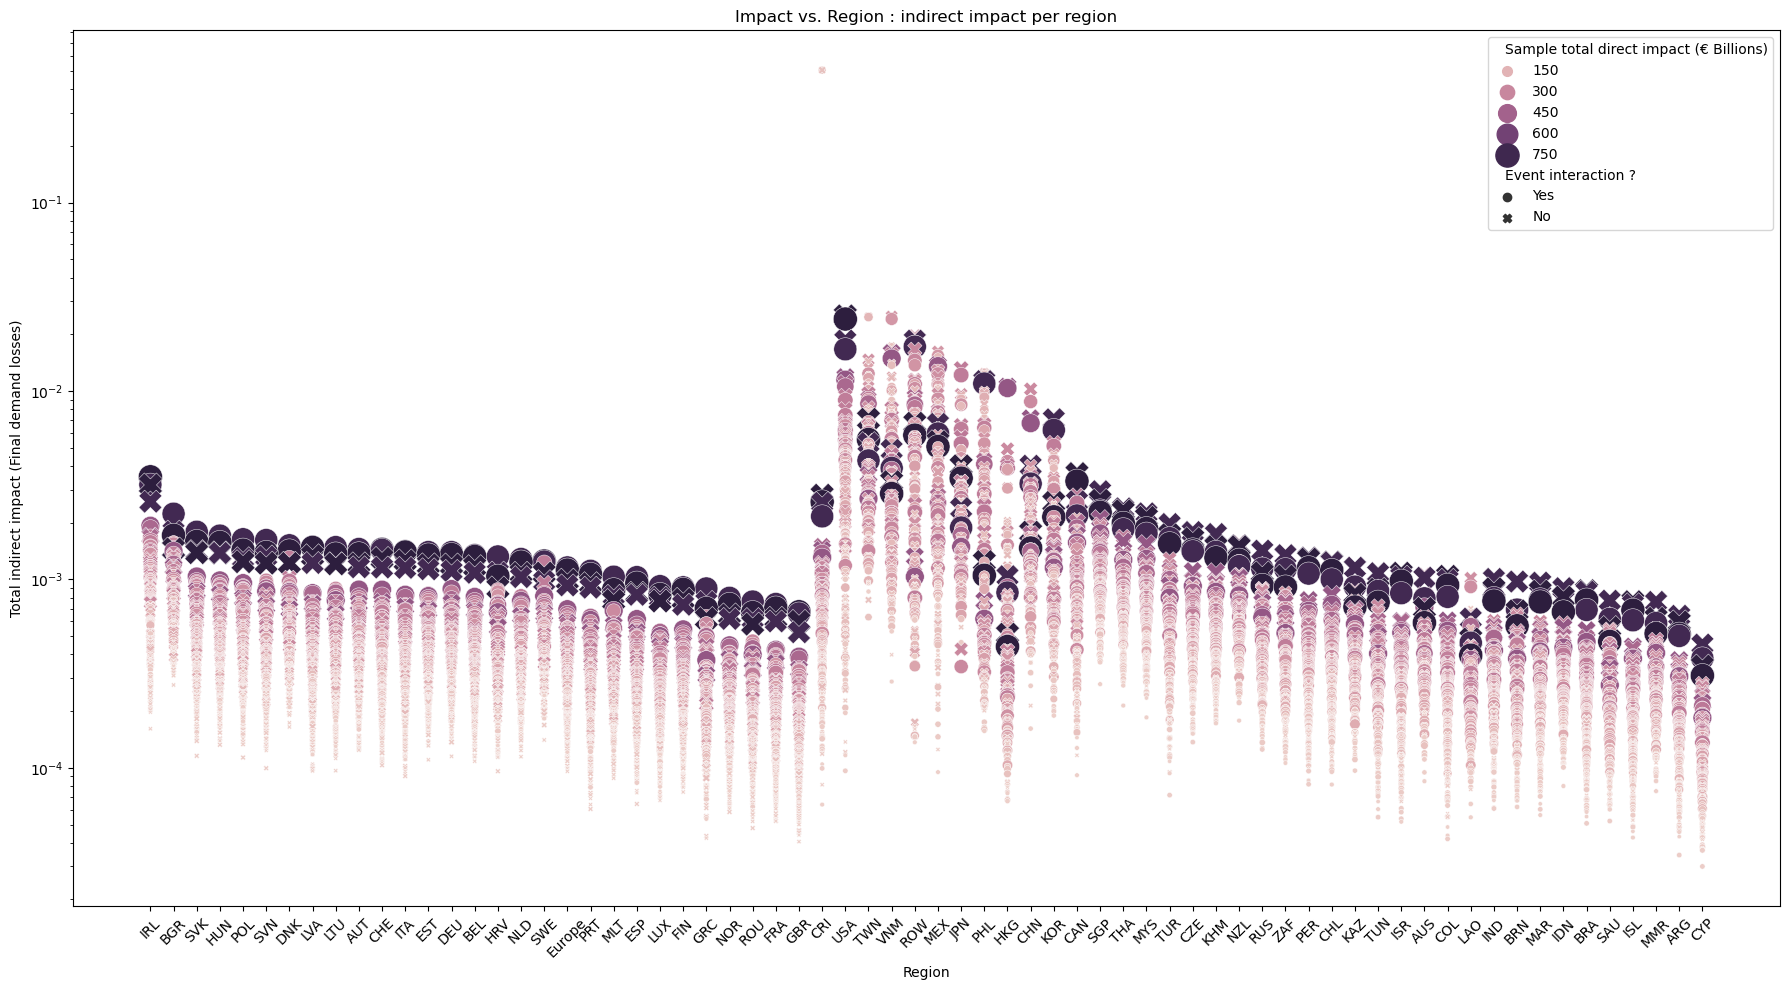

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

variable = "Final demand losses"
inv_type = "9-6"
y_value = "Relative indirect impact"
hue_var = size_var = "Sample total direct impact (€ Billions)"
style_var = "Event interaction ?"

plt.clf()
fig, ax = plt.subplots(figsize=(18, 10))

plot_df = clean_df.loc[(clean_df["Variable"] == variable) & (clean_df["Inv. Scenario"] == inv_type)].copy()
plot_df["Sample total direct impact (€ Billions)"] = plot_df["Sample total direct impact (€ Billions)"].apply(lambda x: max(1, x))  # Avoid log(0)

# Filter plot_df to include only regions from EU_regs
plot_df_europe = plot_df[(plot_df["Region"].isin(EU_regs)) | (plot_df["Region"]=="Europe")].sort_values(y_value, ascending=False)
plot_df = plot_df.loc[(~plot_df.Region.isin(EU_regs)) & (plot_df["Region"]!="Europe")].sort_values(y_value, ascending=False)

sns.scatterplot(data=plot_df_europe, x="Region", y=y_value, size=size_var, hue=hue_var, style=style_var, legend=False, sizes=(10, 300), ax=ax)
sns.scatterplot(data=plot_df, x="Region", y=y_value, size=size_var, hue=hue_var, style=style_var, sizes=(10, 300), ax=ax)

plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel(f"Total indirect impact ({variable})")
plt.title("Impact vs. Region : indirect impact per region")
if variable=="Production change":
    plt.yscale("symlog")
else:
    plt.yscale("log")
#plt.legend(title=f"Sample total direct damage (Billion)", ncols=3)
plt.tight_layout()
plt.show()

### Indirect Impact on production (Comparing 9-6 inventories vs 90-60)

#### Absolute Production change

<Figure size 640x480 with 0 Axes>

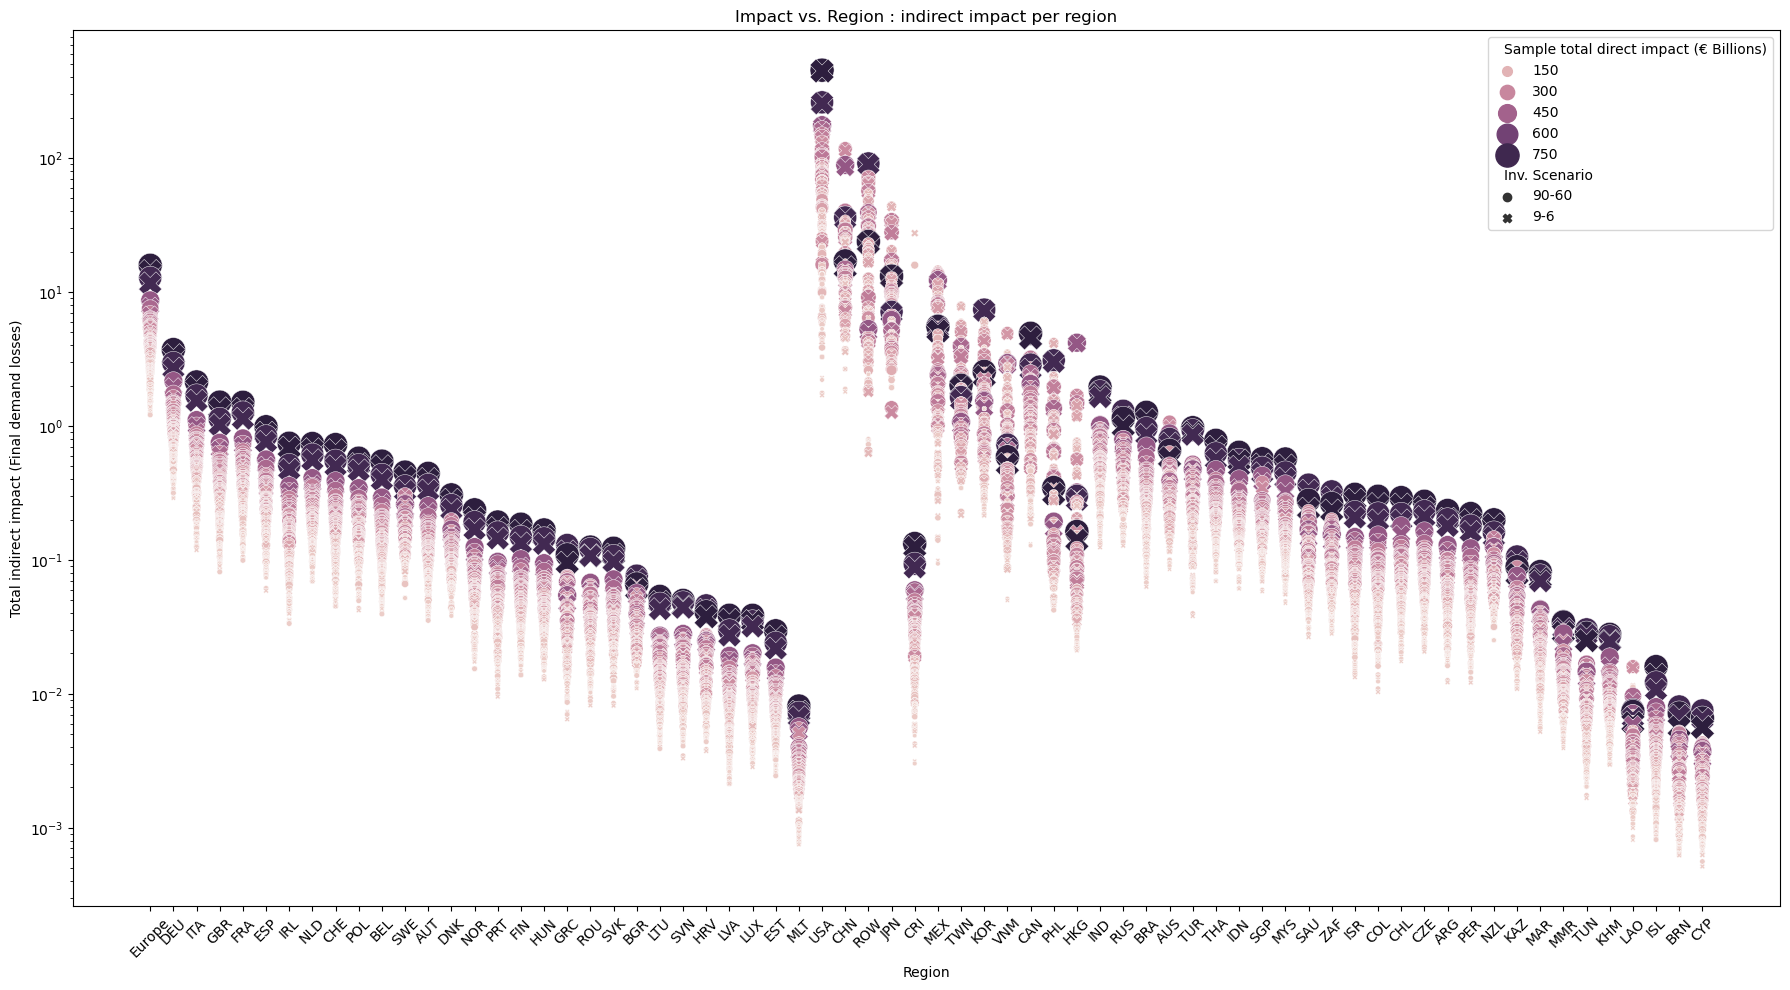

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

variable = "Final demand losses"
evnt_type = "Yes"
y_value = "Total indirect impact (€ Billions)"
hue_var = size_var = "Sample total direct impact (€ Billions)"
style_var = "Inv. Scenario"

plt.clf()
fig, ax = plt.subplots(figsize=(18, 10))

plot_df = clean_df.loc[(clean_df["Variable"] == variable) & (clean_df["Event interaction ?"] == evnt_type)].copy()
plot_df["Sample total direct impact (€ Billions)"] = plot_df["Sample total direct impact (€ Billions)"].apply(lambda x: max(1, x))  # Avoid log(0)

# Filter plot_df to include only regions from EU_regs
plot_df_europe = plot_df[(plot_df["Region"].isin(EU_regs)) | (plot_df["Region"]=="Europe")].sort_values(y_value, ascending=False)
plot_df = plot_df.loc[(~plot_df.Region.isin(EU_regs)) & (plot_df["Region"]!="Europe")].sort_values(y_value, ascending=False)

sns.scatterplot(data=plot_df_europe, x="Region", y=y_value, size=size_var, hue=hue_var, style=style_var, legend=False, sizes=(10, 300), ax=ax)
sns.scatterplot(data=plot_df, x="Region", y=y_value, size=size_var, hue=hue_var, style=style_var, sizes=(10, 300), ax=ax)

plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel(f"Total indirect impact ({variable})")
plt.title("Impact vs. Region : indirect impact per region")
if variable=="Production change":
    plt.yscale("symlog")
else:
    plt.yscale("log")
#plt.legend(title=f"Sample total direct damage (Billion)", ncols=3)
plt.tight_layout()
plt.show()

#### Production change relative to regional yearly production

<Figure size 640x480 with 0 Axes>

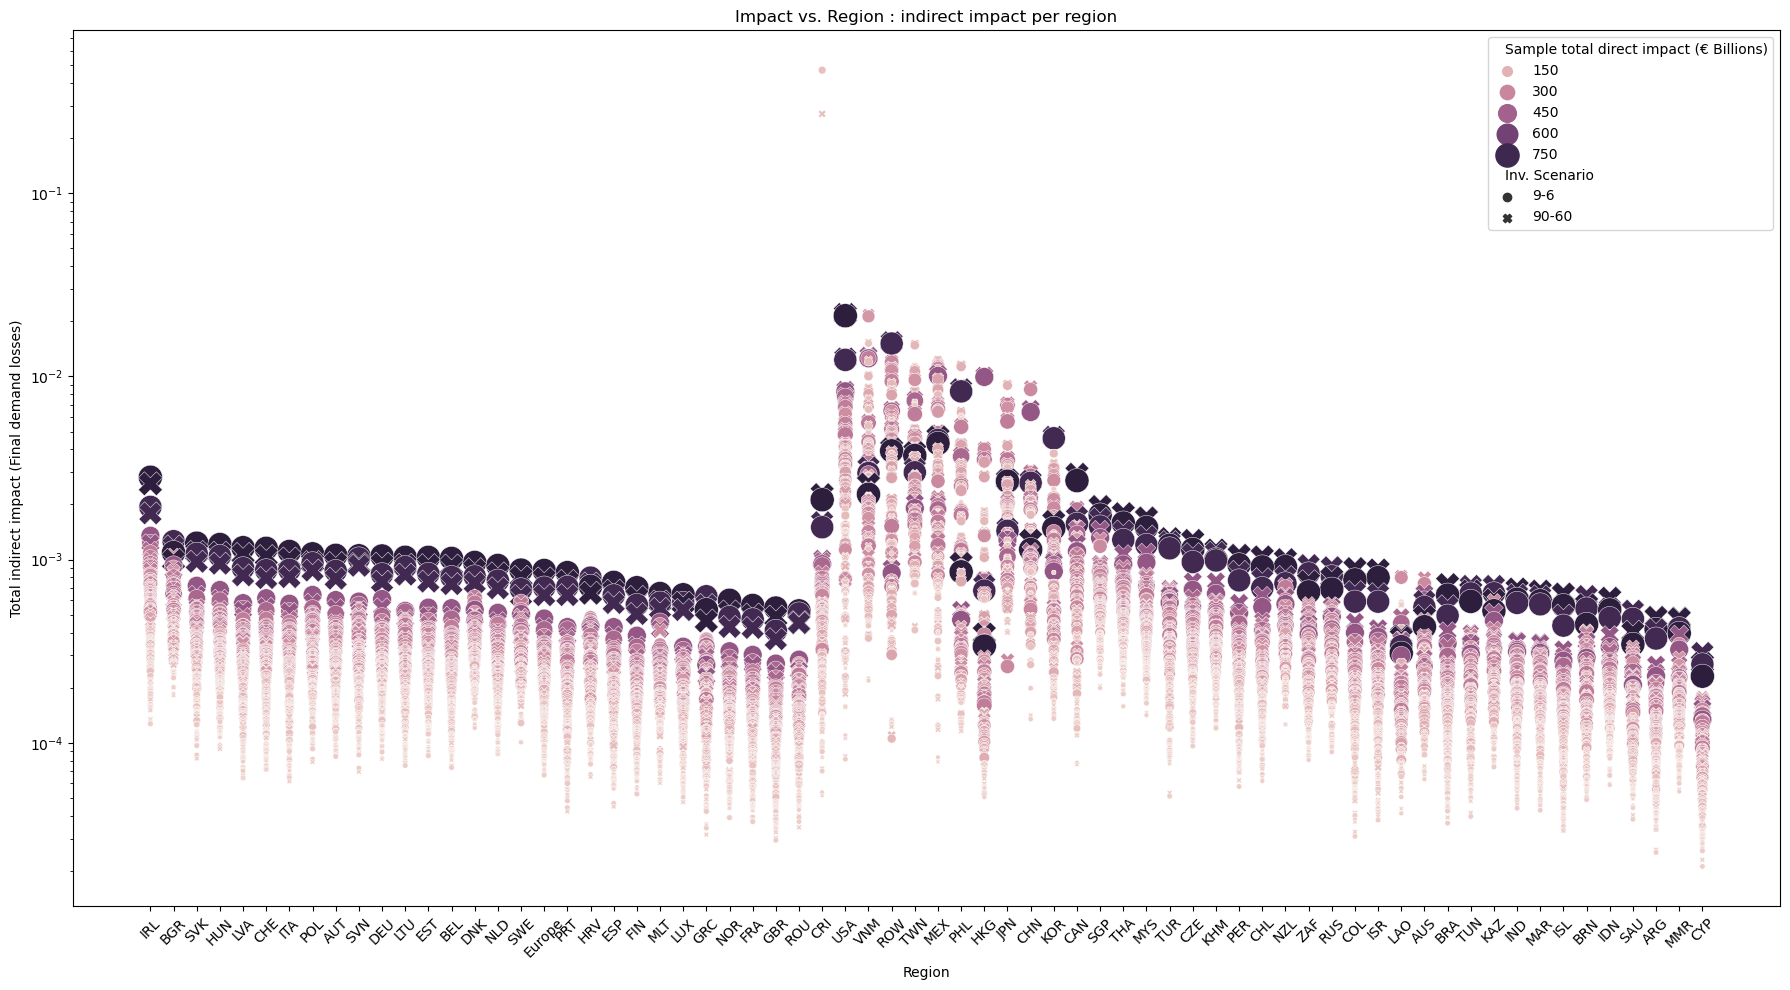

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

variable = "Final demand losses"
evnt_type = "Yes"
y_value = "Relative indirect impact"
hue_var = size_var = "Sample total direct impact (€ Billions)"
style_var = "Inv. Scenario"

plt.clf()
fig, ax = plt.subplots(figsize=(18, 10))

plot_df = clean_df.loc[(clean_df["Variable"] == variable) & (clean_df["Event interaction ?"] == evnt_type)].copy()
plot_df["Sample total direct impact (€ Billions)"] = plot_df["Sample total direct impact (€ Billions)"].apply(lambda x: max(1, x))  # Avoid log(0)

# Filter plot_df to include only regions from EU_regs
plot_df_europe = plot_df[(plot_df["Region"].isin(EU_regs)) | (plot_df["Region"]=="Europe")].sort_values(y_value, ascending=False)
plot_df = plot_df.loc[(~plot_df.Region.isin(EU_regs)) & (plot_df["Region"]!="Europe")].sort_values(y_value, ascending=False)

sns.scatterplot(data=plot_df_europe, x="Region", y=y_value, size=size_var, hue=hue_var, style=style_var, legend=False, sizes=(10, 300), ax=ax)
sns.scatterplot(data=plot_df, x="Region", y=y_value, size=size_var, hue=hue_var, style=style_var, sizes=(10, 300), ax=ax)

plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel(f"Total indirect impact ({variable})")
plt.title("Impact vs. Region : indirect impact per region")
if variable=="Production change":
    plt.yscale("symlog")
else:
    plt.yscale("log")
#plt.legend(title=f"Sample total direct damage (Billion)", ncols=3)
plt.tight_layout()
plt.show()

### Ranking regions

#### Direct impacts

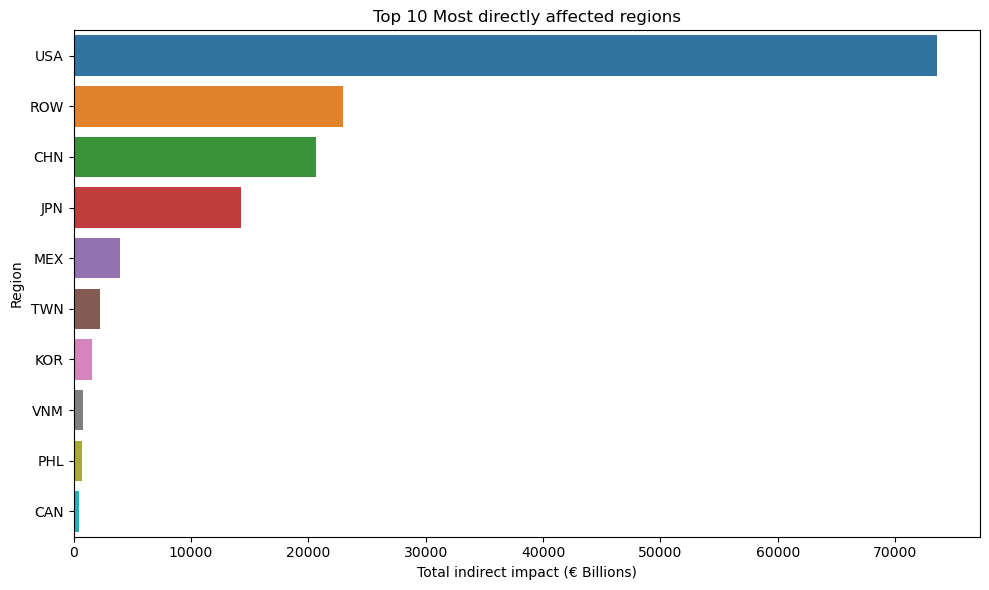

In [62]:
most_affected_regions = clean_df.groupby("Region")["Total direct impact (€ Billions)"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=most_affected_regions.values, y=most_affected_regions.index)
plt.xlabel("Total indirect impact (€ Billions)")
plt.ylabel("Region")
plt.title("Top 10 Most directly affected regions")
plt.tight_layout()
plt.show()

#### Absolute losses

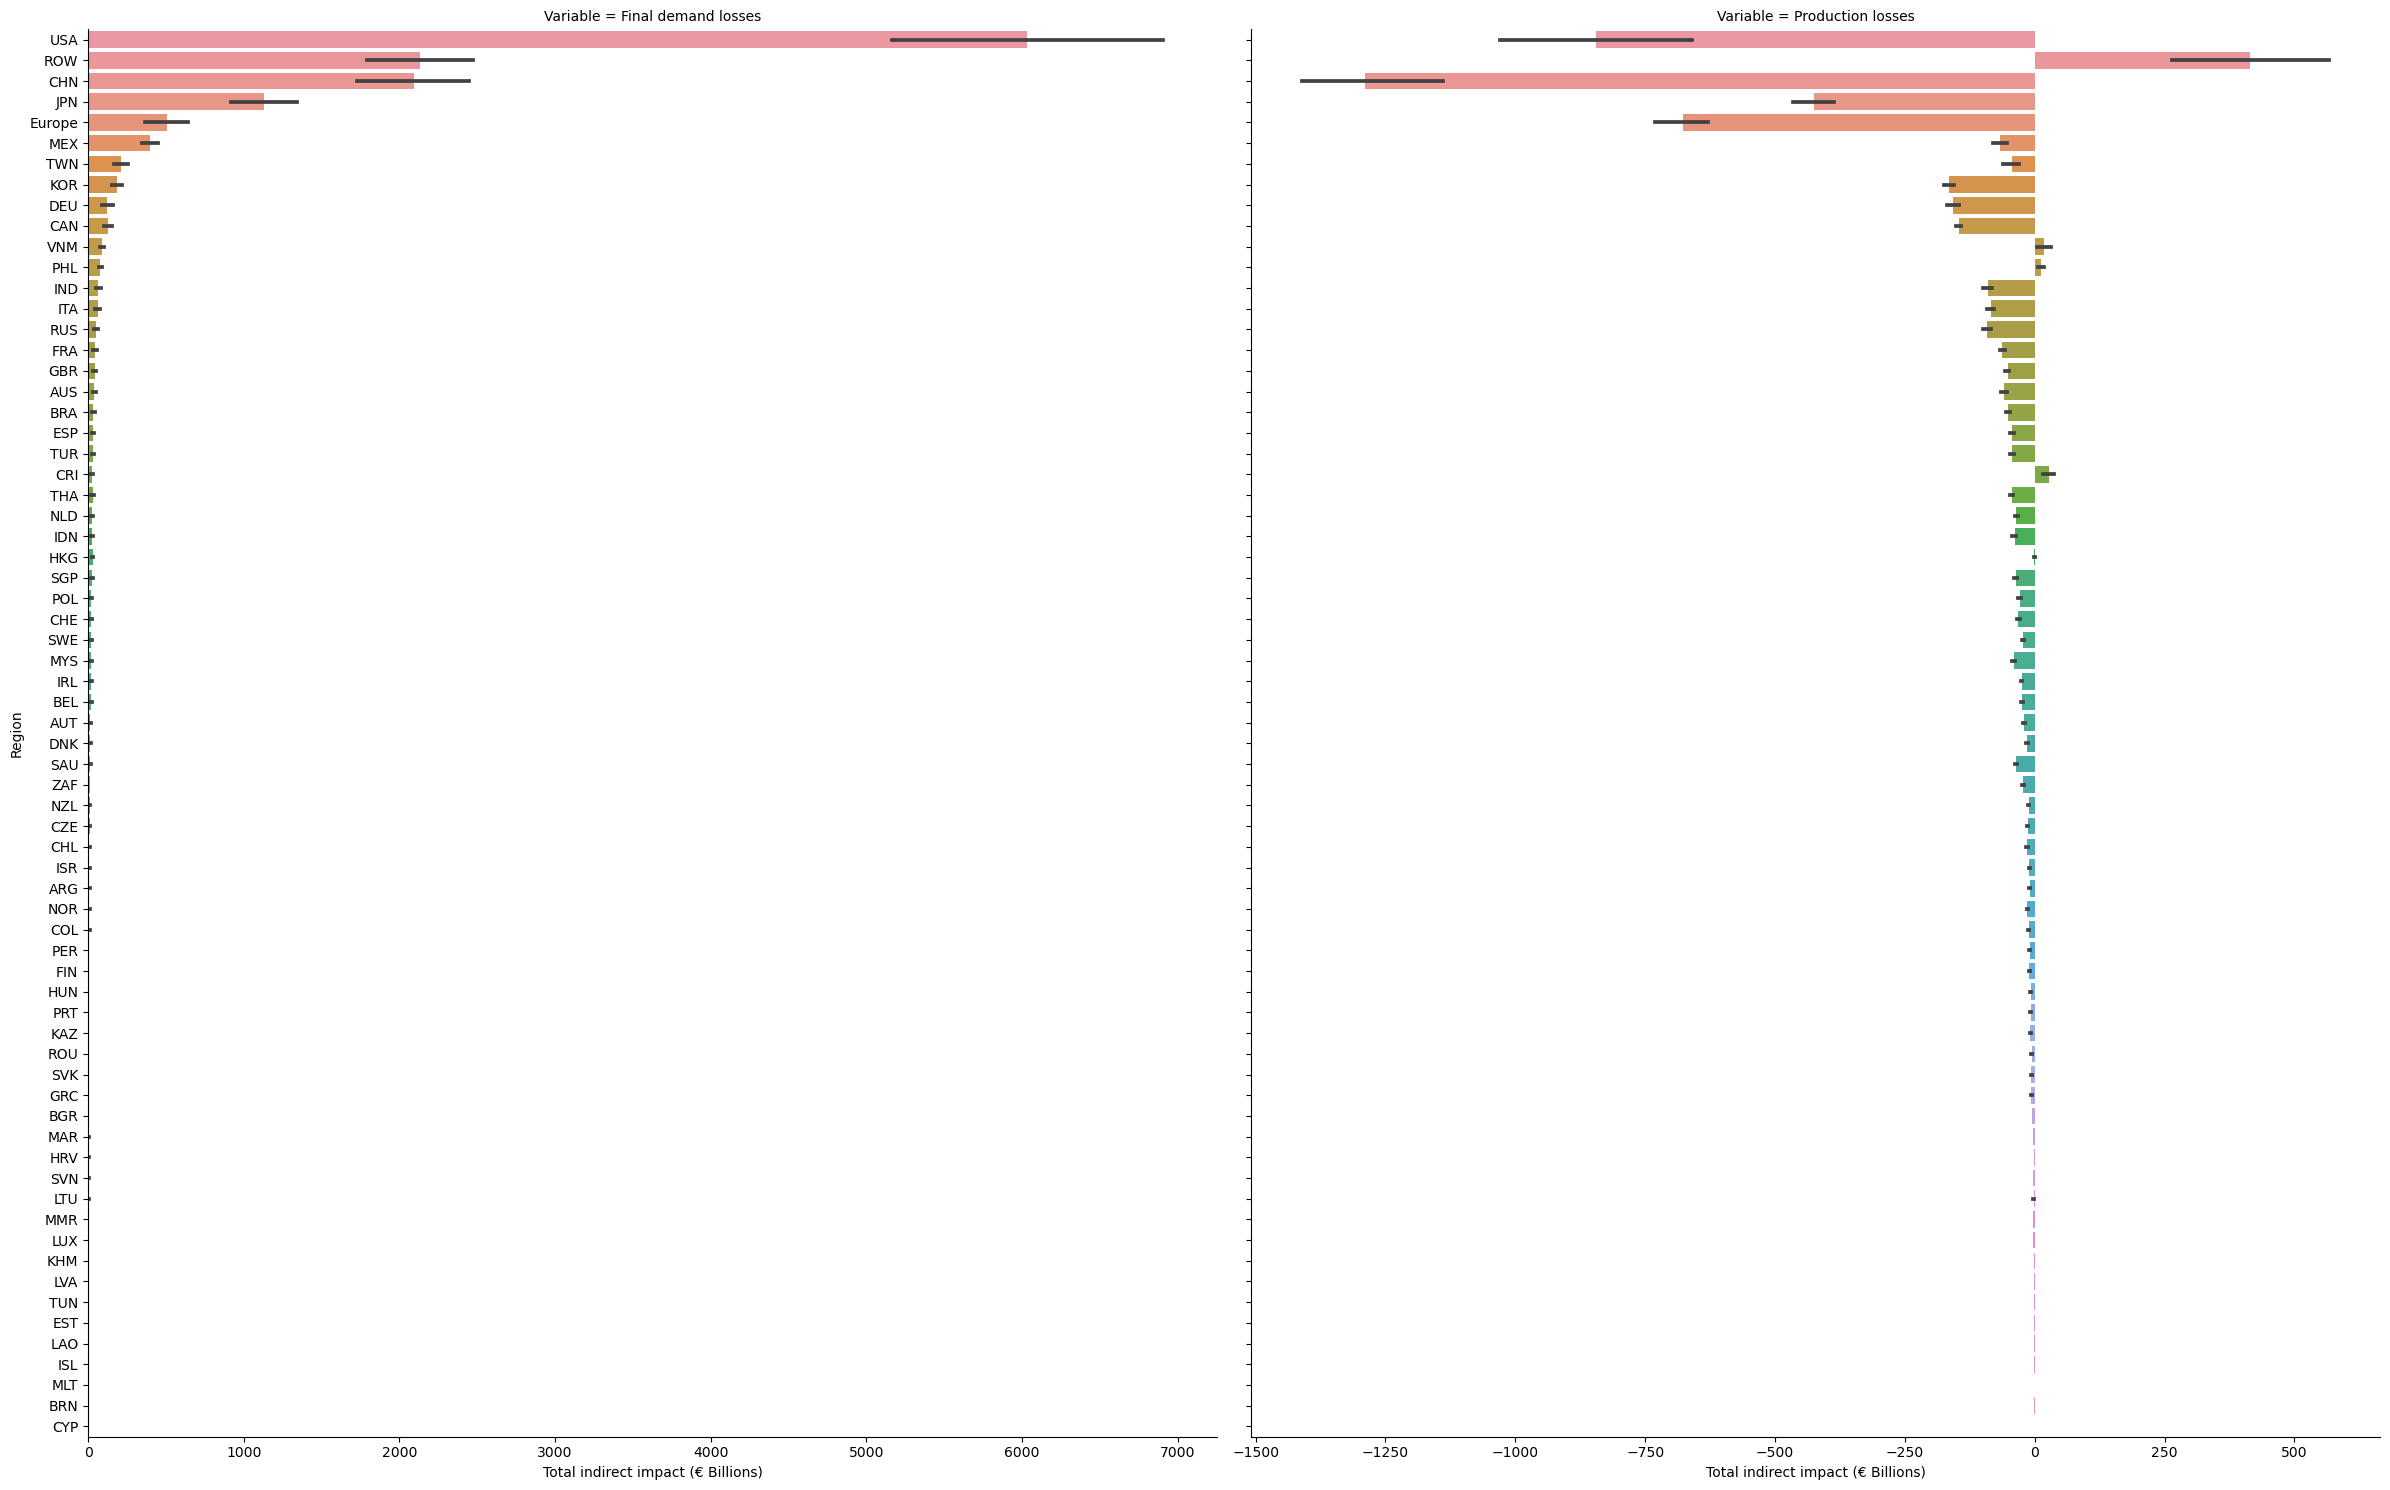

In [63]:
plot_df = clean_df.copy()

most_affected_regions = (plot_df.groupby(["Region",'Variable','Inv. Scenario','Event interaction ?'])["Total indirect impact (€ Billions)"].sum()).sort_values(ascending=False)
most_affected_regions = most_affected_regions.reset_index()
sns.catplot(most_affected_regions, kind="bar", x="Total indirect impact (€ Billions)", y="Region", col="Variable", sharex=False, height=15, aspect=0.8)

#### Relative indirect losses

Losses are expressed as the ratio of indirect losses / yearly production 

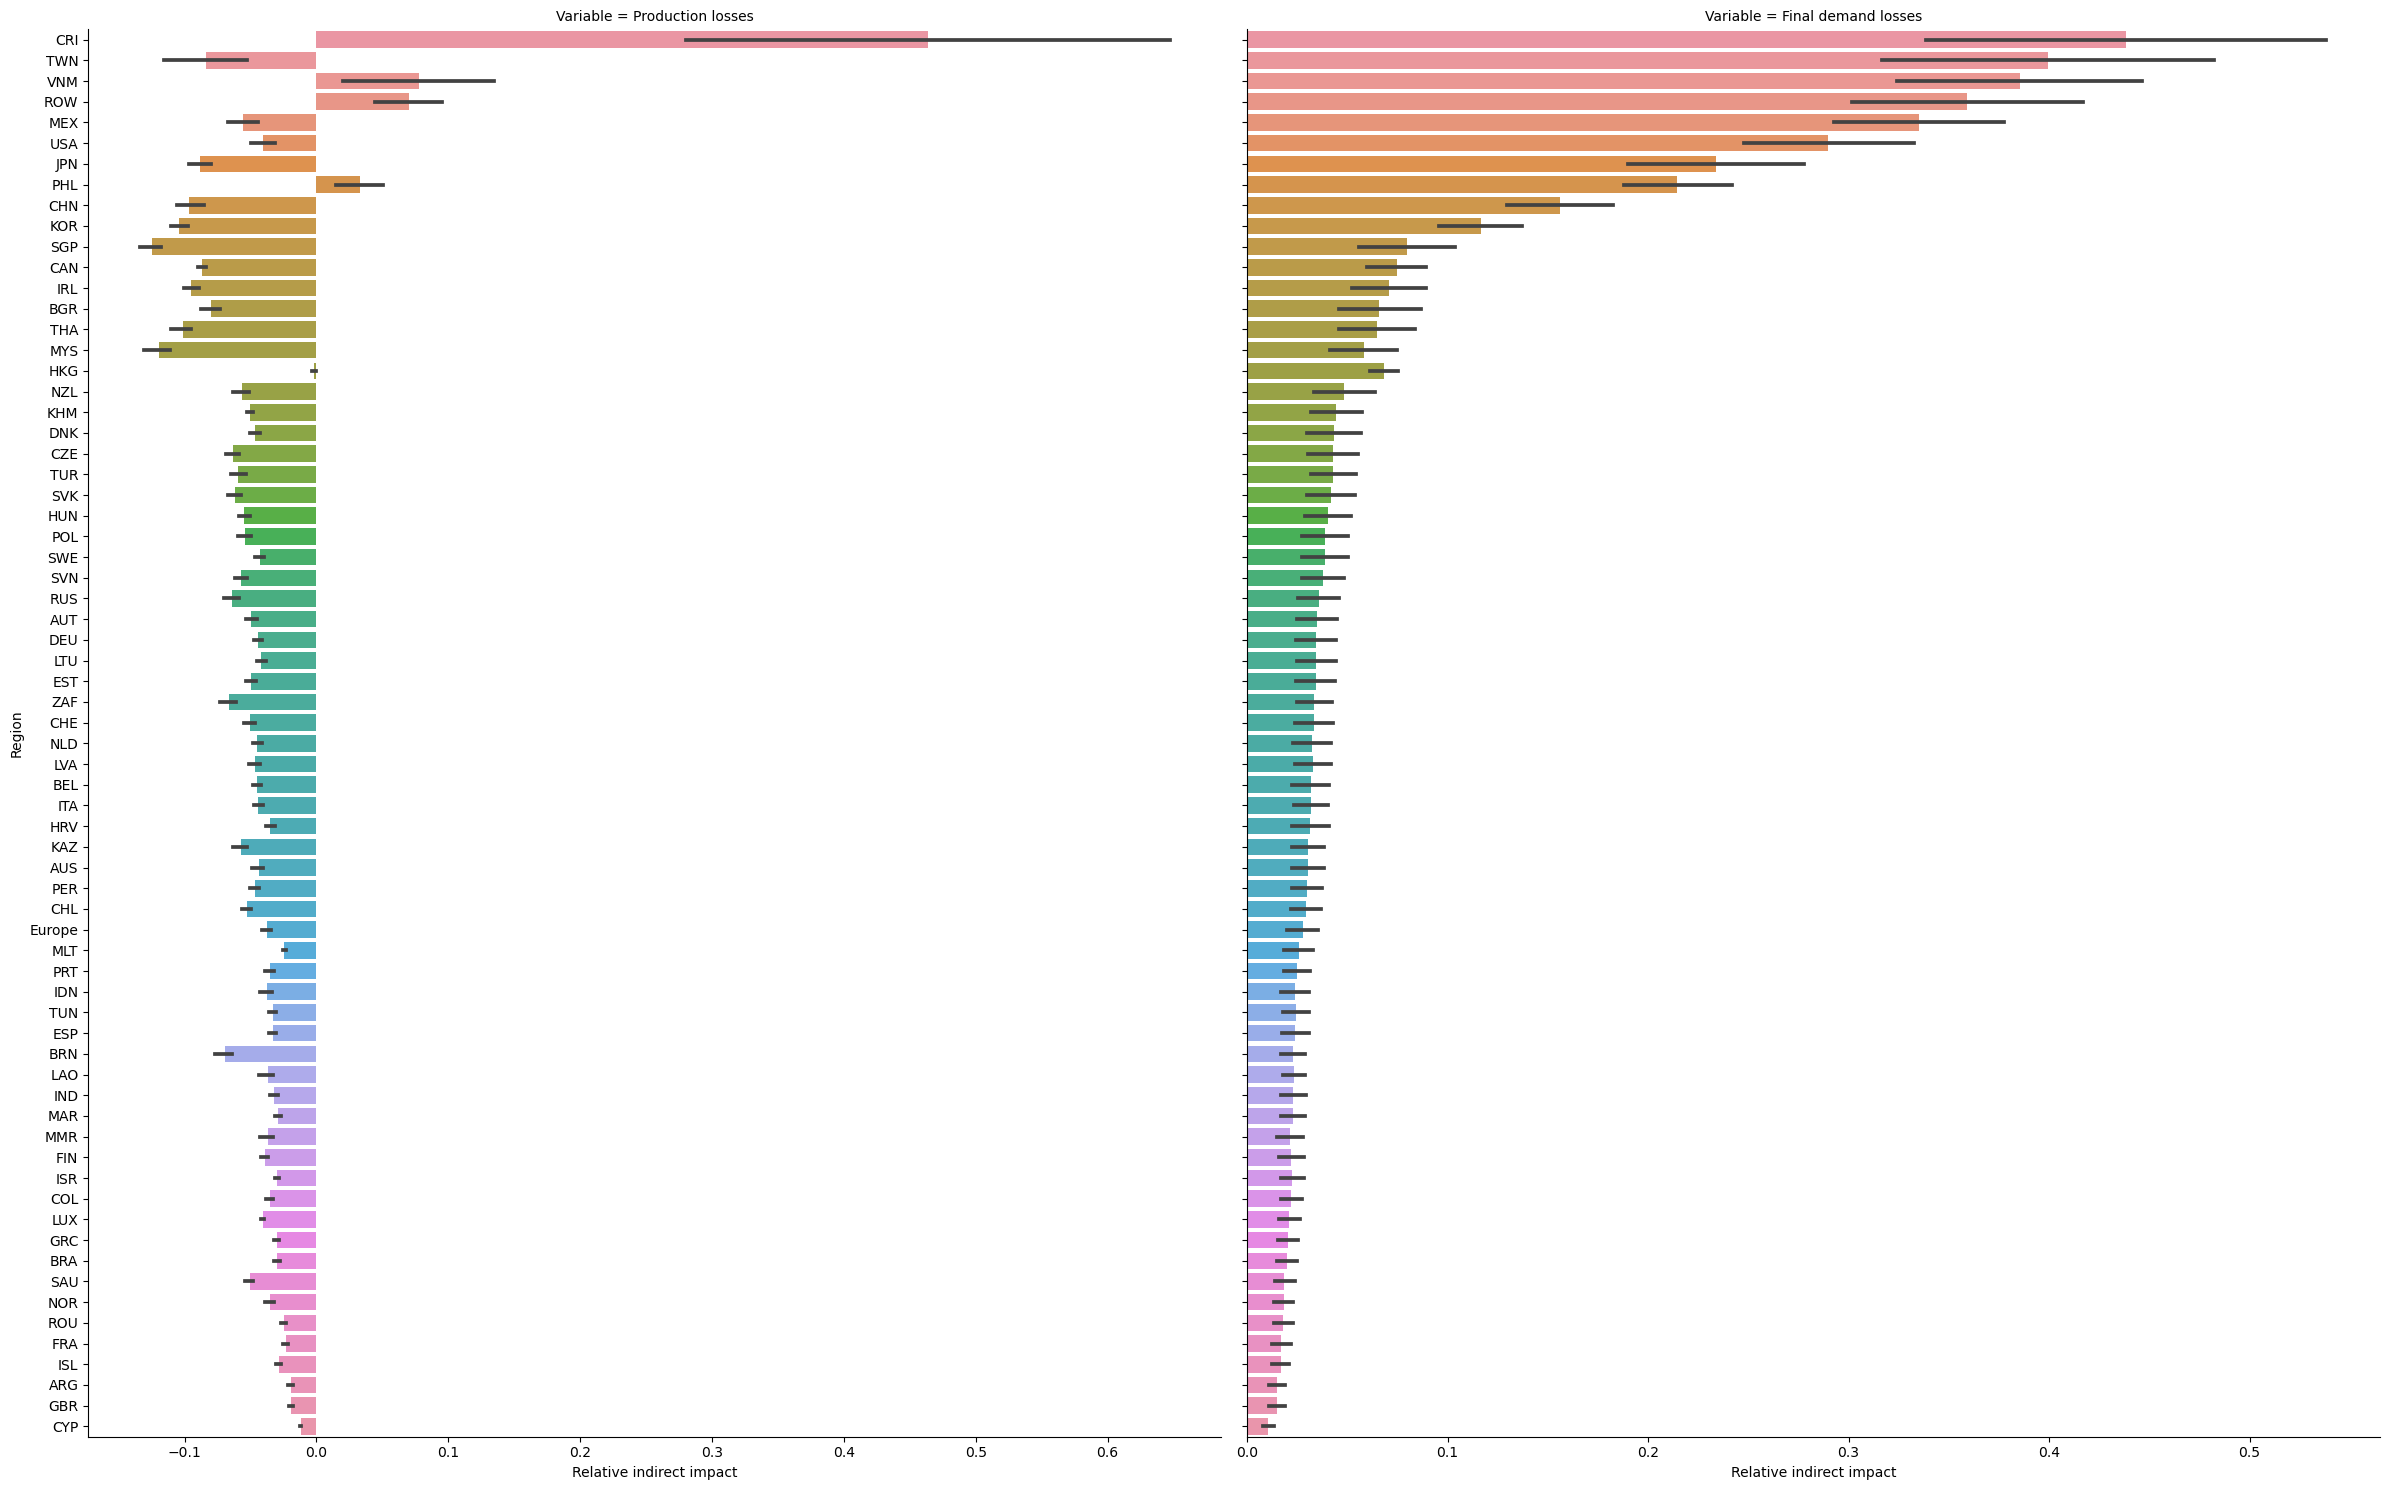

In [64]:
plot_df = clean_df.copy()

most_affected_regions = (plot_df.groupby(["Region",'Variable','Inv. Scenario','Event interaction ?'])["Relative indirect impact"].sum()).sort_values(ascending=False)
most_affected_regions = most_affected_regions.reset_index()
sns.catplot(most_affected_regions, kind="bar", x="Relative indirect impact", y="Region", col="Variable", sharex=False, height=15, aspect=0.8)

### Relative indirect impact vs Total Sample Direct Impact

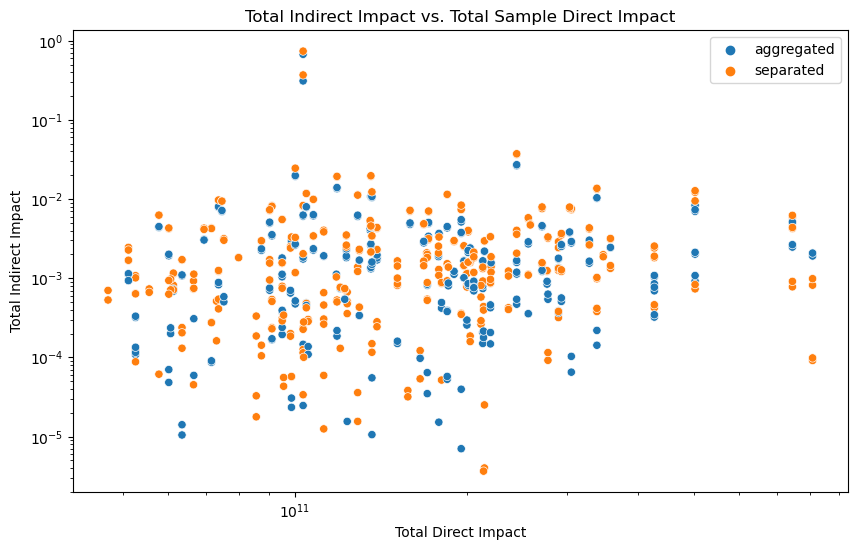

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_df = res_df.loc[(res_df.variable=="production_change")].copy()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x="sample total direct damage", y="relative indirect impact", hue="simtype")
plt.xlabel("Total Direct Impact")
plt.ylabel("Total Indirect Impact")
plt.title("Total Indirect Impact vs. Total Sample Direct Impact")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

### Average indirect impact

Absolute

In [ ]:
plt.figure(figsize=(12, 20))
plot_df=res_df.loc[res_df.variable=="production_change"].sort_values(by="total indirect impact", ascending=False).copy()
hue = plot_df['simtype'].astype(str) + ', ' + plot_df['invtype'].astype(str)
sns.barplot(data=plot_df, y="region", x="total indirect impact", hue=hue)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Region")
plt.xlabel("Average indirect impact")
plt.title("Average indirect impact by region")
plt.tight_layout()
plt.xscale("symlog")  # Set x-axis to log scale
plt.show()

Relative

In [ ]:
plt.figure(figsize=(12, 20))
plot_df=res_df.loc[res_df.variable=="production_change"].sort_values(by="relative indirect impact", ascending=False).copy()
hue = plot_df['simtype'].astype(str) + ', ' + plot_df['invtype'].astype(str)
sns.barplot(data=plot_df, y="region", x="relative indirect impact", hue=hue)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Region")
plt.xlabel("Average relative indirect impact")
plt.title("Average relative indirect impact by region")
plt.tight_layout()
plt.xscale("symlog")  # Set x-axis to log scale
plt.show()

### Indirect damage over direct damage (sample) ratio

In [ ]:
plt.figure(figsize=(12, 20))
plot_df=res_df.loc[res_df.variable=="production_losses"].copy()
hue = plot_df['simtype'].astype(str) + ', ' + plot_df['invtype'].astype(str)
plot_df["indirect damage over total sample damage"] = plot_df["total indirect impact"] / plot_df["sample total direct damage"]
plot_df.sort_values(by="indirect damage over total sample damage", ascending=False, inplace=True)
sns.barplot(data=plot_df, y="region", x="indirect damage over total sample damage", hue=hue)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Region")
plt.xlabel("Average Total Indirect Impact")
plt.title("Average Total Indirect Impact by Region")
plt.tight_layout()
#plt.xscale("symlog")  # Set x-axis to log scale
plt.show()

### Sample damage vs Indirect damage

Reminder: for "production_losses" negative values are gains

In [ ]:
# Set up the grid layout

plot_df=res_df.loc[res_df.variable=="production_losses"].sort_values(by="total indirect impact", ascending=False).copy()
plot_df["hue"] = plot_df['simtype'].astype(str) + ', ' + plot_df['invtype'].astype(str)
g = sns.FacetGrid(plot_df, col="region", hue="hue", col_wrap=3, height=4, aspect=2, sharey=False, legend_out=True)

# Plot scatter plots
g.map_dataframe(sns.scatterplot,
                y="total indirect impact",
                x="sample total direct damage")

# Add legend
g.add_legend(loc="upper right")

# Adjust layout
g.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Set up the grid layout
plt.figure(figsize=(16, 8))

plot_df=res_df.loc[(res_df.variable=="production_losses") & (res_df.region=="Europe")].sort_values(by="total indirect impact", ascending=False).copy()
# Set up the grid layout
plot_df["hue"] = plot_df['simtype'].astype(str) + ', ' + plot_df['invtype'].astype(str)
g = sns.FacetGrid(plot_df, col="hue", hue="hue", col_wrap=2, height=4, aspect=2, sharey=False, legend_out=True)

# Plot scatter plots
g.map_dataframe(sns.scatterplot,
                y="total indirect impact",
                x="sample total direct damage")

# Add legend
g.add_legend(loc="upper right")

# Adjust layout
g.tight_layout()

# Show the plot
plt.show()

In [ ]:
res_df#.sample(20)

# Exploration sample et événements

## Loading data [code to run]

In [2]:
import pickle as pkl
import pandas as pd

sample_number = 0

# Common to all:
with open(f"../results_for_zelie/OECD21-2018.pkl",'rb') as f:
    mriot = pkl.load(f)

# Sample specific
df_impact = pd.read_parquet(f"../results_for_zelie/sample_{sample_number}/OECD21-2018_df_impact.parquet")
df_impact = df_impact.reset_index(names=["step"])
df_impact["step"] = df_impact["step"].astype(int)
df_impact = df_impact.set_index("step", append=True)

meta_df_impact = pd.read_parquet(f"../results_for_zelie/sample_{sample_number}/OECD21-2018_meta_df_impact.parquet")
meta_df_impact = meta_df_impact.reset_index(names=["step"])
meta_df_impact["step"] = meta_df_impact["step"].astype(int)

# Simulation specific
inv_sce = "9-6"

production_df = pd.read_parquet(f"../results_for_zelie/sample_{sample_number}/OECD21-2018_{inv_sce}_event_aggregated/production_realised.parquet")
final_demand_df = pd.read_parquet(f"../results_for_zelie/sample_{sample_number}/OECD21-2018_{inv_sce}_event_aggregated/final_demand_unmet.parquet")

## df_impact [description / example of use]

- Impact direct par événement du sample
- Region,secteur en colonne
- Index = "id" et "step" de l'événement

In [96]:
df_impact_countries = df_impact.T.groupby("region").sum().T
df_impact_countries.drop(labels=df_impact_countries.columns[(df_impact_countries == 0).all()], axis=1)

region            CAN           CHN           COL           CRI           HKG  \
   step                                                                         
0  0     0.000000e+00  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   
1  5     0.000000e+00  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   
2  15    0.000000e+00  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   
3  16    0.000000e+00  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   
4  40    1.450216e+09  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   
5  49    0.000000e+00  2.730078e+07      0.000000  0.000000e+00  0.000000e+00   
6  53    0.000000e+00  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   
7  70    2.697144e+09  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   
8  319   0.000000e+00  5.367140e+08      0.000000  0.000000e+00  0.000000e+00   
9  327   0.000000e+00  2.436884e+09      0.000000  0.000000e+00  0.000000e+00   
10 355   0.000000e+00  5.080314e+08      0.000000  0.000000e+00  6.877835e+07   
11 366   0.000000e+00  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   
12 389   0.000000e+00  1.029729e+05      0.000000  0.000000e+00  0.000000e+00   
13 393   0.000000e+00  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   
14 728   0.000000e+00  1.088499e+09      0.000000  0.000000e+00  0.000000e+00   
15 737   0.000000e+00  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   
16 759   0.000000e+00  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   
17 767   0.000000e+00  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   
18 788   0.000000e+00  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   
19 1118  0.000000e+00  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   
20 1119  0.000000e+00  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   
21 1142  0.000000e+00  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   
22 1152  0.000000e+00  0.000000e+00  30241.239639  1.164436e+10  0.000000e+00   
23 1175  0.000000e+00  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   
24 1438  0.000000e+00  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   
25 1446  1.628179e+06  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   
26 1483  0.000000e+00  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   
27 1551  0.000000e+00  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   
28 1553  0.000000e+00  0.000000e+00      0.000000  0.000000e+00  0.000000e+00   

region            JPN           KOR           MEX            MMR  \
   step                                                            
0  0     7.275461e+08  1.307398e+09  0.000000e+00       0.000000   
1  5     1.191931e+07  2.440796e+08  0.000000e+00       0.000000   
2  15    0.000000e+00  0.000000e+00  2.708706e+09       0.000000   
3  16    7.912793e+08  0.000000e+00  0.000000e+00       0.000000   
4  40    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
5  49    5.100107e+06  3.995996e+08  0.000000e+00       0.000000   
6  53    0.000000e+00  0.000000e+00  2.301444e+09       0.000000   
7  70    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
8  319   0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
9  327   0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
10 355   0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
11 366   6.965982e+08  0.000000e+00  0.000000e+00       0.000000   
12 389   1.329663e+07  0.000000e+00  0.000000e+00       0.000000   
13 393   0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
14 728   0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
15 737   1.827141e+09  0.000000e+00  0.000000e+00       0.000000   
16 759   1.558149e+09  0.000000e+00  0.000000e+00       0.000000   
17 767   0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
18 788   0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
19 1118  4.422701e+09  0.000000e+00  0.000000e+00       0.00

## meta_df_impact [description / example of use]

More aggregated info on each event of the sample
- total damage of the event
- affected regions by the event
- mean shock intensity : mean(impact/region_assets) over all affected region
- mean shock intensity pct : same but * 100 (ie %)
- recovery duration : computed as a function of mean_shock_intensity:

```python
def sigmoid_mapping(value, slope=2, midpoint=-3.5,
                    start_in_intrvl=0, end_in_intrvl=0.005,
                    start_out_intrvl=-5, end_out_intrvl=5, max_duration=1000):
    """Map interval to sigmoid scaled interval"""
    # Map the input value from [start_in, end_in] to [start_out, end_out]
    normalized_value = (value) / (end_in_intrvl - start_in_intrvl) * (end_out_intrvl - start_out_intrvl) - end_out_intrvl

    # Apply sigmoid function with adjustable slope and midpoint
    shifted_value = normalized_value - midpoint
    sigmoid_result = 1 / (1 + math.exp(-slope * shifted_value))

    # Scale the result to [0, max_duration]
    scaled_result = sigmoid_result * max_duration

    return scaled_result
```

In [2]:
meta_df_impact

step  total_damage                        affected  mean_shock_intensity  \
0      0  2.835784e+09                           [JPN]              0.000150   
1      8  4.344727e+08                 [CHN, PHL, ROW]              0.000014   
2     57  1.208093e+09                      [CHN, PHL]              0.000778   
3     91  1.497661e+09                           [ROW]              0.000119   
4     92  1.053790e+09                           [ROW]              0.000084   
5    108  4.998543e+09  [CHN, JPN, KOR, LAO, PHL, VNM]              0.001064   
6    113  2.646800e+09                           [USA]              0.000040   
7    119  4.068756e+10                           [JPN]              0.002152   
8    343  4.661028e+08                           [CHN]              0.000011   
9    415  4.800293e+09                 [CHN, JPN, TWN]              0.000101   
10   438  2.764606e+10                      [ROW, USA]              0.000279   
11   440  3.204985e+08                           [JPN]              0.000017   
12   468  3.641311e+09                 [CHN, JPN, TWN]              0.000817   
13   477  5.228580e+08                      [JPN, ROW]              0.000015   
14   722  1.873074e+09                 [CHN, PHL, VNM]              0.000018   
15   776  3.601051e+09                      [CHN, JPN]              0.000043   
16   791  2.919608e+10                      [MEX, ROW]              0.001288   
17   792  1.798850e+09                      [CHN, TWN]              0.000227   
18   815  1.948461e+11                           [USA]              0.002980   
19  1137  4.280868e+08                      [CHN, JPN]              0.000011   
20  1147  5.203901e+08                      [CHN, TWN]              0.000169   
21  1164  5.002173e+09                      [ROW, USA]              0.000038   
22  1189  2.965444e+09                 [CHN, TWN, USA]              0.000320   
23  1194  1.657194e+09                 [CHN, PHL, VNM]              0.000016   
24  1200  5.871177e+08                           [JPN]              0.000031   
25  1238  5.017542e+08                      [KHM, VNM]              0.000471   
26  1508  2.328388e+09                      [JPN, KOR]              0.000194   
27  1515  2.492322e+08                      [CHN, JPN]              0.000003   

    mean_shock_intensity_pct  recovery_duration  
0                   0.015000                 83  
1                   0.001414                 50  
2                   0.077760                528  
3                   0.011909                 74  
4                   0.008379                 65  
5                   0.106443                779  
6                   0.004048                 55  
7                   0.215215                996  
8                   0.001118                 49  
9                   0.010062                 69  
10                  0.027908                132  
11                  0.001695                 51  
12                  0.081658                566  
13                  0.001468                 50  
14                  0.001842                 51  
15                  0.004323                 56  
16                  0.128783                896  
17                  0.022673                110  
18                  0.298000               1000  
19                  0.001120                 49  
20                  0.016876                 89  
21                  0.003825                 55  
22                  0.032023                152  
23                  0.001597                 50  
24                  0.003106                 53  
25                  0.047141                247  
26                  0.019389                 98  
27                  0.000299                 48

## production_df [description / example of use]

For the specific simulation (MRIOT ; Inv. Scenario ; Event interaction (aggregated vs separated)): The production realised of each industry (Region,Sector) at each step

Can be normalized by "daily production" using:

```python
production_df_norm = production_df / production_df.loc[0]
```

In [156]:
production_df

region         ARG                                                  \
sector Agriculture Construction      Energy Manufacture     Mining   
step                                                                 
0       158.951711   108.809196  136.279525  603.857199  20.811996   
1       158.951711   108.809196  136.279525  603.857199  20.811996   
2       158.951700   108.809196  136.279524  603.857199  20.811995   
3       158.951692   108.809196  136.279516  603.857184  20.811991   
4       158.951698   108.809195  136.279510  603.857199  20.811989   
...            ...          ...         ...         ...        ...   
3318    158.951719   108.809196  136.279529  603.857220  20.811997   
3319    158.951719   108.809196  136.279529  603.857220  20.811997   
3320    158.951719   108.809196  136.279529  603.857220  20.811997   
3321    158.951719   108.809196  136.279529  603.857220  20.811997   
3322    158.951719   108.809196  136.279529  603.857220  20.811997   

region                                                             ...  \
sector       Other       Sales    Services   Transport  Utilities  ...   
step                                                               ...   
0       352.653033  261.131073  508.680148  128.988477  16.284921  ...   
1       352.653033  261.131073  508.680148  128.988477  16.284921  ...   
2       352.653033  261.131069  508.680137  128.988476  16.284921  ...   
3       352.653033  261.131061  508.680130  128.988473  16.284921  ...   
4       352.653033  261.131073  508.680148  128.988470  16.284921  ...   
...            ...         ...         ...         ...        ...  ...   
3318    352.653033  261.131080  508.680153  128.988481  16.284921  ...   
3319    352.653033  261.131080  508.680153  128.988481  16.284921  ...   
3320    352.653033  261.131080  508.680153  128.988481  16.284921  ...   
3321    352.653033  261.131080  508.680153  128.988481  16.284921  ...   
3322    352.653033  261.131080  508.680153  128.988481  16.284921  ...   

region         ZAF                                                  \
sector Agriculture Construction     Energy Manufacture      Mining   
step                                                                 
0        72.375978    77.396490  81.993531  455.946134  105.027795   
1        72.375978    77.396490  81.993531  455.946134  105.027795   
2        72.375972    77.396487  81.993441  455.945994  105.027632   
3        72.375960    77.396484  81.993398  455.945868  105.027518   
4        72.375958    77.396491  81.993372  455.946134  105.027461   
...            ...          ...        ...         ...         ...   
3318     72.375980    77.396490  81.993535  455.946151  105.027807   
3319     72.375980    77.396490  81.993535  455.946151  105.027807   
3320     72.375980    77.396490  81.993535  455.946151  105.027807   
3321     72.375980    77.396490  81.993535  455.946151  105.027807   
3322     72.375980    77.396490  81.993535  455.946151  105.027807   

region                                                             
sector       Other       Sales    Services   Transport  Utilities  
step                                                               
0       290.365961  167.981797  558.123853  109.435530  24.370579  
1       290.365961  167.981797  558.123853  109.435530  24.370579  
2       290.365960  167.981768  558.123836  109.435507  24.370579  
3       290.365954  167.981732  558.123793  109.435469  24.370576  
4       290.365948  167.981797  558.123792  109.435442  24.370573  
...            ...         ...         ...         ...        ...  
3318    290.365962  167.981801  558.123859  109.435534  24.370579  
3319    290.365962  167.981801  558.123859  109.435534  24.370579  
3320    290.365962  167.981801  558.123859  109.435534  24.370579  
3321    290.365962  167.981801  558.123859  109.435534  24.370579  
3322    290.365962  167.981801  558.123859  109.435534  24.370579  

[3323 rows x 670 columns]

## final_demand_df [description / example of use]

For the specific simulation (MRIOT ; Inv. Scenario ; Event interaction (aggregated vs separated)): The amount of final consumption that was not answered for each product (also Region,Sector) at each step.

In [157]:
final_demand_df

region         ARG                                                         \
sector Agriculture Construction Energy Manufacture Mining Other     Sales   
step                                                                        
0              0.0          0.0    0.0    0.000000    0.0   0.0  0.000000   
1              0.0          0.0    0.0    0.000000    0.0   0.0  0.000000   
2              0.0          0.0    0.0    0.000003    0.0   0.0  0.000000   
3              0.0          0.0    0.0    0.000000    0.0   0.0  0.000000   
4              0.0          0.0    0.0    0.000105    0.0   0.0  0.000037   
...            ...          ...    ...         ...    ...   ...       ...   
3318           0.0          0.0    0.0    0.000000    0.0   0.0  0.000000   
3319           0.0          0.0    0.0    0.000000    0.0   0.0  0.000000   
3320           0.0          0.0    0.0    0.000000    0.0   0.0  0.000000   
3321           0.0          0.0    0.0    0.000000    0.0   0.0  0.000000   
3322           0.0          0.0    0.0    0.000000    0.0   0.0  0.000000   

region                                ...         ZAF                      \
sector  Services Transport Utilities  ... Agriculture Construction Energy   
step                                  ...                                   
0       0.000000       0.0       0.0  ...         0.0     0.000000    0.0   
1       0.000000       0.0       0.0  ...         0.0     0.000000    0.0   
2       0.000000       0.0       0.0  ...         0.0     0.000000    0.0   
3       0.000000       0.0       0.0  ...         0.0     0.000000    0.0   
4       0.000005       0.0       0.0  ...         0.0     0.001585    0.0   
...          ...       ...       ...  ...         ...          ...    ...   
3318    0.000000       0.0       0.0  ...         0.0     0.000000    0.0   
3319    0.000000       0.0       0.0  ...         0.0     0.000000    0.0   
3320    0.000000       0.0       0.0  ...         0.0     0.000000    0.0   
3321    0.000000       0.0       0.0  ...         0.0     0.000000    0.0   
3322    0.000000       0.0       0.0  ...         0.0     0.000000    0.0   

region                                                                  
sector Manufacture Mining Other     Sales Services Transport Utilities  
step                                                                    
0         0.000000    0.0   0.0  0.000000      0.0       0.0       0.0  
1         0.000000    0.0   0.0  0.000000      0.0       0.0       0.0  
2         0.000000    0.0   0.0  0.000000      0.0       0.0       0.0  
3         0.000000    0.0   0.0  0.000000      0.0       0.0       0.0  
4         0.000324    0.0   0.0  0.000102      0.0       0.0       0.0  
...            ...    ...   ...       ...      ...       ...       ...  
3318      0.000000    0.0   0.0  0.000000      0.0       0.0       0.0  
3319      0.000000    0.0   0.0  0.000000      0.0       0.0       0.0  
3320      0.000000    0.0   0.0  0.000000      0.0       0.0       0.0  
3321      0.000000    0.0   0.0  0.000000      0.0       0.0       0.0  
3322      0.000000    0.0   0.0  0.000000      0.0       0.0       0.0  

[3323 rows x 670 columns]

You can access yearly production / final demand within the MRIOT with:

```python
production = (mriot.x.T - mriot.Z.sum(axis=0)).loc['indout']
final_demand = mriot.Y.groupby("sector").sum().T.groupby("region").sum().T.stack().swaplevel().sort_index()
```

In [158]:
production = (mriot.x.T - mriot.Z.sum(axis=0)).loc['indout']
production

region  sector      
ARG     Services        114512.868533
        Agriculture      34014.311374
        Transport        22958.891262
        Other            93922.473216
        Manufacture      77007.865662
                            ...      
ZAF     Construction      9328.171026
        Energy           13205.111474
        Mining           15592.122811
        Utilities         4356.483831
        Sales            37573.168693
Name: indout, Length: 670, dtype: float64

In [159]:
final_demand = mriot.Y.groupby("sector").sum().T.groupby("region").sum().T.stack().swaplevel().sort_index()
final_demand

final_demand_per_supplier = mriot.Y.T.groupby("region").sum().T.unstack()
final_demand_per_supplier

region           ARG                                                         \
sector   Agriculture  Construction        Energy    Manufacture      Mining   
region                                                                        
ARG     11210.827430  31806.069999  11480.427580  105329.401750  790.810418   
AUS         1.042666      0.835481      6.214952      47.041143    0.353967   
AUT         1.103238      0.480951      0.201329     123.808704    0.081572   
BEL         0.150638      0.535553      0.074600      80.684291    0.013885   
BGR         0.134218      0.118767      0.063669       6.912317    0.005621   
...              ...           ...           ...            ...         ...   
TUR         2.205473      0.909860      0.341560     110.482229    0.438787   
TWN         0.042828      0.142521      0.024702     214.381623    0.006805   
USA        32.994141      0.758699     22.247655    2706.346983    2.484669   
VNM         0.593161      0.031383      0.000000     298.957826    0.000450   
ZAF         0.633015      0.192746      0.855163      75.199243    0.013856   

region                                                                        \
sector          Other         Sales      Services     Transport    Utilities   
region                                                                         
ARG     117665.116359  43077.295332  95307.938482  18527.740681  1976.441409   
AUS         10.555637     27.789691     38.038557     19.751981     0.038682   
AUT          9.917511     16.185271     31.353044     16.457655     0.077162   
BEL         11.497560     16.334643     59.289944     13.486141     0.143872   
BGR          0.473992      1.189724      2.278976      1.552839     0.007898   
...               ...           ...           ...           ...          ...   
TUR         22.023156     21.954197     41.076519     33.441890     0.125528   
TWN          4.644978     20.192557     23.850554     37.309791     0.007705   
USA        871.153095    870.065844   3781.171572   1046.533553     0.095138   
VNM         13.627216     19.175641     19.569034     12.756624     0.000449   
ZAF          6.645207     10.425867     31.694102     14.324519     0.154875   

region  ...           ZAF                                           \
sector  ...   Agriculture  Construction       Energy   Manufacture   
region  ...                                                          
ARG     ...      8.279176      0.000000     0.120181    199.623006   
AUS     ...      4.047261      1.618193     2.342546    155.750962   
AUT     ...      0.811071      0.420374     0.301992    192.424241   
BEL     ...      0.344847      1.009978     0.123060    191.954911   
BGR     ...      1.440208      0.332310     0.143045     36.252095   
...     ...           ...           ...          ...           ...   
TUR     ...      2.783884      1.332521     0.795167    264.398674   
TWN     ...      0.235260      0.132781     0.433528    238.581089   
USA     ...      9.285822      0.030097     2.979285   1772.629341   
VNM     ...     11.430801      0.017179     1.583264    254.917953   
ZAF     ...  10882.912372  21525.825661  6896.865438  47516.039073   

region                                                                      \
sector      Mining         Other         Sales      Services     Transport   
region                                                                       
ARG       0.001762      1.354695     50.015312     33.419985     27.384049   
AUS       0.539526     12.840227     70.352698     49.987183     38.548050   
AUT       0.089162      2.556091     26.895157     21.296958     13.925087   
BEL       0.033743      1.918534     38.211911     70.986965     32.265133   
BGR       0.022233      0.201635      8.846943      1.825109      3.043763   
...            ...           ...           ...           ...           ...   
TUR       0.722097      2.713367     49.087684     18.541911     33.585792   
TWN       0

## Explore a sample [Code to run (funcs + data treatment)]

### Funcs [Code to run (Functions definition)]

In [3]:
import os
import re
from pathlib import Path
import pandas as pd
from functools import reduce
from tqdm import tqdm

# Define a regex pattern to match the variable part of the file names
file_template = r"([^/]+)_([^/]+)_event_(\d+)/([\w-]+)\.parquet"

def extract_file_info(file_path):
    """Extract information from a file path using regex."""
    match = re.match(file_template, str(file_path))
    if match:
        mriot_name, inv_sce, event_id, variable = match.groups()
        return mriot_name, inv_sce, int(event_id), variable
    else:
        return None

def build_nested_dict(file_dict):
    """Build a nested dictionary from a dictionary of file paths."""
    nested_dict = {}
    for key, value in file_dict.items():
        mriot, inv_sce, event_id, variable = key
        mriot_dict = nested_dict.setdefault(mriot, {})
        inv_sce_dict = mriot_dict.setdefault(inv_sce, {})
        variable_dict = inv_sce_dict.setdefault(variable, {})
        variable_dict[event_id] = value
    return nested_dict

def compute_difference(file_paths, progress=False):
    """Compute the difference between all events and each event individually."""
    results = {}
    for mriot, mdict in file_paths.items():
        for inv_sce, inv_dict in mdict.items():
            for var, var_dict in inv_dict.items():
                all_ev_files = []
                if progress:
                    var_dict_iter = tqdm(var_dict.items(), desc=f"Processing {mriot}/{inv_sce}/{var}")
                else:
                    var_dict_iter = var_dict.items()
                
                for ev_id, file in var_dict.items():
                    all_ev_files.append(pd.read_parquet(file))
                
                ################### Changement ici
                agg_path = re.sub(r'event_(\d+)', 'event_aggregated', str(file)) 
                all_ev_result = pd.read_parquet(agg_path) 
                all_ev_result_is = reduce(lambda x, y: x.add(y - y.loc[0], fill_value=0), all_ev_files)
                results.setdefault(mriot, {}).setdefault(inv_sce, {}).setdefault(var, {})[-99] = all_ev_result
                results.setdefault(mriot, {}).setdefault(inv_sce, {}).setdefault(var, {})[-98] = all_ev_result_is
                ###################################
                
                for ev_id_x, _ in var_dict_iter:
                    ev_x_files = []
                    for ev_id, file in var_dict.items():
                        if ev_id != ev_id_x:
                            ev_x_files.append(pd.read_parquet(file))
                    
                    ######################### Et ici
                    ev_x_result = reduce(lambda x, y: x.add(y - y.loc[0], fill_value=0), ev_x_files)
                    difference = all_ev_result - (ev_x_result - ev_x_result.loc[0])
                    difference_2 = all_ev_result_is - (ev_x_result - ev_x_result.loc[0])
                    results.setdefault(mriot, {}).setdefault(inv_sce, {}).setdefault(var, {})[ev_id_x+1] = difference
                    results.setdefault(mriot, {}).setdefault(inv_sce, {}).setdefault(var, {})[-ev_id_x-1] = difference_2
                    ################################
    return results

def make_small_dict(file_paths, progress=False):
    """Compute the difference between all events and each event individually."""
    results = {}
    for mriot, mdict in file_paths.items():
        for inv_sce, inv_dict in mdict.items():
            for var, var_dict in inv_dict.items():
                all_ev_files = []
                if progress:
                    var_dict_iter = tqdm(var_dict.items(), desc=f"Processing {mriot}/{inv_sce}/{var}")
                else:
                    var_dict_iter = var_dict.items()
                
                for ev_id, file in var_dict.items():
                    all_ev_files.append(pd.read_parquet(file))
                    results.setdefault(mriot, {}).setdefault(inv_sce, {}).setdefault(var, {})[ev_id] = pd.read_parquet(file)
                
                ################### Changement ici
                agg_path = re.sub(r'event_(\d+)', 'event_aggregated', str(file)) 
                all_ev_result = pd.read_parquet(agg_path) 
                all_ev_result_is = reduce(lambda x, y: x.add(y - y.loc[0], fill_value=0), all_ev_files)
                results.setdefault(mriot, {}).setdefault(inv_sce, {}).setdefault(var, {})[-99] = all_ev_result
                results.setdefault(mriot, {}).setdefault(inv_sce, {}).setdefault(var, {})[-98] = all_ev_result_is
    return results

def process_res_df(res_dict, sample_n, mriot, invtype, event_id, var):
    df = res_dict[mriot][invtype][var][event_id].copy()
    df_sum = (df-df.loc[0]).sum(axis=0).T.groupby("region").sum().T.to_frame("total indirect impact")
    df_sum["sample"] = sample_n
    df_sum["MRIOT"] = mriot
    df_sum["invtype"] = invtype
    df_sum["event_id"]= event_id
    df_sum["variable"] = var
    return df_sum

import pandas as pd

def aggregate_results(res_dict,sample_n):
    """Aggregate results from the nested dictionary and all_results_df."""
    aggregated_results = pd.DataFrame()
    
    for mriot, mdict in res_dict.items():
        for invtype, inv_dict in mdict.items():
            for var, var_dict in inv_dict.items():
                for event_n in var_dict.keys():
                    # Process individual results using process_res_df function
                    df = process_res_df(res_dict, sample_n, mriot, invtype, event_n, var).reset_index()

                    # Append the processed result to the aggregated results DataFrame
                    aggregated_results = pd.concat([aggregated_results, df], ignore_index=True)
    
    # Merge the aggregated results with all_results_df
    #merged_df = pd.merge(all_results_df, aggregated_results, on=['sample', 'MRIOT', 'invtype', 'event_id', 'variable'], how='left')
    
    return aggregated_results


### Compute indirect impact generated on an event basis (Time series)

The indirect impact generated by an event (considering interaction between events) is computed as:

IndImp(Ev) = IndImp(AllEv) - IndImp((AllEv - Ev))

The following code compute a dict ```results``` such that:

- ```results[mriot][inv_sce][var][-99]``` contains the time serie for the considered MRIOT, Inv. Scenario and variable for ALL events
- ```results[mriot][inv_sce][var][-98]``` contains the time serie for the considered MRIOT, Inv. Scenario and variable for ALL events considered isolated
- ```results[mriot][inv_sce][var][n]``` contains the difference between ALL events and ALL event isolated except ```n```
- ```results[mriot][inv_sce][var][-n-1]``` contains the difference between ALL events isolated and ALL event isolated except ```n```

In [3]:
sample_directory = Path(f"../results_for_zelie/sample_{sample_number}/")

# Create a dictionary to store the key-value pairs
file_dict = {}

# Iterate through the directory and its subdirectories
for file in sample_directory.rglob("*.parquet"):
    file_path = Path(file.parents[0].name + "/" + file.name)
    file_info = extract_file_info(file_path)
    if file_info:
        file_dict[file_info] = file.resolve()

# Build a nested dictionary from the file_dict
nested_dict = build_nested_dict(file_dict)

# Compute the difference between all events and each event individually
#results = compute_difference(nested_dict, progress=True)
results = make_small_dict(nested_dict, progress=True)

# Now, 'results' contains the computed differences

Processing OECD21-2018/9-6/productive_capital_to_recover:   0%|                                                                                                                                                        | 0/28 [00:00<?, ?it/s]
Processing OECD21-2018/9-6/productive_capital_to_recover:   0%|                                                                                                                                                        | 0/28 [00:02<?, ?it/s]
Processing OECD21-2018/9-6/rebuild_demand:   0%|                                                                                                                                                                       | 0/28 [00:02<?, ?it/s]

Processing OECD21-2018/9-6/production_capacity:   0%|                                                                                                                                                                  | 0/28 [00:02<?, ?it/s]

Processing OECD21-2018/9-6/rebuild_prod:  

In [4]:
with open(f"./cache/{sample_number}_results.pkl","wb") as f:
    pkl.dump(results, f)

In [4]:
with open(f"./cache/{sample_number}_results.pkl","rb") as f:
    results = pkl.load(f)

#### Examples of use of ```results```

In [52]:
df_impact.to_parquet("../results_for_zelie/direct_impact.parquet")

In [53]:
impacted_countries = df_impact.T.groupby("region").sum().T
impacted_countries[impacted_countries.columns[(impacted_countries != 0).any()] ]

region            CHN           JPN           KHM           KOR        LAO  \
   step                                                                      
0  0     0.000000e+00  2.835784e+09      0.000000  0.000000e+00   0.000000   
1  8     4.106151e+08  0.000000e+00      0.000000  0.000000e+00   0.000000   
2  57    6.983719e+07  0.000000e+00      0.000000  0.000000e+00   0.000000   
3  91    0.000000e+00  0.000000e+00      0.000000  0.000000e+00   0.000000   
4  92    0.000000e+00  0.000000e+00      0.000000  0.000000e+00   0.000000   
5  108   1.147206e+09  4.418632e+08      0.000000  3.658694e+07  83.266289   
6  113   0.000000e+00  0.000000e+00      0.000000  0.000000e+00   0.000000   
7  119   0.000000e+00  4.068756e+10      0.000000  0.000000e+00   0.000000   
8  343   4.661028e+08  0.000000e+00      0.000000  0.000000e+00   0.000000   
9  415   4.521156e+09  1.258238e+01      0.000000  0.000000e+00   0.000000   
10 438   0.000000e+00  0.000000e+00      0.000000  0.000000e+00   0.000000   
11 440   0.000000e+00  3.204985e+08      0.000000  0.000000e+00   0.000000   
12 468   1.092419e+08  9.378412e+04      0.000000  0.000000e+00   0.000000   
13 477   0.000000e+00  4.588366e+08      0.000000  0.000000e+00   0.000000   
14 722   1.866166e+09  0.000000e+00      0.000000  0.000000e+00   0.000000   
15 776   3.598539e+09  2.512507e+06      0.000000  0.000000e+00   0.000000   
16 791   0.000000e+00  0.000000e+00      0.000000  0.000000e+00   0.000000   
17 792   1.185390e+09  0.000000e+00      0.000000  0.000000e+00   0.000000   
18 815   0.000000e+00  0.000000e+00      0.000000  0.000000e+00   0.000000   
19 1137  8.508191e+06  4.195786e+08      0.000000  0.000000e+00   0.000000   
20 1147  3.443317e+07  0.000000e+00      0.000000  0.000000e+00   0.000000   
21 1164  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   0.000000   
22 1189  9.721058e+05  0.000000e+00      0.000000  0.000000e+00   0.000000   
23 1194  1.652430e+09  0.000000e+00      0.000000  0.000000e+00   0.000000   
24 1200  0.000000e+00  5.871177e+08      0.000000  0.000000e+00   0.000000   
25 1238  0.000000e+00  0.000000e+00  53547.371633  0.000000e+00   0.000000   
26 1508  0.000000e+00  1.124031e+07      0.000000  2.317148e+09   0.000000   
27 1515  2.490623e+08  1.698362e+05      0.000000  0.000000e+00   0.000000   

region            MEX           PHL           ROW           TWN           USA  \
   step                                                                         
0  0     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1  8     0.000000e+00  2.385707e+07  5.100019e+02  0.000000e+00  0.000000e+00   
2  57    0.000000e+00  1.138256e+09  0.000000e+00  0.000000e+00  0.000000e+00   
3  91    0.000000e+00  0.000000e+00  1.497661e+09  0.000000e+00  0.000000e+00   
4  92    0.000000e+00  0.000000e+00  1.053790e+09  0.000000e+00  0.000000e+00   
5  108   0.000000e+00  9.693569e+03  0.000000e+00  0.000000e+00  0.000000e+00   
6  113   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.646800e+09   
7  119   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
8  343   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
9  415   0.000000e+00  0.000000e+00  0.000000e+00  2.791369e+08  0.000000e+00   
10 438   0.000000e+00  0.000000e+00  2.107216e+09  0.000000e+00  2.553885e+10   
11 440   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
12 468   0.000000e+00  0.000000e+00  0.000000e+00  3.531975e+09  0.000000e+00   
13 477   0.000000e+00  0.000000e+00  6.402143e+07  0.000000e+00  0.000000e+00   
14 722   0.000000e+00  4.820521e+06  0.000000e+00  0.000000e+00  0.000000e+00   
15 776   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
16 791   1.358220e+09  0.000000e+00  2.783786e+10  0.000000e+00  0.000000e+00   
17 792   0.000000e+00  0.000000e+00  0.000000e+00  6.134596e+08  0.000000e+00   
18 815   0.000000e+00  0.000000e+00  0.

In [159]:
results["OECD21-2018"]["9-6"][var][-99]

region         ARG                                                  \
sector Agriculture Construction      Energy Manufacture     Mining   
step                                                                 
0       158.951711   108.809196  136.279525  603.857199  20.811996   
1       158.951711   108.809196  136.279525  603.857199  20.811996   
2       158.951693   108.809196  136.279525  603.857164  20.811868   
3       158.951675   108.809194  136.279511  603.857082  20.811858   
4       158.951682   108.809193  136.279494  603.857200  20.811855   
...            ...          ...         ...         ...        ...   
2240    158.960086   108.809675  136.291173  603.886687  20.813703   
2241    158.960078   108.809674  136.291162  603.886658  20.813701   
2242    158.960069   108.809674  136.291151  603.886628  20.813699   
2243    158.960061   108.809674  136.291140  603.886599  20.813698   
2244    158.960053   108.809673  136.291129  603.886570  20.813696   

region                                                             ...  \
sector       Other       Sales    Services   Transport  Utilities  ...   
step                                                               ...   
0       352.653033  261.131073  508.680148  128.988477  16.284921  ...   
1       352.653033  261.131073  508.680148  128.988477  16.284921  ...   
2       352.653033  261.131052  508.680092  128.988458  16.284921  ...   
3       352.653031  261.131024  508.680053  128.988442  16.284920  ...   
4       352.653030  261.131073  508.680148  128.988431  16.284919  ...   
...            ...         ...         ...         ...        ...  ...   
2240    352.653325  261.139993  508.685797  128.992683  16.285147  ...   
2241    352.653325  261.139984  508.685798  128.992679  16.285147  ...   
2242    352.653325  261.139975  508.685798  128.992675  16.285146  ...   
2243    352.653325  261.139966  508.685799  128.992671  16.285146  ...   
2244    352.653325  261.139958  508.685800  128.992667  16.285146  ...   

region         ZAF                                                  \
sector Agriculture Construction     Energy Manufacture      Mining   
step                                                                 
0        72.375978    77.396490  81.993531  455.946134  105.027795   
1        72.375978    77.396490  81.993531  455.946134  105.027795   
2        72.375959    77.396487  81.993344  455.945439  105.023218   
3        72.375908    77.396464  81.992964  455.944678  105.022770   
4        72.375882    77.396496  81.992838  455.946139  105.022666   
...            ...          ...        ...         ...         ...   
2240     72.382553    77.404431  82.004516  456.021477  105.060772   
2241     72.382546    77.404423  82.004505  456.021400  105.060739   
2242     72.382540    77.404416  82.004494  456.021323  105.060706   
2243     72.382533    77.404408  82.004483  456.021247  105.060672   
2244     72.382527    77.404400  82.004472  456.021170  105.060639   

region                                                             
sector       Other       Sales    Services   Transport  Utilities  
step                                                               
0       290.365961  167.981797  558.123853  109.435530  24.370579  
1       290.365961  167.981797  558.123853  109.435530  24.370579  
2       290.365960  167.981670  558.123827  109.435434  24.370579  
3       290.365896  167.981362  558.123387  109.434977  24.370514  
4       290.365846  167.981798  558.123090  109.434826  24.370498  
...            ...         ...         ...         ...        ...  
2240    290.368446  168.001057  558.141156  109.447243  24.371433  
2241    290.368446  168.001038  558.141158  109.447232  24.371432  
2242    290.368447  168.001019  558.141161  109.447220  24.371431  
2243    290.368447  168.001000  558.141163  109.447209  24.371430  
2244    290.368447  168.000981  558.141165  109.447197  24.371430  

[2245 rows x 670 columns]

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

def normalize_impact(indirect_impact):
    if var == "production_realised":
        return indirect_impact / indirect_impact.loc[0]
    else:
        return indirect_impact

def plot_indirect_impact(ax, indirect_impact):
    #indirect_impact_norm = normalize_impact(indirect_impact)
    sns.lineplot(
        data=indirect_impact,
        x = "step",
        y = "value",
        ax=ax,
        #label="sample",
        hue="event",
        style="variable"  # Add hue parameter to share color for the same var
    )

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [75]:
region = "CHN"
#var = "production_realised"
min_range = 0
max_range = 400
industry = "Manufacture"

results_subset = results["OECD21-2018"]["9-6"]
region_results = {}
for var, df_dict in results_subset.items():
    region_results[var] = pd.concat({key: value.loc[:,region] for key, value in df_dict.items()}, keys=df_dict.keys(), names=['event'])
    #region_results[var] = region_results[var].reset_index("sample")
    
region_results_df = pd.concat(region_results, keys=region_results.keys(), names=["variable"])
region_results_df = region_results_df.reset_index()
region_results_df = region_results_df.melt(id_vars=["variable","event",'step'], var_name="sector")
region_results_df

variable  event  step       sector       value
0        productive_capital_to_recover      2     0  Agriculture    0.000000
1        productive_capital_to_recover      2     1  Agriculture    0.000000
2        productive_capital_to_recover      2     2  Agriculture    0.000000
3        productive_capital_to_recover      2     3  Agriculture    0.000000
4        productive_capital_to_recover      2     4  Agriculture    0.000000
...                                ...    ...   ...          ...         ...
6061495                   final_demand    -98  2240    Utilities  196.619941
6061496                   final_demand    -98  2241    Utilities  196.619941
6061497                   final_demand    -98  2242    Utilities  196.619941
6061498                   final_demand    -98  2243    Utilities  196.619941
6061499                   final_demand    -98  2244    Utilities  196.619941

[6061500 rows x 5 columns]

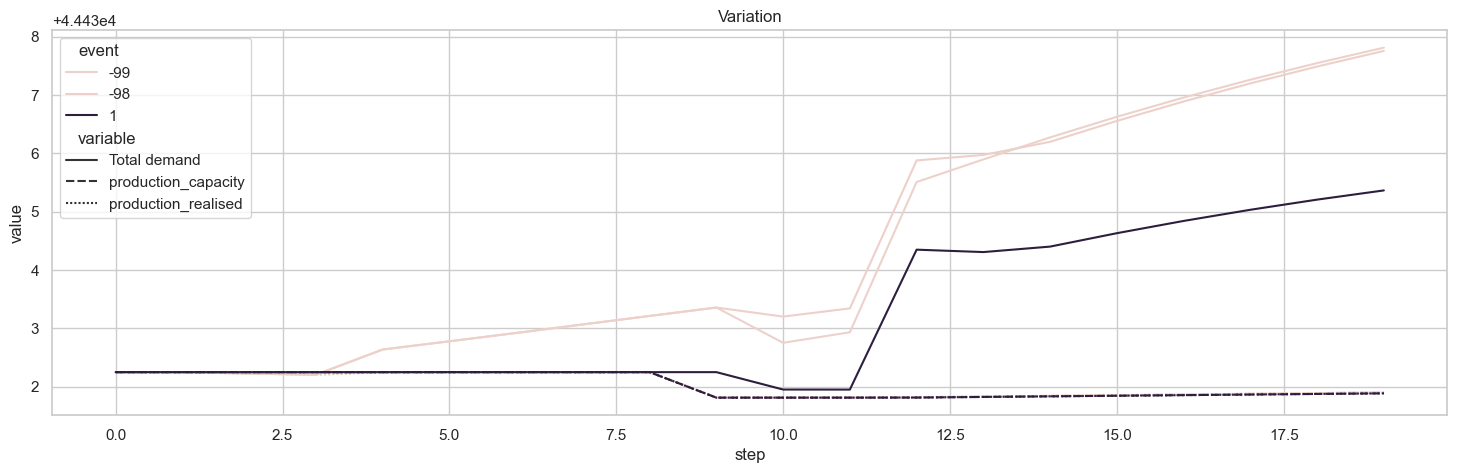

In [51]:
min_range = 0
max_range = 20
industry = "Manufacture"

results_subset = results["OECD21-2018"]["9-6"]

fig, ax = plt.subplots(figsize=(18, 5))
prod_df = region_results_df.loc[
    (region_results_df["event"].isin([-99,-98,1])) &
    (region_results_df["variable"].isin(["production_realised","production_capacity"])) &
    (region_results_df["step"].isin(list(range(min_range,max_range)))) &
    (region_results_df["sector"]==industry)
]

dem_df = region_results_df.loc[(region_results_df["event"].isin([-99,-98,1])) &
    (region_results_df["variable"].isin(["final_demand","intermediate_demand","rebuild_demand"])) &
    (region_results_df["step"].isin(list(range(min_range,max_range)))) &
    (region_results_df["sector"]==industry)]
dem_df = dem_df.groupby(["step","sector","event"],as_index=False)["value"].sum()
dem_df["variable"] = "Total demand"

plot_indirect_impact(ax, pd.concat([dem_df,prod_df]))

# Add seaborn styling
sns.set(style="whitegrid")
ax.set_title("Variation")
#ax.legend()
plt.show()

In [107]:
region_results_df.sort_values("step")

variable  event  step       sector        value
0        productive_capital_to_recover      2     0  Agriculture     0.000000
3589755                   final_demand     15     0        Other  5610.603131
1641095                 overproduction     11     0       Energy     1.000000
312055             production_realised     10     0  Agriculture  5824.404977
5590050             final_demand_unmet      2     0    Utilities     0.000000
...                                ...    ...   ...          ...          ...
4029774                   rebuild_prod     18  2244        Sales     0.031984
4027529                   rebuild_prod     12  2244        Sales     0.001383
4025284                   rebuild_prod      6  2244        Sales     0.000000
4043244                 overproduction      2  2244        Sales     1.000003
6061499                   final_demand    -98  2244    Utilities   196.619941

[6061500 rows x 5 columns]

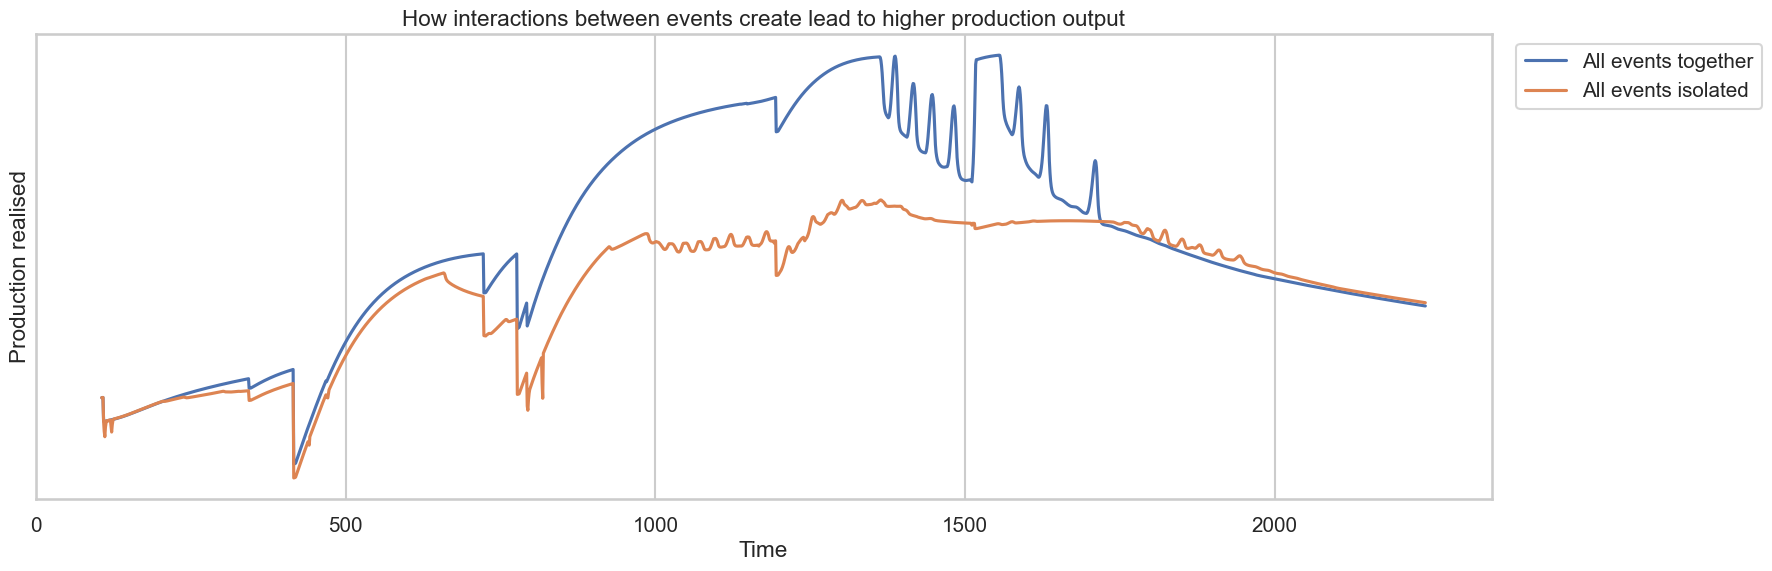

In [108]:
min_range = 106
max_range = 2244
industry = "Manufacture"

results_subset = results["OECD21-2018"]["9-6"]

fig, ax = plt.subplots(figsize=(18, 6))
prod_df = region_results_df.loc[
    (region_results_df["event"].isin([-99, -98, 5])) &
    (region_results_df["variable"].isin(["production_realised", "production_capacity"])) &
    (region_results_df["step"].isin(list(range(min_range, max_range)))) &
    (region_results_df["sector"] == industry)
]

dem_df = region_results_df.loc[(region_results_df["event"].isin([-99, -98, 5])) &
                               (region_results_df["variable"].isin(
                                   ["final_demand", "intermediate_demand", "rebuild_demand"])) &
                               (region_results_df["step"].isin(list(range(min_range, max_range)))) &
                               (region_results_df["sector"] == industry)]
dem_df = dem_df.groupby(["step", "sector", "event"], as_index=False)["value"].sum()
dem_df["variable"] = "Total demand"

to_plot = pd.concat([dem_df, prod_df])
to_plot['event'] = to_plot['event'].astype(str)
to_plot.rename(columns={"event":"Simulation type","variable":"Economic variable","step":"Time"},inplace=True)
to_plot.replace({"-99":"All events together","-98":"All events isolated","5":"Specific event","production_realised":"Production realised","production_capacity":"Production capacity"},inplace=True)

to_plot = to_plot.loc[((to_plot["Economic variable"]=="Production realised"))]
#to_plot = to_plot.loc[~((to_plot["Simulation type"]=="All events isolated") & (to_plot["Economic variable"]=="Production capacity"))]
#to_plot = to_plot.loc[~((to_plot["Simulation type"]=="All events together") & (to_plot["Economic variable"]=="Production capacity"))]
to_plot = to_plot.loc[(to_plot["Simulation type"]!="Specific event")]
#to_plot = to_plot.loc[~((to_plot["Simulation type"]=="Specific event") & (to_plot["Economic variable"]=="Production capacity"))]

g = sns.lineplot(
        data=to_plot.copy(),
        x = "Time",
        y = "value",
        ax=ax,
        #label="sample",
        hue="Simulation type",
        #style="Economic variable",  # Add hue parameter to share color for the same var
        #linestyle=":"
    )

# Remove axis ticks on both axes
#ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel("Production realised")

# Add seaborn styling
sns.set(style="whitegrid")
sns.set_context("talk",font_scale=0.9)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
# Set the modified title
ax.set_title("How interactions between events create lead to higher production output")
plt.tight_layout()
plt.savefig("../../../../Latex/imgs-general/Plots/GlobalTCs/event_interaction_production_example_impacted_region_full.pdf")
plt.show()

In [92]:
region_results_df

variable  event  step       sector       value
0        productive_capital_to_recover      2     0  Agriculture    0.000000
1        productive_capital_to_recover      2     1  Agriculture    0.000000
2        productive_capital_to_recover      2     2  Agriculture    0.000000
3        productive_capital_to_recover      2     3  Agriculture    0.000000
4        productive_capital_to_recover      2     4  Agriculture    0.000000
...                                ...    ...   ...          ...         ...
6061495                   final_demand    -98  2240    Utilities  196.619941
6061496                   final_demand    -98  2241    Utilities  196.619941
6061497                   final_demand    -98  2242    Utilities  196.619941
6061498                   final_demand    -98  2243    Utilities  196.619941
6061499                   final_demand    -98  2244    Utilities  196.619941

[6061500 rows x 5 columns]

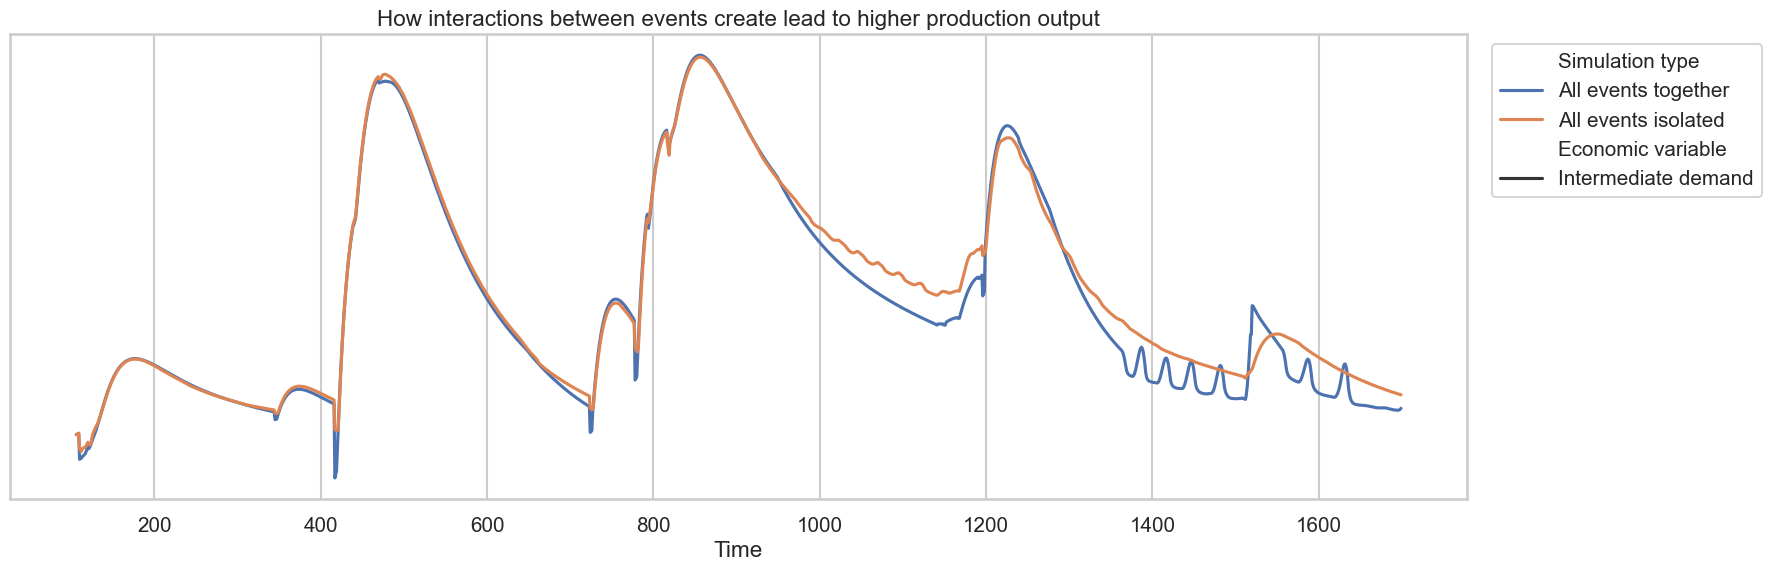

In [102]:
min_range = 106
max_range = 1700
industry = "Manufacture"

results_subset = results["OECD21-2018"]["9-6"]

fig, ax = plt.subplots(figsize=(18, 6))
prod_df = region_results_df.loc[
    (region_results_df["event"].isin([-99, -98, 5])) &
    (region_results_df["variable"].isin(["productive_capital_to_recover"])) &
    (region_results_df["step"].isin(list(range(min_range, max_range)))) &
    (region_results_df["sector"] == industry)
]

dem_df = region_results_df.loc[(region_results_df["event"].isin([-99, -98, 5])) &
                               (region_results_df["variable"].isin(
                                   ["final_demand", "intermediate_demand", "rebuild_demand"])) &
                               (region_results_df["step"].isin(list(range(min_range, max_range)))) &
                               (region_results_df["sector"] == industry)]

to_plot = dem_df.copy()
to_plot['event'] = to_plot['event'].astype(str)
to_plot.rename(columns={"event":"Simulation type","variable":"Economic variable","step":"Time"},inplace=True)
to_plot.replace({"-99":"All events together",
                 "-98":"All events isolated",
                 "5":"Specific event",
                 "production_realised":"Production realised",
                 "production_capacity":"Production capacity",
                 "productive_capital_to_recover":"Remaining capital to recover",
                "final_demand":"Final demand", 
                 "intermediate_demand":"Intermediate demand",
                 "rebuild_demand":"Rebuild demand"
                },inplace=True)

to_plot = to_plot.loc[((to_plot["Economic variable"]=="Intermediate demand"))]
#to_plot = to_plot.loc[~((to_plot["Simulation type"]=="All events isolated") & (to_plot["Economic variable"]=="Production capacity"))]
#to_plot = to_plot.loc[~((to_plot["Simulation type"]=="All events together") & (to_plot["Economic variable"]=="Production capacity"))]
to_plot = to_plot.loc[(to_plot["Simulation type"]!="Specific event")]
#to_plot = to_plot.loc[~((to_plot["Simulation type"]=="Specific event") & (to_plot["Economic variable"]=="Production capacity"))]

g = sns.lineplot(
        data=to_plot.copy(),
        x = "Time",
        y = "value",
        ax=ax,
        #label="sample",
        hue="Simulation type",
        style="Economic variable",  # Add hue parameter to share color for the same var
        #linestyle=":"
    )

# Remove axis ticks on both axes
#ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel("")

# Add seaborn styling
sns.set(style="whitegrid")
sns.set_context("talk",font_scale=0.9)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
# Set the modified title
ax.set_title("How interactions between events create lead to higher production output")
plt.tight_layout()
#plt.savefig("../../../../Latex/imgs-general/Plots/GlobalTCs/event_interaction_production_example_impacted_region_full.pdf")
plt.show()

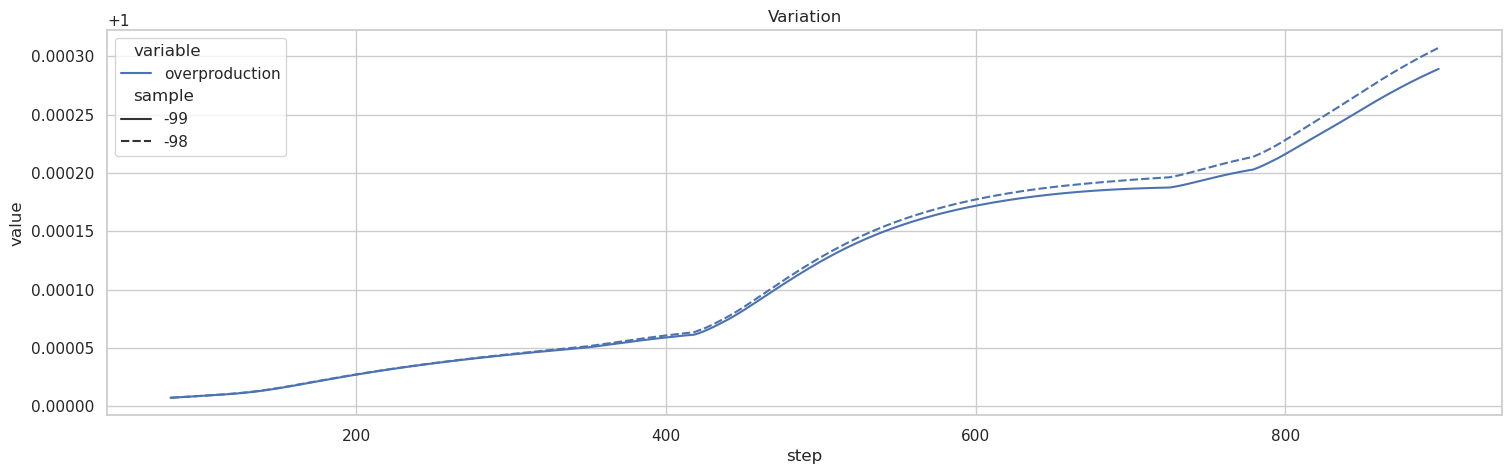

In [148]:
region = "JPN"
#var = "production_realised"
min_range = 80
max_range = 900
industry = "Manufacture"

results_subset = results["OECD21-2018"]["9-6"]

fig, ax = plt.subplots(figsize=(18, 5))
df = region_results_df.loc[
    (region_results_df["sample"].isin([-99,-98])) &
    (region_results_df["variable"].isin(["overproduction"])) &
    (region_results_df["step"].isin(list(range(min_range,max_range)))) &
    (region_results_df["sector"]==industry)
]

plot_indirect_impact(ax, df)

# Add seaborn styling
sns.set(style="whitegrid")
ax.set_title("Variation")
#ax.legend()
plt.show()

In [132]:
dem_df

step  sector  sample        value      variable
0       0  Energy     -99  4474.168130  Total demand
1       0  Energy     -98  4474.168130  Total demand
2       1  Energy     -99  4474.168130  Total demand
3       1  Energy     -98  4474.168130  Total demand
4       2  Energy     -99  4474.167532  Total demand
..    ...     ...     ...          ...           ...
595   297  Energy     -98  4474.990866  Total demand
596   298  Energy     -99  4475.043043  Total demand
597   298  Energy     -98  4474.988748  Total demand
598   299  Energy     -99  4475.041310  Total demand
599   299  Energy     -98  4474.986630  Total demand

[600 rows x 5 columns]

/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

In [12]:
results_subset

region                                            ARG               \
sector                                    Agriculture Construction   
var                           sample step                            
productive_capital_to_recover -99    0       0.000000     0.000000   
                                     1       0.000000     0.000000   
                                     2       0.000000     0.000000   
                                     3       0.000000     0.000000   
                                     4       0.000000     0.000000   
...                                               ...          ...   
intermediate_demand            16    2240  120.142283    21.669386   
                                     2241  120.142281    21.669386   
                                     2242  120.142279    21.669386   
                                     2243  120.142276    21.669386   
                                     2244  120.142274    21.669386   

region                                                                        \
sector                                         Energy Manufacture     Mining   
var                           sample step                                      
productive_capital_to_recover -99    0       0.000000    0.000000   0.000000   
                                     1       0.000000    0.000000   0.000000   
                                     2       0.000000    0.000000   0.000000   
                                     3       0.000000    0.000000   0.000000   
                                     4       0.000000    0.000000   0.000000   
...                                               ...         ...        ...   
intermediate_demand            16    2240  104.452218  263.164774  18.561336   
                                     2241  104.452217  263.164768  18.561335   
                                     2242  104.452215  263.164762  18.561335   
                                     2243  104.452214  263.164756  18.561335   
                                     2244  104.452213  263.164750  18.561335   

region                                                                        \
sector                                         Other       Sales    Services   
var                           sample step                                      
productive_capital_to_recover -99    0      0.000000    0.000000    0.000000   
                                     1      0.000000    0.000000    0.000000   
                                     2      0.000000    0.000000    0.000000   
                                     3      0.000000    0.000000    0.000000   
                                     4      0.000000    0.000000    0.000000   
...                                              ...         ...         ...   
intermediate_demand            16    2240  29.322679  126.913978  235.948926   
                                     2241  29.322679  126.913976  235.948925   
                                     2242  29.322679  126.913974  235.948923   
                                     2243  29.322679  126.913972  235.948922   
                                     2244  29.322679  126.913970  235.948920   

region                                                          ...  \
sector                                     Transport Utilities  ...   
var                           sample step                       ...   
productive_capital_to_recover -99    0      0.000000   0.00000  ...   
                                     1      0.000000   0.00000  ...   
                                     2      0.000000   0.00000  ...   
                                     3      0.000000   0.00000  ...   
                                     4      0.000000   0.00000  ...   
...                                              ...       ...  ...   
intermediate_demand            16    2240  68.261987  10.86288  ...   
                                     2241  68.261985  10.86288  ...

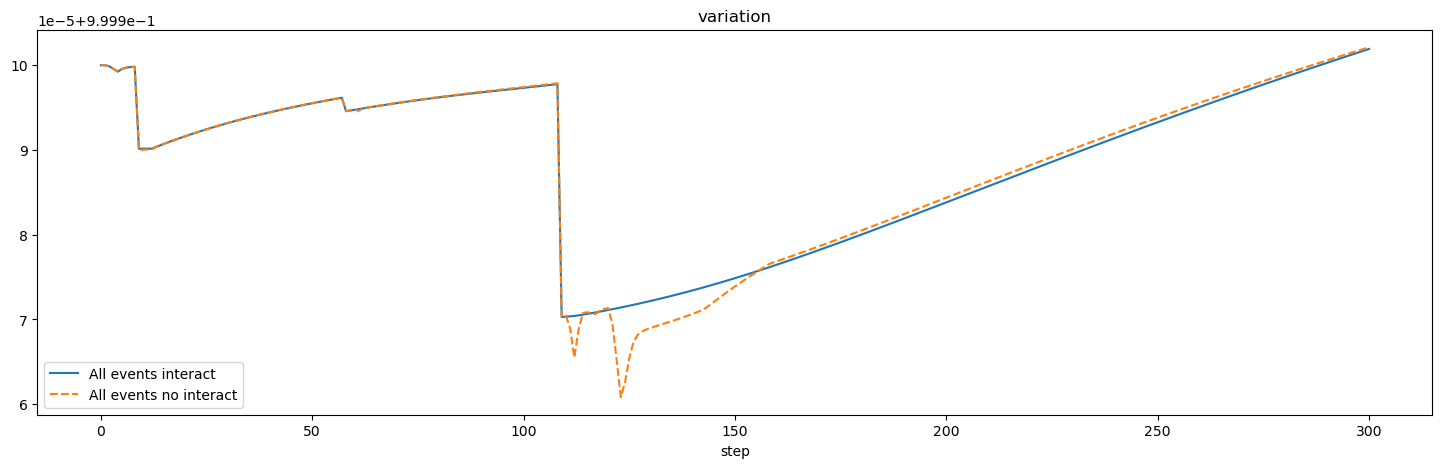

In [7]:
import matplotlib.pyplot as plt

region = "CHN"
var = "production_realised"
min_range = 0
max_range = 300

fig,ax = plt.subplots(figsize=(18,5))

indirect_impact_from_all_ev_1 = results["OECD21-2018"]["9-6"][var][-99]
if var == "production_realised":
    indirect_impact_from_all_ev_norm_1 = indirect_impact_from_all_ev_1 / indirect_impact_from_all_ev_1.loc[0]
else:
    indirect_impact_from_all_ev_norm_1 = indirect_impact_from_all_ev_1

# Exemple 
indirect_impact_from_all_ev_norm_1.loc[min_range:max_range,(region,"Energy")].plot(ax=ax, title="variation", label="All events interact")

indirect_impact_from_all_ev_2 = results["OECD21-2018"]["9-6"][var][-98]
if var == "production_realised":
    indirect_impact_from_all_ev_norm_2 = indirect_impact_from_all_ev_2 / indirect_impact_from_all_ev_2.loc[0]
else:
    indirect_impact_from_all_ev_norm_2 = indirect_impact_from_all_ev_2    
# Exemple 
indirect_impact_from_all_ev_norm_2.loc[min_range:max_range,(region,"Energy")].plot(ax=ax, label="All events no interact", style="--")


#indirect_impact_from_all_ev = results["OECD21-2018"]["9-6"][var][7]
#if var == "production_realised":
#    indirect_impact_from_all_ev_norm = indirect_impact_from_all_ev / indirect_impact_from_all_ev.loc[0]
#else:
#    indirect_impact_from_all_ev_norm = indirect_impact_from_all_ev

# Exemple 
#indirect_impact_from_all_ev_norm.loc[min_range:max_range,(region,"Manufacture")].plot(ax=ax, label="Event n°7 with interaction")

#indirect_impact_from_all_ev = results["OECD21-2018"]["9-6"][var][-8]
#if var == "production_realised":
#    indirect_impact_from_all_ev_norm = indirect_impact_from_all_ev / indirect_impact_from_all_ev.loc[0]
#else:
#    indirect_impact_from_all_ev_norm = indirect_impact_from_all_ev

# Exemple 
#indirect_impact_from_all_ev_norm.loc[min_range:max_range,(region,"Manufacture")].plot(ax=ax, label="Event n°7 without interaction")


ax.legend()

### Compute indirect impact generated on an event basis (Aggregated)

```process_res_df()``` returns a DataFrame with indirect impact aggregated over the whole timeserie for a given mriot, invtype, event and variable.

indirect impact is given for all (region,sector) tuples

#### For one specific result :

In [163]:
df_agg = process_res_df(results, sample_n=96, mriot="OECD21-2018", invtype="9-6", event_id=6, var="production_realised")
df_agg

total indirect impact  sample        MRIOT invtype  event_id  \
region                                                                 
ARG                  2.466028      96  OECD21-2018     9-6         6   
AUS                 79.842173      96  OECD21-2018     9-6         6   
AUT                  9.877763      96  OECD21-2018     9-6         6   
BEL                 10.538879      96  OECD21-2018     9-6         6   
BGR                  3.274874      96  OECD21-2018     9-6         6   
...                       ...     ...          ...     ...       ...   
TUR                  9.927934      96  OECD21-2018     9-6         6   
TWN                425.923586      96  OECD21-2018     9-6         6   
USA                432.320363      96  OECD21-2018     9-6         6   
VNM                343.148406      96  OECD21-2018     9-6         6   
ZAF                 10.863459      96  OECD21-2018     9-6         6   

                   variable  
region                       
ARG     production_realised  
AUS     production_realised  
AUT     production_realised  
BEL     production_realised  
BGR     production_realised  
...                     ...  
TUR     production_realised  
TWN     production_realised  
USA     production_realised  
VNM     production_realised  
ZAF     production_realised  

[67 rows x 6 columns]

#### For all results :

In [164]:
meta_df_agg = aggregate_results(results,96)

In [135]:
meta_df_agg

region  total indirect impact  sample        MRIOT invtype  event_id  \
0       ARG              36.238981      96  OECD21-2018     9-6       -99   
1       AUS             277.867184      96  OECD21-2018     9-6       -99   
2       AUT              79.921121      96  OECD21-2018     9-6       -99   
3       BEL              90.225114      96  OECD21-2018     9-6       -99   
4       BGR              29.295918      96  OECD21-2018     9-6       -99   
...     ...                    ...     ...          ...     ...       ...   
7231    TUR               3.531343      96  OECD21-2018   90-60         7   
7232    TWN               7.903981      96  OECD21-2018   90-60         7   
7233    USA              47.186928      96  OECD21-2018   90-60         7   
7234    VNM               7.867258      96  OECD21-2018   90-60         7   
7235    ZAF               2.664107      96  OECD21-2018   90-60         7   

                 variable  
0      final_demand_unmet  
1      final_demand_unmet  
2      final_demand_unmet  
3      final_demand_unmet  
4      final_demand_unmet  
...                   ...  
7231  production_realised  
7232  production_realised  
7233  production_realised  
7234  production_realised  
7235  production_realised  

[7236 rows x 7 columns]

### Merging with direct impact:

Preparing direct impact

In [165]:
direct_impact_df = df_impact_countries.copy()
direct_impact_df = direct_impact_df / 10**6 # make it in the same unit as results (M€)
direct_impact_df = direct_impact_df.droplevel(1,axis=0)
direct_impact_df.columns.name = None
direct_impact_df = direct_impact_df.reset_index(names="event_id")
direct_impact_df

event_id  ARG  AUS  AUT  BEL  BGR  BRA  BRN  CAN  CHE  ...  SVK  SVN  SWE  \
0          0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1          1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2          2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3          3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4          4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5          5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
6          6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
7          7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
8          8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
9          9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
10        10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
11        11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
12        12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
13        13  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
14        14  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
15        15  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
16        16  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
17        17  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
18        18  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
19        19  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

         THA  TUN  TUR         TWN          USA         VNM  ZAF  
0   0.000000  0.0  0.0  394.671542     0.000000    0.000000  0.0  
1   0.000000  0.0  0.0    0.000000     0.000000    0.000000  0.0  
2   0.000000  0.0  0.0    0.000000     0.000000    0.000000  0.0  
3   0.000000  0.0  0.0    0.000000     0.000000    0.000000  0.0  
4   0.000000  0.0  0.0    0.000000     0.000000    0.000000  0.0  
5   0.000000  0.0  0.0    0.000000     0.000000    0.000000  0.0  
6   0.000000  0.0  0.0    0.000000     0.000000    0.000000  0.0  
7   0.000000  0.0  0.0    0.000000  2045.279108    0.000000  0.0  
8   0.000000  0.0  0.0    0.000000     0.000000    0.000000  0.0  
9   0.000000  0.0  0.0    0.000000     0.000000    0.000000  0.0  
10  0.000000  0.0  0.0    0.000000     0.000000    0.000000  0.0  
11  0.000000  0.0  0.0  351.048296     0.000000    0.000000  0.0  
12  0.000000  0.0  0.0  297.223650     0.000000    0.000000  0.0  
13  0.000000  0.0  0.0    0.000000     0.000000  559.397819  0.0  
14  0.000000  0.0  0.0    0.000000     0.000000  575.258682  0.0  
15  0.000000  0.0  0.0    0.000000     0.000000    0.000000  0.0  
16  0.123183  0.0  0.0    0.000000     0.000000  780.778676  0.0  
17  0.000000  0.0  0.0    0.000000   346.720436    0.000000  0.0  
18  0.000000  0.0  0.0  894.605868     0.000000    0.000000  0.0  
19  0.000000  0.0  0.0    0.000000     0.000000    0.000000  0.0  

[20 rows x 68 columns]

Actually merging (+ reordering columns)

In [166]:
final_results = meta_df_agg.merge(direct_impact_df)[["sample","MRIOT","invtype","event_id","variable","region","total indirect impact"]+df_impact_countries.columns.to_list()]

final_results contains the following:

- sample : the sample considered (only the one you are working on at the moment, it is there for later scalability)
- MRIOT : same as above for MRIOT
- invtype : the Inv. Scenario
- event_id : the id of the event considered
- variable : the variable for "total indirect impact" column
- region : region considered for indirect impact
- total indirect impact : total indirect impact (for the event looked at, considering interaction with other event !)
- REGION_NAME : direct impact in REGION_NAME for the event considered

Be carefull when summing rows as the direct impact is duplicated for rows sharing the same event_id

Reminder : 
```
EU_regs_wiod = ["AUT","BEL","BGR","CHE","DEU","DNK","EST","ESP","FIN","FRA","GBR","GRC","HRV","HUN","IRL","ITA","LTU","LUX","LVA","MLT","NLD","NOR","POL","PRT","ROU","SWE","SVN","SVK"]
```

In [167]:
final_results.sort_values("total indirect impact")

sample        MRIOT invtype  event_id             variable region  \
948       96  OECD21-2018   90-60         5   final_demand_unmet    CHN   
1752      96  OECD21-2018   90-60        12   final_demand_unmet    CHN   
3360      96  OECD21-2018   90-60         1   final_demand_unmet    CHN   
4700      96  OECD21-2018   90-60        18   final_demand_unmet    CHN   
2288      96  OECD21-2018   90-60        14   final_demand_unmet    CHN   
...      ...          ...     ...       ...                  ...    ...   
2489      96  OECD21-2018     9-6        15  production_realised    CHN   
479       96  OECD21-2018   90-60         2  production_realised    CHN   
1283      96  OECD21-2018   90-60        16  production_realised    CHN   
345       96  OECD21-2018     9-6         2  production_realised    CHN   
1149      96  OECD21-2018     9-6        16  production_realised    CHN   

      total indirect impact  ARG  AUS  AUT  ...  SVK  SVN  SWE       THA  TUN  \
948            -5907.082262  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.000000  0.0   
1752           -5904.034147  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.000000  0.0   
3360           -5892.093042  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.000000  0.0   
4700           -5889.478292  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.000000  0.0   
2288           -5883.642109  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.000000  0.0   
...                     ...  ...  ...  ...  ...  ...  ...  ...       ...  ...   
2489            7742.478305  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.000000  0.0   
479             8335.044513  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.000000  0.0   
1283            8605.313680  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.123183  0.0   
345             9077.599459  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.000000  0.0   
1149            9386.244073  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.123183  0.0   

      TUR         TWN  USA         VNM  ZAF  
948   0.0    0.000000  0.0    0.000000  0.0  
1752  0.0  297.223650  0.0    0.000000  0.0  
3360  0.0    0.000000  0.0    0.000000  0.0  
4700  0.0  894.605868  0.0    0.000000  0.0  
2288  0.0    0.000000  0.0  575.258682  0.0  
...   ...         ...  ...         ...  ...  
2489  0.0    0.000000  0.0    0.000000  0.0  
479   0.0    0.000000  0.0    0.000000  0.0  
1283  0.0    0.000000  0.0  780.778676  0.0  
345   0.0    0.000000  0.0    0.000000  0.0  
1149  0.0    0.000000  0.0  780.778676  0.0  

[5092 rows x 74 columns]

In [173]:
EU_regs_wiod = ["AUT","BEL","BGR","CHE","DEU","DNK","EST","ESP","FIN","FRA","GBR","GRC","HRV","HUN","IRL","ITA","LTU","LUX","LVA","MLT","NLD","NOR","POL","PRT","ROU","SWE","SVN","SVK"]

tmp = final_results.set_index(["sample","MRIOT","invtype","event_id","variable","region"]).loc[pd.IndexSlice[96,"OECD21-2018","90-60",:,"production_realised"]].sort_index()
EU_results = tmp.loc[pd.IndexSlice[:,EU_regs_wiod],:]
EU_results = EU_results.groupby("event_id").agg({k: 'sum' if k == 'total indirect impact' else "first" for k in EU_results.columns})

test = EU_results.drop(labels=EU_results.columns[(EU_results == 0).all()], axis=1)

In [228]:
test

total indirect impact           CHN          JPN       KHM  \
event_id                                                               
1                   -120.805222  15168.318695     0.876722  0.000000   
2                    161.091225      0.000000  1784.954840  0.000000   
3                    -90.022947      0.000000     0.000000  0.000000   
4                    -78.261204      0.000000     0.000000  0.000000   
5                   -104.977616      0.000000   447.737038  0.000000   
6                    -45.297196   1088.499393     0.000000  0.000000   
7                    -98.527156      0.000000     0.000000  0.000000   
8                    -39.259783      0.000000     1.531209  0.000000   
9                    -52.889741      0.000000   411.973252  0.000000   
10                   -49.457606      0.000000  2005.279106  0.000000   
11                   -87.080952      0.000000     0.000000  0.000000   
12                  -123.157414   1347.759017     0.000000  0.000000   
13                   -96.091499      0.000000     0.000000  0.000000   
14                  -111.562086   2546.177645     0.000000  0.000000   
15                   -51.398808  17056.702358    10.181324  0.000000   
16                   208.598665      0.000000     0.000000  0.000008   
17                  -102.328772      0.000000     0.000000  0.000000   
18                   -79.301986      0.000000     0.000000  0.000000   
19                  -110.413674     25.766797   520.630398  0.000000   

                 KOR       LAO          PHL         ROW       THA         TWN  \
event_id                                                                        
1           0.000000  0.000000     0.000000    0.000000  0.000000    0.000000   
2           0.000000  0.000000     0.000000    0.000000  0.000000    0.000000   
3           0.000000  0.000000  1361.415759    0.000000  0.000000    0.000000   
4           0.000000  0.000000     0.000000  651.630859  0.000000    0.000000   
5           0.000000  0.000000     0.000000    0.000000  0.000000    0.000000   
6           0.000000  0.000000     0.000000    0.000000  0.000000    0.000000   
7           0.000000  0.000000     0.000000    0.000000  0.000000    0.000000   
8         342.161448  0.000000     0.000000    0.000000  0.000000    0.000000   
9           0.000000  0.000000     2.499034    0.000000  0.000000    0.000000   
10          0.000000  0.000000     0.000000    0.000000  0.000000    0.000000   
11          0.000000  0.000000     0.003790    0.000000  0.000000  351.048296   
12          0.000000  0.000000     0.000000    0.000000  0.000000  297.223650   
13          0.000000  0.000000     0.001210    0.000000  0.000000    0.000000   
14          0.000000  0.000000     0.039954    0.000000  0.000000    0.000000   
15          0.000000  0.000000     0.000000    0.000000  0.000000    0.000000   
16          0.000000  4.113747    86.560346    0.000000  0.123183    0.000000   
17          0.000000  0.000000     0.000000    0.000000  0.000000    0.000000   
18          0.000000  0.000000     0.003005    0.000000  0.000000  894.605868   
19          0.000000  0.000000     0.000000    0.000000  0.000000    0.000000   

                  USA         VNM  
event_id                           
1            0.000000    0.000000  
2            0.000000    0.000000  
3            0.000000    0.000000  
4            0.000000    0.000000  
5            0.000000    0.000000  
6            0.000000    0.000000  
7         2045.279108    0.000000  
8            0.000000    0.000000  
9            0.000000    0.000000  
10           0.000000    0.000000  
11           0.000000    0.000000  
12           0.000000    0.000000  
13           0.000000  559.397819  
14           0.000000  575.258682  
15           0.000000    0.000000  
16           0.000000  780.778676  
17         346.720436    0.000000  
18           0.000000    0.000000  
19           0.000000    0.000000

In [232]:
dir_imp = test.reset_index().melt(id_vars="event_id",value_vars=test.columns[1:],value_name="value",var_name="region")

In [234]:
indir_imp = test.reset_index()[["event_id","total indirect impact"]].rename(columns={"total indirect impact":"value"})
#pd.concat([dir_imp,indir_imp],ignore_index=True)

In [235]:
indir_imp["source"] = "Event n° "+indir_imp["event_id"].astype(str)
indir_imp['target'] = "Europe"

indir_imp.loc[(indir_imp["value"]<0),"target"] = "indir. gains in "+indir_imp.loc[(indir_imp["value"]<0),"target"]
indir_imp.loc[(indir_imp["value"]>0),"target"] = "indir. losses in "+indir_imp.loc[(indir_imp["value"]>0),"target"]
indir_imp["value"] = indir_imp["value"].abs()


In [236]:
dir_imp["source"] = dir_imp["region"]
dir_imp["target"] = "Event n° "+dir_imp["event_id"].astype(str)

In [237]:
sankey_df = pd.concat([dir_imp[["source","target","value"]],indir_imp[["source","target","value"]]],ignore_index=True)

In [239]:
sankey = hv.Sankey(sankey_df[sankey_df["value"]>0.1])
sankey.opts(
    label_position='outer',
    edge_color='target', node_color='index', cmap='tab20',
    width=1400,
    height=800,
    #cmap=nodes.data["color"].to_dict(),
    #edge_color="color",
    #labels ='name',
    #node_color="color",
    #label_text_font_size="14pt",
    #show_values=False,
    #title="Indirect final demand losses propagation"
)
sankey

/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, Extensi

:Sankey   [source,target]   (value)

# Graph ideas for the paper

In [36]:
df.sort_values("Total indirect impact (€ Billions)")

Sample        MRIOT Inv. Scenario Event interaction ?  \
41       10  OECD21-2018           9-6                  No   
43       10  OECD21-2018           9-6                 Yes   
213      53  OECD21-2018           9-6                  No   
9         2  OECD21-2018           9-6                  No   
313      78  OECD21-2018           9-6                  No   
..      ...          ...           ...                 ...   
120      30  OECD21-2018           9-6                  No   
138      34  OECD21-2018           9-6                 Yes   
6         1  OECD21-2018           9-6                 Yes   
136      34  OECD21-2018           9-6                  No   
4         1  OECD21-2018           9-6                  No   

                Variable  Total direct impact (€ Billions)  \
41     Production change                        103.426029   
43     Production change                        103.426029   
213    Production change                        135.956423   
9      Production change                         87.411724   
313    Production change                         51.122605   
..                   ...                               ...   
120  Final demand losses                        502.729601   
138  Final demand losses                        744.458426   
6    Final demand losses                        807.546212   
136  Final demand losses                        744.458426   
4    Final demand losses                        807.546212   

     Total indirect impact (€ Billions)  
41                           -25.275129  
43                           -22.077830  
213                            5.397109  
9                              8.684013  
313                           10.253397  
..                                  ...  
120                          426.373850  
138                          441.702790  
6                            551.634814  
136                          651.583769  
4                            681.738563  

[400 rows x 7 columns]

## Graph 1 : Indirect cost relative to direct cost at the global scale

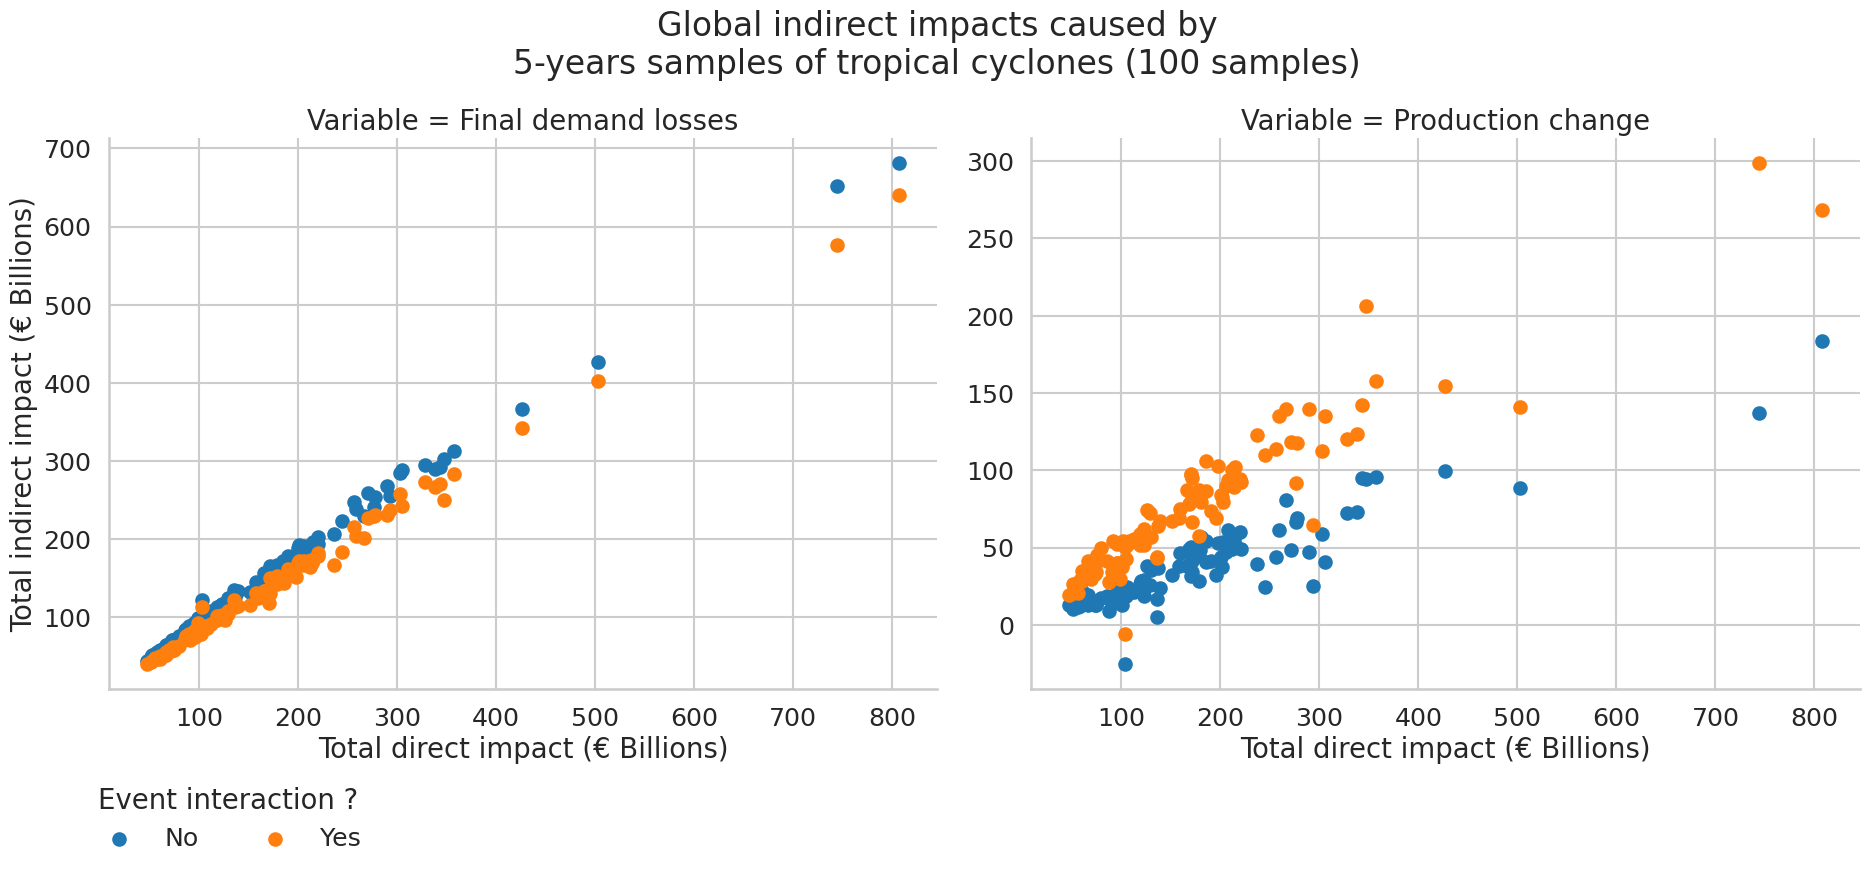

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Sample DataFrame
df = clean_df.loc[clean_df["Inv. Scenario"]=="9-6"].groupby(
    [
        'Sample', 'MRIOT', 'Inv. Scenario', 'Event interaction ?', 'Variable'
    ],as_index=False)[['Total direct impact (€ Billions)', 'Total indirect impact (€ Billions)']].sum()

# Replace column names
# Set the style of the plot
sns.set_style("whitegrid")
#sns.set(style="whitegrid")
sns.set_context("talk",font_scale=1.1)

# Create a facet grid plot
g = sns.FacetGrid(df, col="Variable", hue="Event interaction ?", sharey=False, aspect=1.2, height=8)

# Map the scatter plot on the facet grid
g.map(plt.scatter, "Total direct impact (€ Billions)", "Total indirect impact (€ Billions)")
#for row in df.loc[df["Variable"]=="Production change"].itertuples():
#    ax = g.axes[0, 1]
#    ax.text(row[6] + 0.5, row[5], row[1], horizontalalignment='left')

#g.map(sns.regplot, "Global direct impact (€ Billions)", "Global indirect impact (€ Billions)", scatter=False, lowess=True)

# Add a legend
g.add_legend()
sns.move_legend(g, "lower left", ncol=2,bbox_to_anchor=(0.05,-0.1))
g.fig.subplots_adjust(top=0.82)
bbox = g.axes[0,0].get_position()
center=bbox.x1#+bbox.x1)
plt.suptitle("Global indirect impacts caused by\n5-years samples of tropical cyclones (100 samples)", x=center) 



# Show the plot
plt.show()
#g.savefig("../../../../Latex/imgs-general/Plots/GlobalTCs/Global_IEI_vs_DEI_9-6.pdf")

## Graph 1.1 : Indirect cost relative to direct cost at the global scale (Difference between interaction and no interaction)

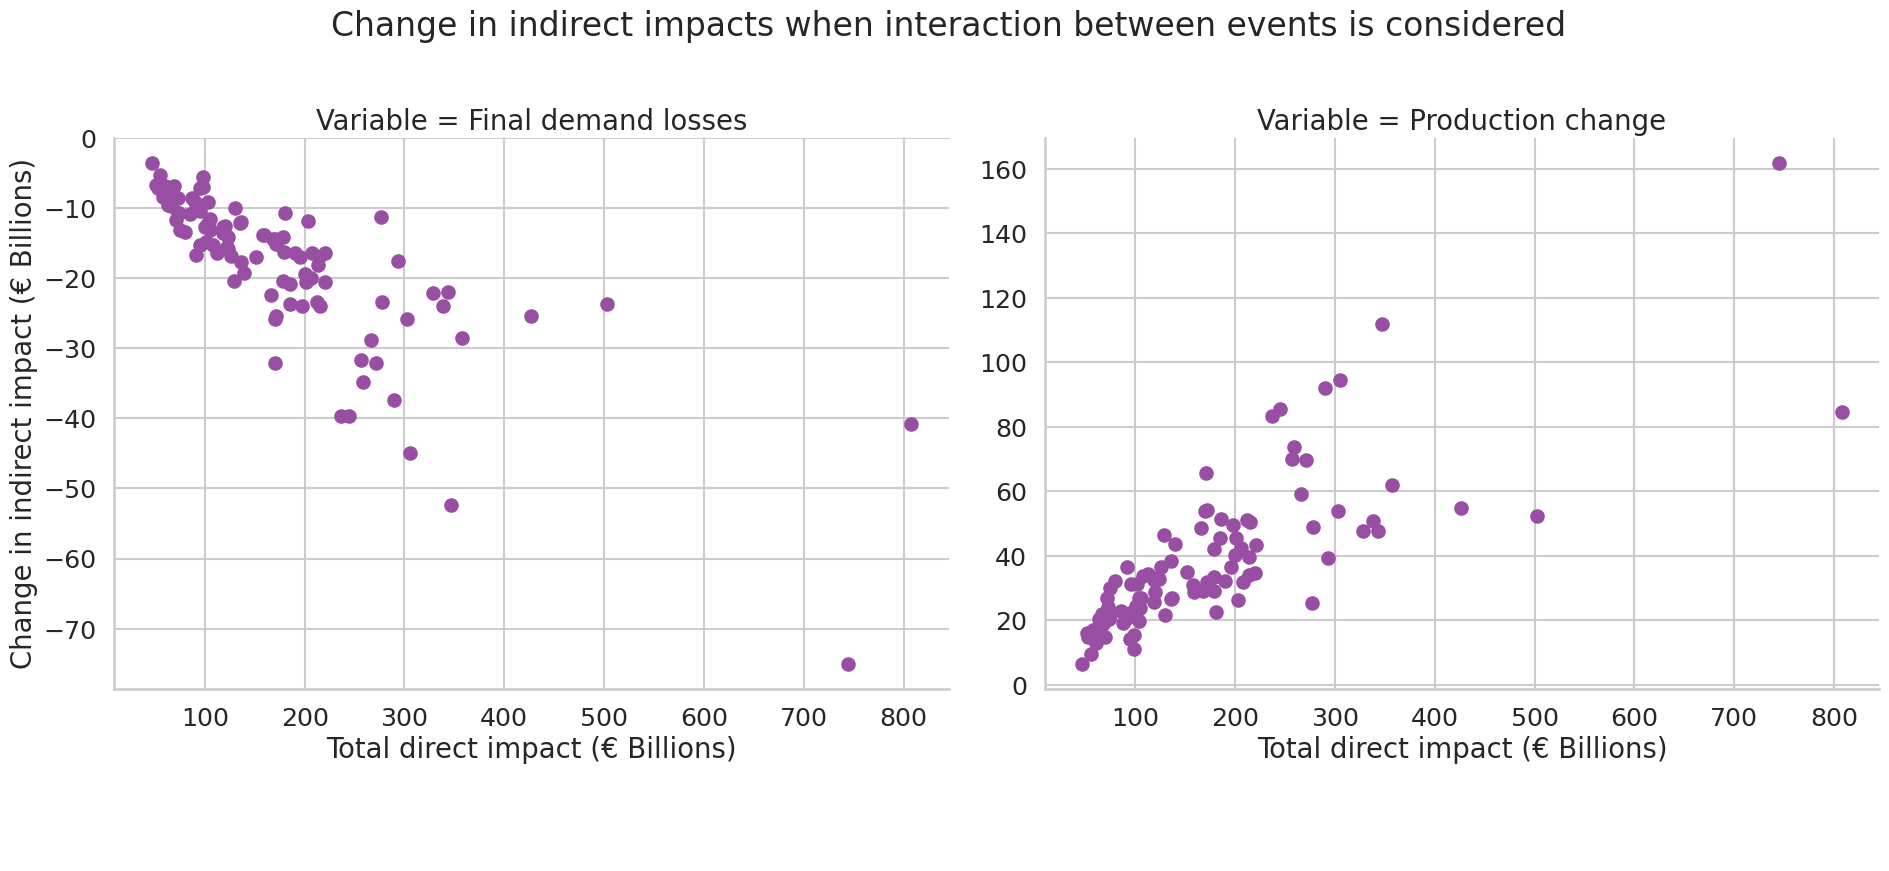

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

palette = sns.color_palette("Set1")

# Sample DataFrame
df = clean_df.loc[(clean_df["Inv. Scenario"]=="9-6")].groupby(
    [
        'Sample', 'MRIOT', 'Inv. Scenario', 'Event interaction ?', 'Variable'
    ],as_index=False)[['Total direct impact (€ Billions)', 'Total indirect impact (€ Billions)']].sum()

df_1 = df.groupby(
    [
        'Sample', 'MRIOT', 'Inv. Scenario', 'Variable'
    ])['Total indirect impact (€ Billions)'].agg(lambda x: x.iloc[1] - x.iloc[0])

df_2 = df.groupby(
    [
        'Sample', 'MRIOT', 'Inv. Scenario', 'Variable'
    ])['Total direct impact (€ Billions)'].agg("first")

df = df_1.to_frame().join(df_2).reset_index()

# Replace column names
# Set the style of the plot
sns.set_style("whitegrid")
#sns.set(style="whitegrid")
sns.set_context("talk",font_scale=1.1)

# Create a facet grid plot
g = sns.FacetGrid(df, col="Variable", sharey=False, aspect=1.2, height=8)

# Map the scatter plot on the facet grid
g.map(plt.scatter, "Total direct impact (€ Billions)", "Total indirect impact (€ Billions)", color=palette[3])

g.axes[0,0].set_ylabel("Change in indirect impact (€ Billions)")
#for row in df.loc[df["Variable"]=="Production change"].itertuples():
#    ax = g.axes[0, 1]
#    ax.text(row[6] + 0.5, row[5], row[1], horizontalalignment='left')

#g.map(sns.regplot, "Global direct impact (€ Billions)", "Global indirect impact (€ Billions)", scatter=False, lowess=True)

# Add a legend
g.add_legend()
sns.move_legend(g, "lower left", ncol=2,bbox_to_anchor=(0.05,-0.1))
g.fig.subplots_adjust(top=0.82)
bbox = g.axes[0,0].get_position()
center=bbox.x1#+bbox.x1)
plt.suptitle("Change in indirect impacts when interaction between events is considered", x=center) 
# Show the plot
plt.show()
g.savefig("../../../../Latex/imgs-general/Plots/GlobalTCs/Global_IEI_vs_DEI_9-6_diff.pdf")

## Graphe 1.1 : Indirect cost relative to direct cost at the global scale (Europe only)

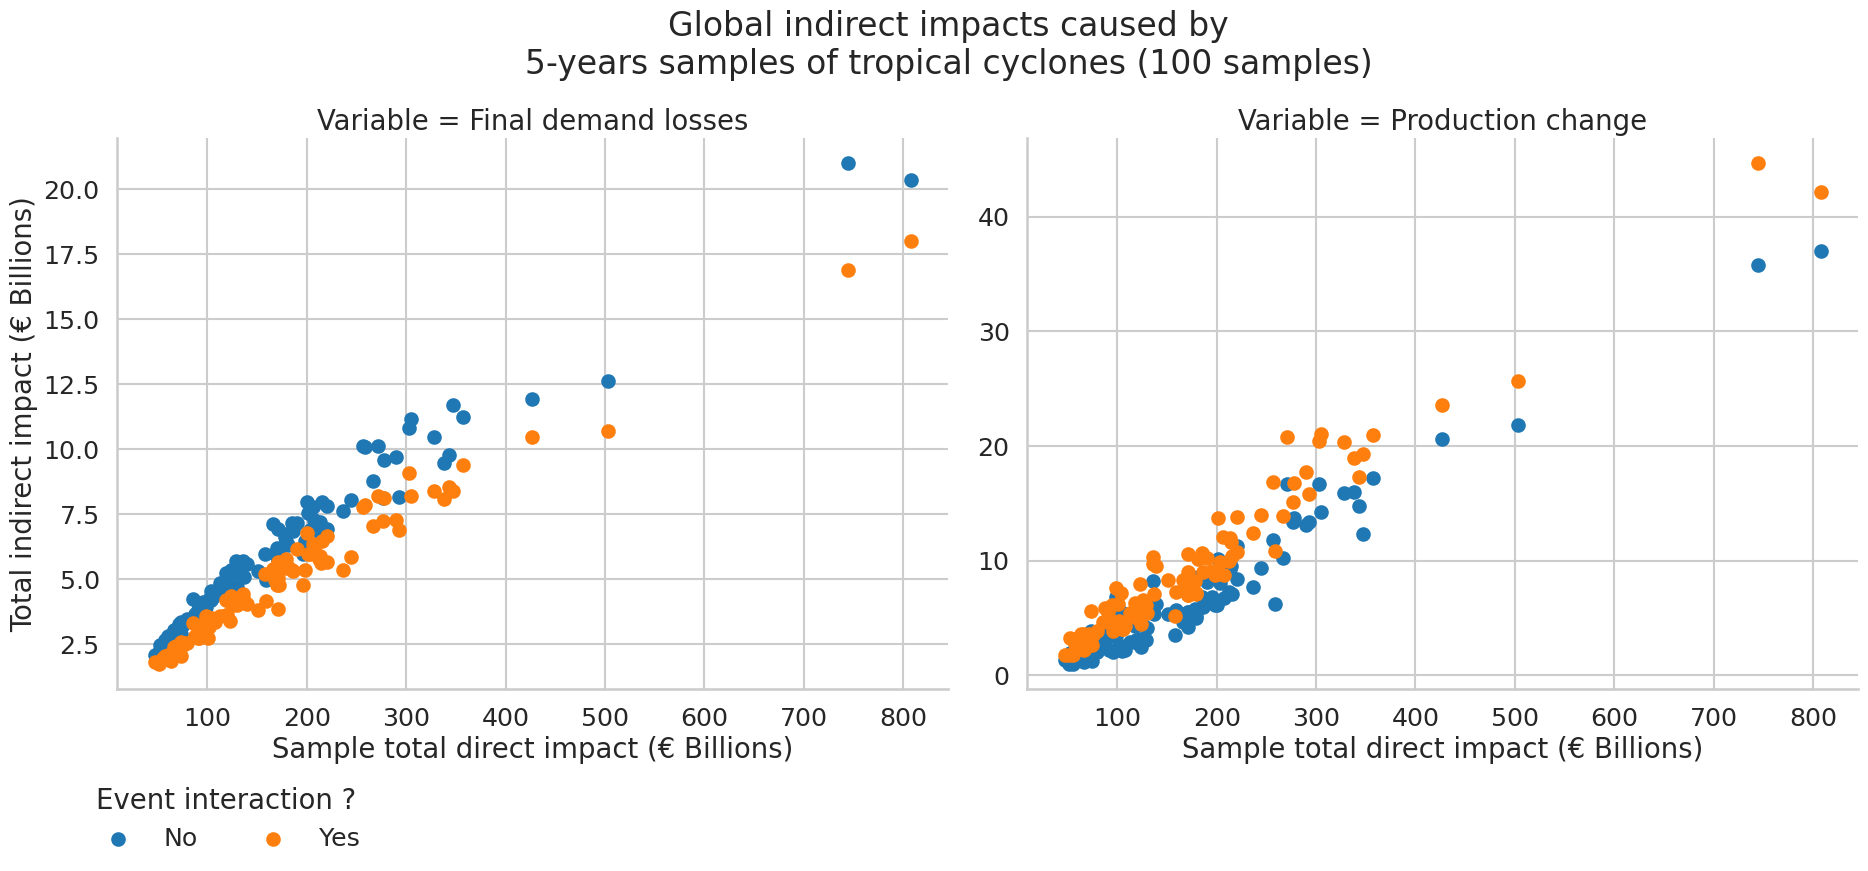

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Sample DataFrame
df = clean_df.loc[clean_df["Inv. Scenario"]=="9-6"].loc[clean_df["Region"]=="Europe"].groupby(['Sample',
                       'MRIOT',
                       'Inv. Scenario',
                       'Event interaction ?', 
                       'Variable']
                     )[['Sample total direct impact (€ Billions)', 'Total indirect impact (€ Billions)']].agg(
    {'Sample total direct impact (€ Billions)':"first", 'Total indirect impact (€ Billions)':"sum"}
).reset_index().copy()

# Replace column names
# Set the style of the plot
sns.set_style("whitegrid")
sns.set_context("talk",font_scale=1.1)

# Create a facet grid plot
g = sns.FacetGrid(df, col="Variable", hue="Event interaction ?", sharey=False, aspect=1.2, height=8)

# Map the scatter plot on the facet grid
g.map(plt.scatter, "Sample total direct impact (€ Billions)", "Total indirect impact (€ Billions)")

#g.map(sns.regplot, "Global direct impact (€ Billions)", "Global indirect impact (€ Billions)", scatter=False, lowess=True)

g.add_legend()
sns.move_legend(g, "lower left", ncol=2,bbox_to_anchor=(0.05,-0.1))
g.fig.subplots_adjust(top=0.82)
bbox = g.axes[0,0].get_position()
center=bbox.x1#+bbox.x1)
plt.suptitle("Global indirect impacts caused by\n5-years samples of tropical cyclones (100 samples)", x=center) 
# Show the plot
plt.show()
g.savefig("../../../../Latex/imgs-general/Plots/GlobalTCs/Global_IEI_vs_DEI_9-6_UE_only.pdf")

## Graphe 2 [WIP] : 

In [382]:
df_direct_impact = pd.read_parquet("../outputs/full_df_impact.parquet").iloc[:,:-1]
df_direct_impact.set_index("sample",inplace=True)
df_direct_impact = df_direct_impact.groupby("sample").sum().stack().groupby("sample").sum().stack()

df_direct_impact = df_direct_impact.reset_index()
df_direct_impact.rename(columns={0:"Direct_Impact"},inplace=True)
df_direct_impact[df_direct_impact["Direct_Impact"]>0]

sample region  Direct_Impact
10         0    CHN   1.531966e+10
32         0    JPN   4.576526e+10
34         0    KHM   5.354737e+04
35         0    KOR   2.353735e+09
36         0    LAO   8.326629e+01
...      ...    ...            ...
6682      99    PHL   4.805669e+08
6686      99    ROW   6.240076e+09
6696      99    TWN   3.816522e+09
6697      99    USA   3.614639e+10
6698      99    VNM   7.782986e+08

[1235 rows x 3 columns]

In [384]:
df_direct_impact = pd.read_parquet("../outputs/full_df_impact.parquet").iloc[:,:-1]

In [388]:
df_direct_impact.loc[df_direct_impact["sample"]==1].loc[:,"USA"].sum(axis=1)

1167    0.000000e+00
1168    0.000000e+00
1169    6.397805e+08
1170    0.000000e+00
1171    0.000000e+00
1172    0.000000e+00
1173    8.063492e+09
1174    0.000000e+00
1175    0.000000e+00
1176    0.000000e+00
1177    0.000000e+00
1178    0.000000e+00
1179    0.000000e+00
1180    0.000000e+00
1181    0.000000e+00
1182    0.000000e+00
1183    0.000000e+00
1184    0.000000e+00
1185    5.989757e+11
1186    0.000000e+00
1187    0.000000e+00
1188    1.109276e+10
1189    6.869071e+08
1190    0.000000e+00
1191    0.000000e+00
1192    0.000000e+00
1193    0.000000e+00
1194    0.000000e+00
1195    0.000000e+00
1196    0.000000e+00
1197    0.000000e+00
1198    6.304121e+09
1199    1.195471e+09
1200    2.874338e+10
1201    6.604245e+10
1202    0.000000e+00
1203    0.000000e+00
dtype: float64

In [149]:
df = res_df.copy()#.groupby(['sample', 'MRIOT', 'invtype', 'simtype', 'variable','region'],as_index=False)['total indirect impact'].sum()
df

sample        MRIOT invtype     simtype            variable  region  \
0           0  OECD21-2018     9-6  aggregated  final_demand_unmet     ARG   
1           0  OECD21-2018     9-6  aggregated  final_demand_unmet     AUS   
2           0  OECD21-2018     9-6  aggregated  final_demand_unmet     AUT   
3           0  OECD21-2018     9-6  aggregated  final_demand_unmet     BEL   
4           0  OECD21-2018     9-6  aggregated  final_demand_unmet     BGR   
...       ...          ...     ...         ...                 ...     ...   
54395      99  OECD21-2018     9-6   separated   production_losses  Europe   
54396      99  OECD21-2018   90-60  aggregated  final_demand_unmet  Europe   
54397      99  OECD21-2018   90-60  aggregated   production_losses  Europe   
54398      99  OECD21-2018   90-60   separated  final_demand_unmet  Europe   
54399      99  OECD21-2018   90-60   separated   production_losses  Europe   

       total direct impact  total indirect impact  sample total direct damage  \
0                      0.0              86.900891                3.383148e+11   
1                      0.0             351.990737                3.383148e+11   
2                      0.0             169.756332                3.383148e+11   
3                      0.0             208.575500                3.383148e+11   
4                      0.0              38.649454                3.383148e+11   
...                    ...                    ...                         ...   
54395                  0.0           -2178.820059                1.036613e+11   
54396                  0.0            2072.357786                1.036613e+11   
54397                  0.0           -2878.922915                1.036613e+11   
54398                  0.0            4622.572278                1.036613e+11   
54399                  0.0           -2820.955125                1.036613e+11   

                                        affected regions  \
0      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
1      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
2      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
3      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
4      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
...                                                  ...   
54395  [USA, CHN, JPN, TWN, ROW, VNM, MEX, HKG, PHL, ...   
54396  [USA, CHN, JPN, TWN, ROW, VNM, MEX, HKG, PHL, ...   
54397  [USA, CHN, JPN, TWN, ROW, VNM, MEX, HKG, PHL, ...   
54398  [USA, CHN, JPN, TWN, ROW, VNM, MEX, HKG, PHL, ...   
54399  [USA, CHN, JPN, TWN, ROW, VNM, MEX, HKG, PHL, ...   

       relative indirect impact  
0                      0.000180  
1                      0.000262  
2                      0.000405  
3                      0.000388  
4                      0.000639  
...                         ...  
54395                 -0.000120  
54396                  0.000114  
54397                 -0.000159  
54398                  0.000255  
54399                 -0.000155  

[54400 rows x 11 columns]

In [101]:
# Merge the two DataFrames on 'Sample'
merged_df = pd.merge(df_direct_impact, df, on='sample')
merged_df.rename(columns={"region_x":"Region direct","region_y":"Region indirect"},inplace=True)
merged_df

In [129]:
merged_df[(merged_df["sample"]==1) & (merged_df["Direct_Impact"]>0)]

MRIOT invtype     simtype            variable Region direct  \
47601    OECD21-2018     9-6  aggregated  final_demand_unmet           CAN   
47701    OECD21-2018     9-6  aggregated  final_demand_unmet           CAN   
47801    OECD21-2018     9-6  aggregated  final_demand_unmet           CAN   
47901    OECD21-2018     9-6  aggregated  final_demand_unmet           CAN   
48001    OECD21-2018     9-6  aggregated  final_demand_unmet           CAN   
...              ...     ...         ...                 ...           ...   
3637501  OECD21-2018   90-60   separated   production_losses           VNM   
3637601  OECD21-2018   90-60   separated   production_losses           VNM   
3637701  OECD21-2018   90-60   separated   production_losses           VNM   
3637801  OECD21-2018   90-60   separated   production_losses           VNM   
3637901  OECD21-2018   90-60   separated   production_losses           VNM   

        Region indirect  sample  Direct_Impact  total indirect impact  
47601               ARG       1   1.092182e+09             201.303401  
47701               AUS       1   1.092182e+09             577.667205  
47801               AUT       1   1.092182e+09             399.211507  
47901               BEL       1   1.092182e+09             496.793087  
48001               BGR       1   1.092182e+09              60.059679  
...                 ...     ...            ...                    ...  
3637501             TUR       1   2.139345e+07           -2180.361342  
3637601             TWN       1   2.139345e+07           -3756.440904  
3637701             USA       1   2.139345e+07           20579.139787  
3637801             VNM       1   2.139345e+07           -2037.377124  
3637901             ZAF       1   2.139345e+07            -823.595519  

[5984 rows x 9 columns]

In [128]:
merged_df = merged_df.groupby(["MRIOT","invtype","simtype","variable","Region direct","Region indirect","sample"],as_index=False)[["Direct_Impact","total indirect impact"]].agg({"Direct_Impact":"first","total indirect impact":"sum"})
merged_df

MRIOT invtype     simtype            variable Region direct  \
0        OECD21-2018     9-6  aggregated  final_demand_unmet           ARG   
1        OECD21-2018     9-6  aggregated  final_demand_unmet           ARG   
2        OECD21-2018     9-6  aggregated  final_demand_unmet           ARG   
3        OECD21-2018     9-6  aggregated  final_demand_unmet           ARG   
4        OECD21-2018     9-6  aggregated  final_demand_unmet           ARG   
...              ...     ...         ...                 ...           ...   
3644795  OECD21-2018   90-60   separated   production_losses           ZAF   
3644796  OECD21-2018   90-60   separated   production_losses           ZAF   
3644797  OECD21-2018   90-60   separated   production_losses           ZAF   
3644798  OECD21-2018   90-60   separated   production_losses           ZAF   
3644799  OECD21-2018   90-60   separated   production_losses           ZAF   

        Region indirect  sample  Direct_Impact  total indirect impact  
0                   ARG       0            0.0              86.900891  
1                   ARG       1            0.0             201.303401  
2                   ARG       2            0.0              33.956120  
3                   ARG       3            0.0              38.696037  
4                   ARG       4            0.0              58.677356  
...                 ...     ...            ...                    ...  
3644795             ZAF      95            0.0            -592.843704  
3644796             ZAF      96            0.0             -85.481543  
3644797             ZAF      97            0.0             -93.026269  
3644798             ZAF      98            0.0             -77.815479  
3644799             ZAF      99            0.0             -95.508840  

[3644800 rows x 9 columns]

In [103]:
merged_df.loc[merged_df["Direct_Impact"]!=0]

MRIOT invtype     simtype            variable Region direct  \
47601    OECD21-2018     9-6  aggregated  final_demand_unmet           CAN   
47602    OECD21-2018     9-6  aggregated  final_demand_unmet           CAN   
47604    OECD21-2018     9-6  aggregated  final_demand_unmet           CAN   
47605    OECD21-2018     9-6  aggregated  final_demand_unmet           CAN   
47607    OECD21-2018     9-6  aggregated  final_demand_unmet           CAN   
...              ...     ...         ...                 ...           ...   
3637995  OECD21-2018   90-60   separated   production_losses           VNM   
3637996  OECD21-2018   90-60   separated   production_losses           VNM   
3637997  OECD21-2018   90-60   separated   production_losses           VNM   
3637998  OECD21-2018   90-60   separated   production_losses           VNM   
3637999  OECD21-2018   90-60   separated   production_losses           VNM   

        Region indirect  sample  Direct_Impact  total indirect impact  
47601               ARG       1   1.092182e+09             201.303401  
47602               ARG       2   7.450317e+01              33.956120  
47604               ARG       4   3.811417e+08              58.677356  
47605               ARG       5   4.062380e+04              57.030203  
47607               ARG       7   2.444565e+06              78.172937  
...                 ...     ...            ...                    ...  
3637995             ZAF      95   6.322831e+08            -592.843704  
3637996             ZAF      96   5.627702e+08             -85.481543  
3637997             ZAF      97   3.755476e+07             -93.026269  
3637998             ZAF      98   1.012034e+09             -77.815479  
3637999             ZAF      99   7.782986e+08             -95.508840  

[671840 rows x 9 columns]

In [130]:
test = merged_df.loc[(merged_df["MRIOT"]=="OECD21-2018") & (merged_df["invtype"]=="9-6") & (merged_df["simtype"]=="aggregated") &(merged_df["sample"]==1)].copy()
test = test.rename(columns={"Region direct":"source","Region indirect":"target","Direct_Impact":"direct impact","total indirect impact":"indirect impact"})
test["direct impact"] /= 10**9
test["indirect impact"] /= 10**3

In [133]:
test[test["direct impact"]>0].describe()

sample  direct impact  indirect impact
count  1496.0   1.496000e+03      1496.000000
mean      1.0   7.341329e+01         3.050457
std       0.0   2.055166e+02        38.784553
min       1.0   3.056711e-08       -42.206589
25%       1.0   7.394886e-02        -0.618615
50%       1.0   2.466581e+00         0.005627
75%       1.0   2.235057e+01         0.279577
max       1.0   7.217441e+02       446.753787

In [134]:
test = test[test["direct impact"]!=0]
test = test[["source","target","variable","direct impact", "indirect impact"]]

In [135]:
tmp = test.groupby("source")["direct impact"].first().reset_index()
tmp["target"] = tmp["source"]
tmp["source"] = "total direct impact"
tmp["target"] = "dir. imp. in "+tmp["target"]
tmp["value"] = tmp["direct impact"]

In [136]:
tmp

source  direct impact            target         value
0   total direct impact   1.092182e+00  dir. imp. in CAN  1.092182e+00
1   total direct impact   1.099800e+01  dir. imp. in CHN  1.099800e+01
2   total direct impact   2.235057e+01  dir. imp. in JPN  2.235057e+01
3   total direct impact   2.466581e+00  dir. imp. in KOR  2.466581e+00
4   total direct impact   3.056711e-08  dir. imp. in LAO  3.056711e-08
5   total direct impact   6.687966e-01  dir. imp. in MEX  6.687966e-01
6   total direct impact   7.394886e-02  dir. imp. in PHL  7.394886e-02
7   total direct impact   4.505171e+01  dir. imp. in ROW  4.505171e+01
8   total direct impact   3.078943e+00  dir. imp. in TWN  3.078943e+00
9   total direct impact   7.217441e+02  dir. imp. in USA  7.217441e+02
10  total direct impact   2.139345e-02  dir. imp. in VNM  2.139345e-02

In [137]:
tmp2 = test.loc[test["variable"]=="production_losses",["source","target","indirect impact"]]
tmp2["source"] = "dir. imp. in "+tmp2["source"]
tmp2.loc[(tmp2["indirect impact"]<0),"target"] = "indir. gains in "+tmp2.loc[(tmp2["indirect impact"]<0),"target"]
tmp2.loc[(tmp2["indirect impact"]>0),"target"] = "indir. losses in "+tmp2.loc[(tmp2["indirect impact"]>0),"target"]
tmp2["value"] = tmp2["indirect impact"].abs()
tmp2

source                target  indirect impact      value
503201  dir. imp. in CAN   indir. gains in ARG        -0.387758   0.387758
503301  dir. imp. in CAN   indir. gains in AUS        -1.569514   1.569514
503401  dir. imp. in CAN   indir. gains in AUT        -0.932678   0.932678
503501  dir. imp. in CAN   indir. gains in BEL        -1.110496   1.110496
503601  dir. imp. in CAN   indir. gains in BGR        -0.127178   0.127178
...                  ...                   ...              ...        ...
903901  dir. imp. in VNM   indir. gains in TUR        -1.700959   1.700959
904001  dir. imp. in VNM   indir. gains in TWN        -3.241121   3.241121
904101  dir. imp. in VNM  indir. losses in USA        39.802737  39.802737
904201  dir. imp. in VNM   indir. gains in VNM        -1.702221   1.702221
904301  dir. imp. in VNM   indir. gains in ZAF        -0.614938   0.614938

[748 rows x 4 columns]

In [138]:
sankey_df = pd.concat([tmp[["source","target","value"]],tmp2[["source","target","value"]]])

In [109]:
nodes = pd.concat([pd.Series(sankey_df["source"].unique()),pd.Series(sankey_df["target"].unique())],ignore_index=True)
nodes.name = "name"
nodes = nodes.reset_index()
sankey_df["source"] = sankey_df["source"].map(nodes.set_index("name")["index"].to_dict())
sankey_df["target"] = sankey_df["target"].map(nodes.set_index("name")["index"].to_dict())
nodes = hv.Dataset(nodes,'index')

In [139]:
sankey_df.loc[(sankey_df["source"]!="total direct impact"),"value"] = sankey_df.loc[(sankey_df["source"]!="total direct impact"),"value"].round(1)

In [148]:
sankey_df.loc[(sankey_df["source"]=="dir. imp. in VNM") & (sankey_df["value"]>2)]

source                  target  value
898101  dir. imp. in VNM     indir. gains in BRA    2.5
898301  dir. imp. in VNM     indir. gains in CAN   10.5
898601  dir. imp. in VNM     indir. gains in CHN   42.2
899101  dir. imp. in VNM     indir. gains in DEU    7.3
899501  dir. imp. in VNM  indir. gains in Europe   31.0
899701  dir. imp. in VNM     indir. gains in FRA    2.8
899801  dir. imp. in VNM     indir. gains in GBR    2.5
900401  dir. imp. in VNM     indir. gains in IND    3.5
900801  dir. imp. in VNM     indir. gains in ITA    4.2
900901  dir. imp. in VNM     indir. gains in JPN   12.1
901201  dir. imp. in VNM     indir. gains in KOR    6.0
901801  dir. imp. in VNM     indir. gains in MEX    9.8
903001  dir. imp. in VNM     indir. gains in ROW    3.6
903101  dir. imp. in VNM     indir. gains in RUS    2.8
904001  dir. imp. in VNM     indir. gains in TWN    3.2
904101  dir. imp. in VNM    indir. losses in USA   39.8

In [147]:
sankey_df.loc[(sankey_df["source"]=="dir. imp. in CHN") & (sankey_df["value"]>2)]

source                  target  value
524101  dir. imp. in CHN     indir. gains in BRA    2.5
524301  dir. imp. in CHN     indir. gains in CAN   10.5
524601  dir. imp. in CHN     indir. gains in CHN   42.2
525101  dir. imp. in CHN     indir. gains in DEU    7.3
525501  dir. imp. in CHN  indir. gains in Europe   31.0
525701  dir. imp. in CHN     indir. gains in FRA    2.8
525801  dir. imp. in CHN     indir. gains in GBR    2.5
526401  dir. imp. in CHN     indir. gains in IND    3.5
526801  dir. imp. in CHN     indir. gains in ITA    4.2
526901  dir. imp. in CHN     indir. gains in JPN   12.1
527201  dir. imp. in CHN     indir. gains in KOR    6.0
527801  dir. imp. in CHN     indir. gains in MEX    9.8
529001  dir. imp. in CHN     indir. gains in ROW    3.6
529101  dir. imp. in CHN     indir. gains in RUS    2.8
530001  dir. imp. in CHN     indir. gains in TWN    3.2
530101  dir. imp. in CHN    indir. losses in USA   39.8

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
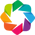

In [140]:
import pandas as pd
import holoviews as hv

from holoviews import dim, opts

hv.extension('bokeh')

In [142]:
sankey = hv.Sankey(pd.concat([sankey_df.loc[(sankey_df["source"]!="total direct impact") & (sankey_df["value"]>2)],sankey_df.loc[(sankey_df["source"]=="total direct impact")]]))
sankey.opts(
    label_position='outer',
    edge_color='target', node_color='index', cmap='tab20',
    width=1400,
    height=800,
    #cmap=nodes.data["color"].to_dict(),
    #edge_color="color",
    #labels ='name',
    #node_color="color",
    #label_text_font_size="14pt",
    #show_values=False,
    #title="Indirect final demand losses propagation"
)
sankey

/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, Extensi

:Sankey   [source,target]   (value)

In [40]:
# Group by 'Region' and aggregate direct impact and indirect impact
agg_df = merged_df.groupby(['sample',"MRIOT","invtype","simtype","variable",'region']).agg({'Direct_Impact': 'sum', 'total indirect impact': 'sum',"sample total direct damage":"first"}).reset_index()

# Sort the DataFrame by 'Direct_Impact'
agg_df = agg_df.sort_values(by='Direct_Impact', ascending=False)
agg_df = agg_df.loc[agg_df.Direct_Impact>0]
agg_df["direct impact share"] = agg_df["Direct_Impact"] / agg_df["sample total direct damage"]
agg_df["ratio"] = agg_df["total indirect impact"] * agg_df["direct impact share"]
agg_df = agg_df.groupby(["MRIOT","invtype","simtype","variable",'region'])[["ratio"]].mean().reset_index()
agg_df = agg_df.sort_values("ratio")
agg_df

MRIOT invtype     simtype            variable region        ratio
150  OECD21-2018   90-60   separated   production_losses    USA -3892.335105
74   OECD21-2018     9-6   separated   production_losses    USA -3595.161860
112  OECD21-2018   90-60  aggregated   production_losses    USA -3230.707666
36   OECD21-2018     9-6  aggregated   production_losses    USA -3146.013956
146  OECD21-2018   90-60   separated   production_losses    ROW -1380.504074
..           ...     ...         ...                 ...    ...          ...
127  OECD21-2018   90-60   separated  final_demand_unmet    ROW  1133.735226
17   OECD21-2018     9-6  aggregated  final_demand_unmet    USA  1765.499545
93   OECD21-2018   90-60  aggregated  final_demand_unmet    USA  1881.433963
55   OECD21-2018     9-6   separated  final_demand_unmet    USA  3068.838961
131  OECD21-2018   90-60   separated  final_demand_unmet    USA  3298.897563

[152 rows x 6 columns]

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(agg_df['region'], agg_df['ratio'], colors=agg_df["variable"], label='Indirect Impact in Europe')
plt.xlabel('Indirect Impact influence')
plt.ylabel('Directly Affected Region')
plt.title('Indirect Impact in Europe by Directly Affected Region')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xscale("symlog")
# Show the plot
plt.show()

Sample        MRIOT Inv. Scenario Event interaction ?  \
0           0  OECD21-2018           9-6                 Yes   
1           0  OECD21-2018           9-6                 Yes   
2           0  OECD21-2018           9-6                 Yes   
3           0  OECD21-2018           9-6                 Yes   
4           0  OECD21-2018           9-6                 Yes   
...       ...          ...           ...                 ...   
54395      99  OECD21-2018           9-6                  No   
54396      99  OECD21-2018         90-60                 Yes   
54397      99  OECD21-2018         90-60                 Yes   
54398      99  OECD21-2018         90-60                  No   
54399      99  OECD21-2018         90-60                  No   

                  Variable  Region  Total direct impact (€ Billions)  \
0      Final demand losses     ARG                               0.0   
1      Final demand losses     AUS                               0.0   
2      Final demand losses     AUT                               0.0   
3      Final demand losses     BEL                               0.0   
4      Final demand losses     BGR                               0.0   
...                    ...     ...                               ...   
54395    Production change  Europe                               0.0   
54396  Final demand losses  Europe                               0.0   
54397    Production change  Europe                               0.0   
54398  Final demand losses  Europe                               0.0   
54399    Production change  Europe                               0.0   

       Total indirect impact (€ Billions)  \
0                                0.086901   
1                                0.351991   
2                                0.169756   
3                                0.208576   
4                                0.038649   
...                                   ...   
54395                            2.178820   
54396                            2.072358   
54397                            2.878923   
54398                            4.622572   
54399                            2.820955   

       Sample total direct impact (€ Billions)  \
0                                   338.314777   
1                                   338.314777   
2                                   338.314777   
3                                   338.314777   
4                                   338.314777   
...                                        ...   
54395                               103.661265   
54396                               103.661265   
54397                               103.661265   
54398                               103.661265   
54399                               103.661265   

                                        Affected regions  \
0      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
1      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
2      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
3      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
4      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
...                                                  ...   
54395  [USA, CHN, JPN, TWN, ROW, VNM, MEX, HKG, PHL, ...   
54396  [USA, CHN, JPN, TWN, ROW, VNM, MEX, HKG, PHL, ...   
54397  [USA, CHN, JPN, TWN, ROW, VNM, MEX, HKG, PHL, ...   
54398  [USA, CHN, JPN, TWN, ROW, VNM, MEX, HKG, PHL, ...   
54399  [USA, CHN, JPN, TWN, ROW, VNM, MEX, HKG, PHL, ...   

       Relative indirect impact  
0                      0.000180  
1                      0.000262  
2                      0.000405  
3                      0.000388  
4                      0.000639  
...                         ...  
54395                  0.000120  
54396                  0.000114  
54397                  0.000159  
54398                  0.000255  
54399                  0.000155  

[54400 rows x 11 columns]

# Brouillon exploration

In [ ]:
aggregated_df = res_df[res_df["simtype"] == "aggregated"]
separated_df = res_df[res_df["simtype"] == "separated"]

# Merge aggregated and separated dataframes on specified columns
merged_df = pd.merge(aggregated_df, separated_df, on=["sample", "MRIOT", "invtype", "variable", "region"], suffixes=('','_separated'))

# Calculate the difference and create 'difference' rows
merged_df["total indirect impact"] = merged_df["total indirect impact"] - merged_df["total indirect impact_separated"]
merged_df["simtype"] = "difference"
merged_df = merged_df.loc[:, ~merged_df.columns.str.endswith('_separated')]
merged_df

mask = (merged_df["variable"] == "final_demand_unmet") | (merged_df["variable"] == "production_losses")
# Calculate 'relative indirect impact' based on variable
merged_df.loc[mask, 'relative indirect impact'] = merged_df.loc[mask, 'total indirect impact'] / merged_df.loc[mask, 'region'].map(final_demand_df if 'final_demand_unmet' in merged_df['variable'].values else production_region_df.groupby('region').sum())

# Append the 'difference' rows to the original dataframe
result_df = pd.concat([res_df, merged_df], ignore_index=True)
diff_df = result_df.filter(regex='^(?!.*(_separated|_aggregated)$)')
diff_df

In [ ]:
diff_df.loc[(diff_df.variable=="production_losses") & (diff_df.region=="Europe") & (diff_df["total direct impact"]==0) & (diff_df.simtype=="difference")].sort_values(by="relative indirect impact", ascending=False)

In [ ]:
# Set up the grid layout
plt.figure(figsize=(16, 8))

plot_df=diff_df.loc[(diff_df.variable=="production_losses") & (diff_df.region=="Europe") & (diff_df.simtype=="difference")].sort_values(by="total indirect impact", ascending=False).copy()
# Set up the grid layout
plot_df["hue"] = plot_df['simtype'].astype(str) + ', ' + plot_df['invtype'].astype(str)
g = sns.FacetGrid(plot_df, col="hue", hue="hue", col_wrap=2, height=4, aspect=2, sharey=False, legend_out=True)

# Plot scatter plots
g.map_dataframe(sns.scatterplot,
                y="total indirect impact",
                x="sample total direct damage")

# Add legend
g.add_legend(loc="upper right")

# Adjust layout
g.tight_layout()

# Show the plot
plt.show()

In [ ]:
diff_df.loc[(diff_df.variable=="production_losses") & (diff_df.region=="Europe") & (diff_df.simtype=="difference")].sort_values(by="relative indirect impact", ascending=False)

In [ ]:
combined_df.loc[(combined_df["sample"]==30)]

In [ ]:
combined_df.loc[(combined_df["sample"]==7)]

In [ ]:
import pandas as pd
import pickle as pkl
import math

def sigmoid_mapping(value, slope, midpoint,
                    start_in_intrvl=0, end_in_intrvl=0.005,
                    start_out_intrvl=-5, end_out_intrvl=5, max_duration=1000):
    """Map interval to sigmoid scaled interval"""
    # Map the input value from [start_in, end_in] to [start_out, end_out]
    normalized_value = (value) / (end_in_intrvl - start_in_intrvl) * (end_out_intrvl - start_out_intrvl) - end_out_intrvl

    # Apply sigmoid function with adjustable slope and midpoint
    shifted_value = normalized_value - midpoint
    sigmoid_result = 1 / (1 + math.exp(-slope * shifted_value))

    # Scale the result to [0, max_duration]
    scaled_result = sigmoid_result * max_duration

    return scaled_result


df_impact = pd.read_parquet("../outputs/EXIOBASE3-2010_df_impact.parquet")
with open("../outputs/sample_0/EXIOBASE3-2010_supchain.pkl","rb") as f:
    supchain = pkl.load(f)
meta_df_impact = df_impact.sum(axis=1).to_frame("total_damage").rename_axis("step")#.reset_index()
meta_df_impact["affected"] = df_impact.apply(lambda row:row[row>0].index.get_level_values(0).unique().to_list(), axis=1)
tmp = (df_impact / supchain.secs_exp.iloc[0]).groupby("region",axis=1).min().stack()
meta_df_impact["mean_shock_intensity"] = tmp.loc[tmp!=0].groupby(level=0).mean()
meta_df_impact["mean_shock_intensity_pct"] = meta_df_impact["mean_shock_intensity"]*100
meta_df_impact["recovery_duration"] = meta_df_impact["mean_shock_intensity"].apply(lambda x : sigmoid_mapping(x,slope=2, midpoint=-3.5)).round().astype(int)


In [ ]:
(df_impact / supchain.secs_exp.iloc[0]).groupby("region",axis=1).min()

In [ ]:
meta_df_impact

In [150]:
res_df = pd.read_parquet("../outputs/results_meta_df_OECD_update.parquet")
res_df

total direct impact  \
sample MRIOT       region sector                             
0      OECD21-2018 ARG    Agriculture                  0.0   
                          Agriculture                  0.0   
                          Agriculture                  0.0   
                          Agriculture                  0.0   
                          Agriculture                  0.0   
...                                                    ...   
99     OECD21-2018 ZAF    Utilities                    0.0   
                          Utilities                    0.0   
                          Utilities                    0.0   
                          Utilities                    0.0   
                          Utilities                    0.0   

                                       total indirect impact invtype  \
sample MRIOT       region sector                                       
0      OECD21-2018 ARG    Agriculture              18.662493   90-60   
                          Agriculture               7.301601   90-60   
                          Agriculture              20.008148   90-60   
                          Agriculture               9.961004   90-60   
                          Agriculture              19.248397     9-6   
...                                                      ...     ...   
99     OECD21-2018 ZAF    Utilities                 0.422882   90-60   
                          Utilities                 0.194304     9-6   
                          Utilities                 0.257449     9-6   
                          Utilities                 0.129435     9-6   
                          Utilities                 0.284795     9-6   

                                          simtype             variable  
sample MRIOT       region sector                                        
0      OECD21-2018 ARG    Agriculture  aggregated  production_realised  
                          Agriculture  aggregated   final_demand_unmet  
                          Agriculture   separated  production_realised  
                          Agriculture   separated   final_demand_unmet  
                          Agriculture  aggregated  production_realised  
...                                           ...                  ...  
99     OECD21-2018 ZAF    Utilities     separated   final_demand_unmet  
                          Utilities    aggregated  production_realised  
                          Utilities    aggregated   final_demand_unmet  
                          Utilities     separated  production_realised  
                          Utilities     separated   final_demand_unmet  

[536000 rows x 5 columns]

In [290]:
def add_europe(df,EU_regs):
    if "sector" in df.index.names:
        df.loc["Europe"] = df.loc[EU_regs].groupby("sector").sum()
    else:
        df.loc["Europe"] = df.loc[EU_regs].sum()
    return df

def get_affected_regions(group):
    affected_regions = group.loc[group["total direct impact"] > 0, ["region", "total direct impact"]]
    sorted_regions = affected_regions.sort_values(by="total direct impact", ascending=False)["region"].unique()
    return pd.Series({"affected regions": sorted_regions})

EU_regs_exio = ["AT","BE","BG","CH","DE","DK","EE","ES","FI","FR","GB","GR","HR","HU","IE","IT","LT","LU","LV","MT","NL","NO","PL","PT","RO","SE","SI","SK"]
EU_regs_wiod = ["AUT","BEL","BGR","CHE","DEU","DNK","EST","ESP","FIN","FRA","GBR","GRC","HRV","HUN","IRL","ITA","LTU","LUX","LVA","MLT","NLD","NOR","POL","PRT","ROU","SWE","SVN","SVK"]

if mriot_name == "OECD21":
    EU_regs = EU_regs_wiod
    with open("../outputs/OECD21-2018.pkl",'rb') as f:
        mriot = pkl.load(f)
else:
    EU_regs = EU_regs_exio
    with open("../outputs/EXIOBASE3-2010.pkl",'rb') as f:
        mriot = pkl.load(f)

VA_df = (mriot.x.T - mriot.Z.sum(axis=0)).loc['indout']
production_df = (mriot.x.T - mriot.Z.sum(axis=0)).loc['indout']
final_demand_df = mriot.Y.sum(axis=0).groupby("region").sum()

production_df = add_europe(production_df,EU_regs)
final_demand_df = add_europe(final_demand_df,EU_regs)

res_df = pd.read_parquet("../outputs/results_meta_df_OECD_update.parquet")
res_df = res_df.reset_index()

###################################################################################################################################################################
# The following lines sets the values for production_losses from production_realised such that positive values are production LOSSES and negative values are gains #
###################################################################################################################################################################
#res_df.loc[(res_df["variable"]=="production_realised"),"total indirect impact"] = res_df.loc[(res_df["variable"]=="production_realised"),"total indirect impact"]# * -1 # Positives == losses
res_df.replace(to_replace="production_realised", value="production_change", inplace=True)

res_df["sample total direct damage"] = res_df.groupby(["sample","MRIOT","invtype","simtype","variable"])["total direct impact"].transform("sum")
#affected_regions_df = res_df.groupby(["sample", "MRIOT", "invtype", "simtype", "variable"]).apply(get_affected_regions)
#affected_regions_df
res_df = res_df.groupby(["sample","MRIOT","invtype","simtype","variable", "region", "sector"])[["total direct impact","total indirect impact","sample total direct damage"]].agg(
    {"total direct impact":"sum",
     "total indirect impact":"sum",
     "sample total direct damage":"first"}).reset_index()
#res_df = res_df.merge(affected_regions_df, left_on=["sample", "MRIOT", "invtype", "simtype", "variable"], right_index=True)
# List of regions


# custom aggregation to handle the affected regions
grouped = res_df.loc[res_df.region.isin(EU_regs)].groupby(["sample", "MRIOT", "invtype", "simtype", "variable", "sector"]).agg({
    "region": lambda x: "Europe",  # Set region to "Europe"
    "total direct impact": "sum",   # Sum total direct impact
    "total indirect impact": "sum",  # Sum total indirect impact
    "sample total direct damage": "first",  # Sum sample total direct damage
}).reset_index()

# Display the updated DataFrame
res_df = pd.concat([res_df, grouped], ignore_index=True)
# Create a mask to filter rows where variable is "final_demand_unmet" or "production_change"
mask = (res_df["variable"] == "final_demand_unmet") | (res_df["variable"] == "production_change")

# Calculate 'relative indirect impact' based on variable
res_df.loc[mask, 'relative indirect impact'] = res_df.loc[mask, 'total indirect impact'] / res_df.loc[mask, 'region'].map(final_demand_df if 'final_demand_unmet' in res_df['variable'].values else production_region_df.groupby('region').sum())

In [291]:
res_df

sample        MRIOT invtype     simtype            variable  region  \
0            0  OECD21-2018     9-6  aggregated  final_demand_unmet     ARG   
1            0  OECD21-2018     9-6  aggregated  final_demand_unmet     ARG   
2            0  OECD21-2018     9-6  aggregated  final_demand_unmet     ARG   
3            0  OECD21-2018     9-6  aggregated  final_demand_unmet     ARG   
4            0  OECD21-2018     9-6  aggregated  final_demand_unmet     ARG   
...        ...          ...     ...         ...                 ...     ...   
543995      99  OECD21-2018   90-60   separated   production_change  Europe   
543996      99  OECD21-2018   90-60   separated   production_change  Europe   
543997      99  OECD21-2018   90-60   separated   production_change  Europe   
543998      99  OECD21-2018   90-60   separated   production_change  Europe   
543999      99  OECD21-2018   90-60   separated   production_change  Europe   

              sector  total direct impact  total indirect impact  \
0        Agriculture                  0.0               5.528040   
1       Construction                  0.0               0.513593   
2             Energy                  0.0               6.779914   
3        Manufacture                  0.0              49.772463   
4             Mining                  0.0               0.844852   
...              ...                  ...                    ...   
543995         Other                  0.0               7.173523   
543996         Sales                  0.0             331.230184   
543997      Services                  0.0             121.996183   
543998     Transport                  0.0             123.953948   
543999     Utilities                  0.0              14.091993   

        sample total direct damage  relative indirect impact  
0                     3.383148e+11              1.143898e-05  
1                     3.383148e+11              1.062761e-06  
2                     3.383148e+11              1.402945e-05  
3                     3.383148e+11              1.029925e-04  
4                     3.383148e+11              1.748223e-06  
...                            ...                       ...  
543995                1.036613e+11              3.952798e-07  
543996                1.036613e+11              1.825164e-05  
543997                1.036613e+11              6.722307e-06  
543998                1.036613e+11              6.830184e-06  
543999                1.036613e+11              7.765054e-07  

[544000 rows x 11 columns]

In [293]:
clean_df = res_df.copy()

# Replace variable values
clean_df['variable'] = clean_df['variable'].replace({'production_change': 'Production change', 'final_demand_unmet': 'Final demand losses'})
clean_df['simtype'] = clean_df['simtype'].replace({'aggregated': 'Yes', 'separated': 'No'})

# Replace column names
clean_df = clean_df.rename(columns={'total direct impact': 'Total direct impact (€ Billions)',
                                    'total indirect impact': 'Total indirect impact (€ Billions)',
                                    'sample total direct damage': 'Sample total direct impact (€ Billions)',
                                    'recovery_duration': 'Cumulated recovery time',
                                    'mean_shock_intensity': 'Mean sample shock intensity',
                                    'number of events': 'Sample number of events',
                                    'relative indirect impact' : 'Relative indirect impact',
                                    'variable':'Variable',
                                    'sample':'Sample',
                                    'region':'Region',
                                    'sector':'Sector',
                                    'affected regions':'Affected regions'
                                   })
clean_df['Total direct impact (€ Billions)'] = clean_df['Total direct impact (€ Billions)'] / 1e9  # Divide by 10^9 as direct impact are in €
clean_df['Total indirect impact (€ Billions)'] = clean_df['Total indirect impact (€ Billions)'] / 1e3  # Divide by 10^3 as indirect impact are in M€
clean_df["Sample total direct impact (€ Billions)"] = clean_df["Sample total direct impact (€ Billions)"] / 1e9 # Divide by 10^9 as direct impact are in €
clean_df = clean_df.rename(columns={'invtype': 'Inv. Scenario', 'simtype': 'Event interaction ?'})
clean_df

Sample        MRIOT Inv. Scenario Event interaction ?  \
0            0  OECD21-2018           9-6                 Yes   
1            0  OECD21-2018           9-6                 Yes   
2            0  OECD21-2018           9-6                 Yes   
3            0  OECD21-2018           9-6                 Yes   
4            0  OECD21-2018           9-6                 Yes   
...        ...          ...           ...                 ...   
543995      99  OECD21-2018         90-60                  No   
543996      99  OECD21-2018         90-60                  No   
543997      99  OECD21-2018         90-60                  No   
543998      99  OECD21-2018         90-60                  No   
543999      99  OECD21-2018         90-60                  No   

                   Variable  Region        Sector  \
0       Final demand losses     ARG   Agriculture   
1       Final demand losses     ARG  Construction   
2       Final demand losses     ARG        Energy   
3       Final demand losses     ARG   Manufacture   
4       Final demand losses     ARG        Mining   
...                     ...     ...           ...   
543995    Production change  Europe         Other   
543996    Production change  Europe         Sales   
543997    Production change  Europe      Services   
543998    Production change  Europe     Transport   
543999    Production change  Europe     Utilities   

        Total direct impact (€ Billions)  Total indirect impact (€ Billions)  \
0                                    0.0                            0.005528   
1                                    0.0                            0.000514   
2                                    0.0                            0.006780   
3                                    0.0                            0.049772   
4                                    0.0                            0.000845   
...                                  ...                                 ...   
543995                               0.0                            0.007174   
543996                               0.0                            0.331230   
543997                               0.0                            0.121996   
543998                               0.0                            0.123954   
543999                               0.0                            0.014092   

        Sample total direct impact (€ Billions)  Relative indirect impact  
0                                    338.314777              1.143898e-05  
1                                    338.314777              1.062761e-06  
2                                    338.314777              1.402945e-05  
3                                    338.314777              1.029925e-04  
4                                    338.314777              1.748223e-06  
...                                         ...                       ...  
543995                               103.661265              3.952798e-07  
543996                               103.661265              1.825164e-05  
543997                               103.661265              6.722307e-06  
543998                               103.661265              6.830184e-06  
543999                               103.661265              7.765054e-07  

[544000 rows x 11 columns]

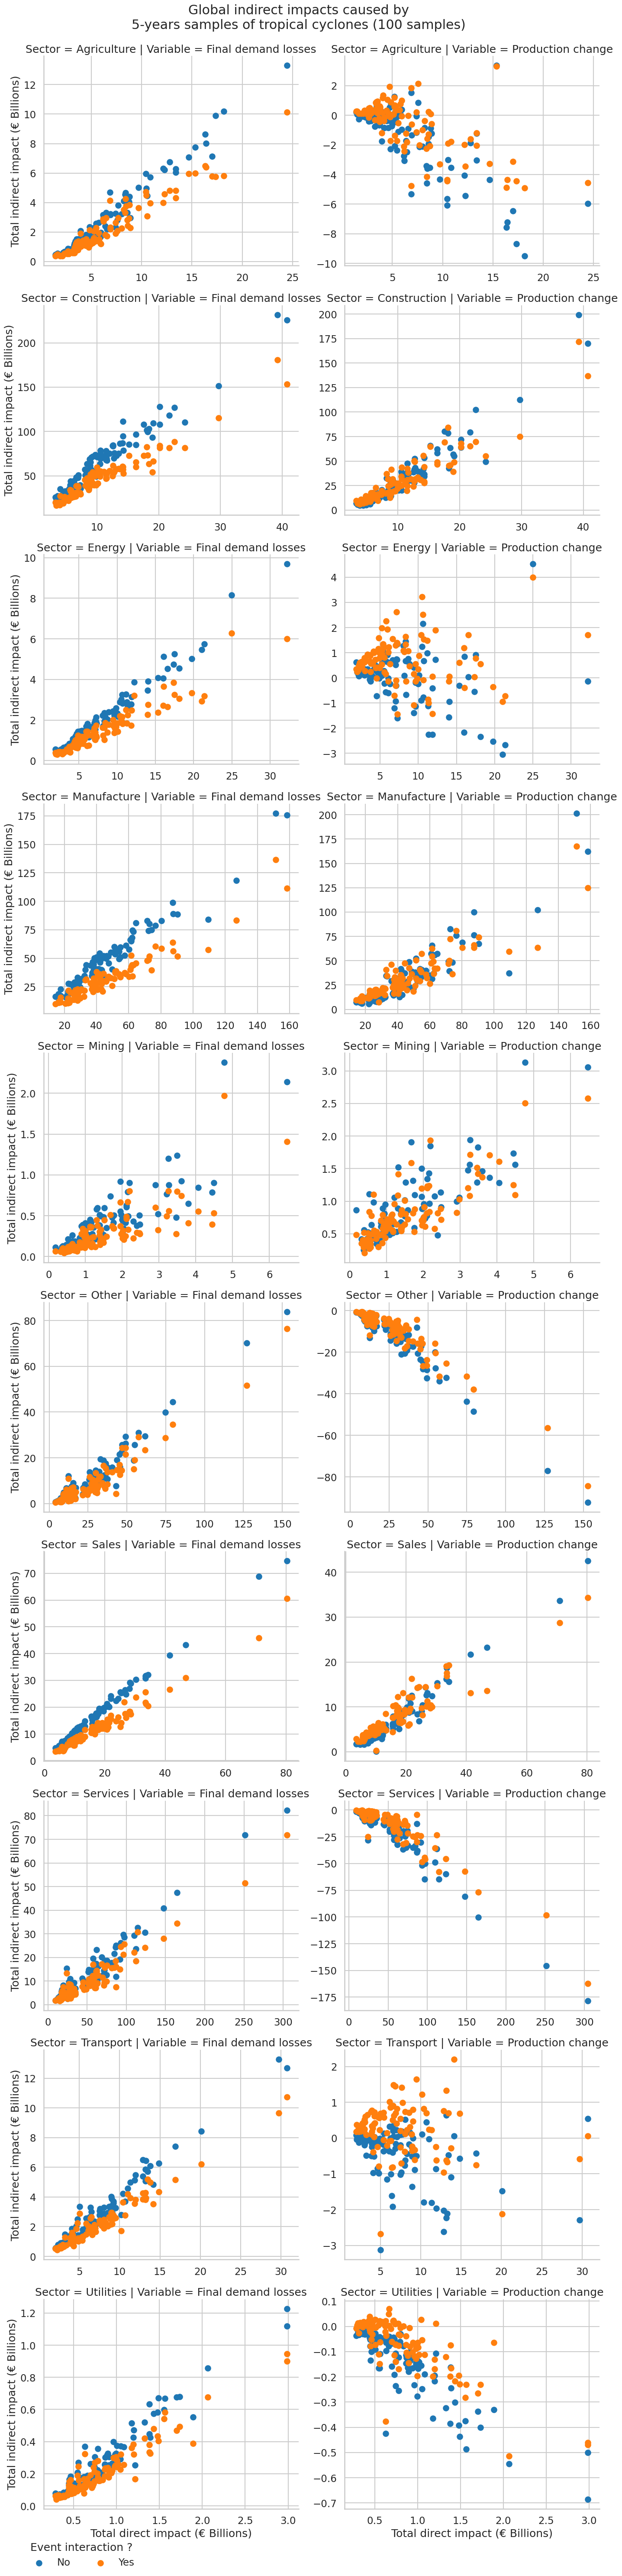

In [299]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Sample DataFrame
df = clean_df.loc[clean_df["Inv. Scenario"]=="9-6"].groupby(
    [
        'Sample', 'MRIOT', 'Inv. Scenario', 'Event interaction ?', 'Variable', "Sector",
    ],as_index=False)[['Total direct impact (€ Billions)', 'Total indirect impact (€ Billions)']].sum()

# Replace column names
# Set the style of the plot
sns.set_style("whitegrid")
#sns.set(style="whitegrid")
sns.set_context("talk",font_scale=1)

# Create a facet grid plot
g = sns.FacetGrid(df, col="Variable", row="Sector", hue="Event interaction ?", sharey=False, sharex=False, aspect=1.2, height=6)

# Map the scatter plot on the facet grid
g.map(plt.scatter, "Total direct impact (€ Billions)", "Total indirect impact (€ Billions)")

#g.map(sns.regplot, "Global direct impact (€ Billions)", "Global indirect impact (€ Billions)", scatter=False, lowess=True)

# Add a legend
g.add_legend()
sns.move_legend(g, "lower left", ncol=2,bbox_to_anchor=(0.05,-0.01))
g.fig.subplots_adjust(top=0.96)
bbox = g.axes[0,0].get_position()
center=bbox.x1#+bbox.x1)
plt.suptitle("Global indirect impacts caused by\n5-years samples of tropical cyclones (100 samples)", x=center) 
# Show the plot
plt.show()
g.savefig("../../../../Latex/imgs-general/Plots/GlobalTCs/Global_IEI_vs_DEI_9-6_per_sector.pdf")

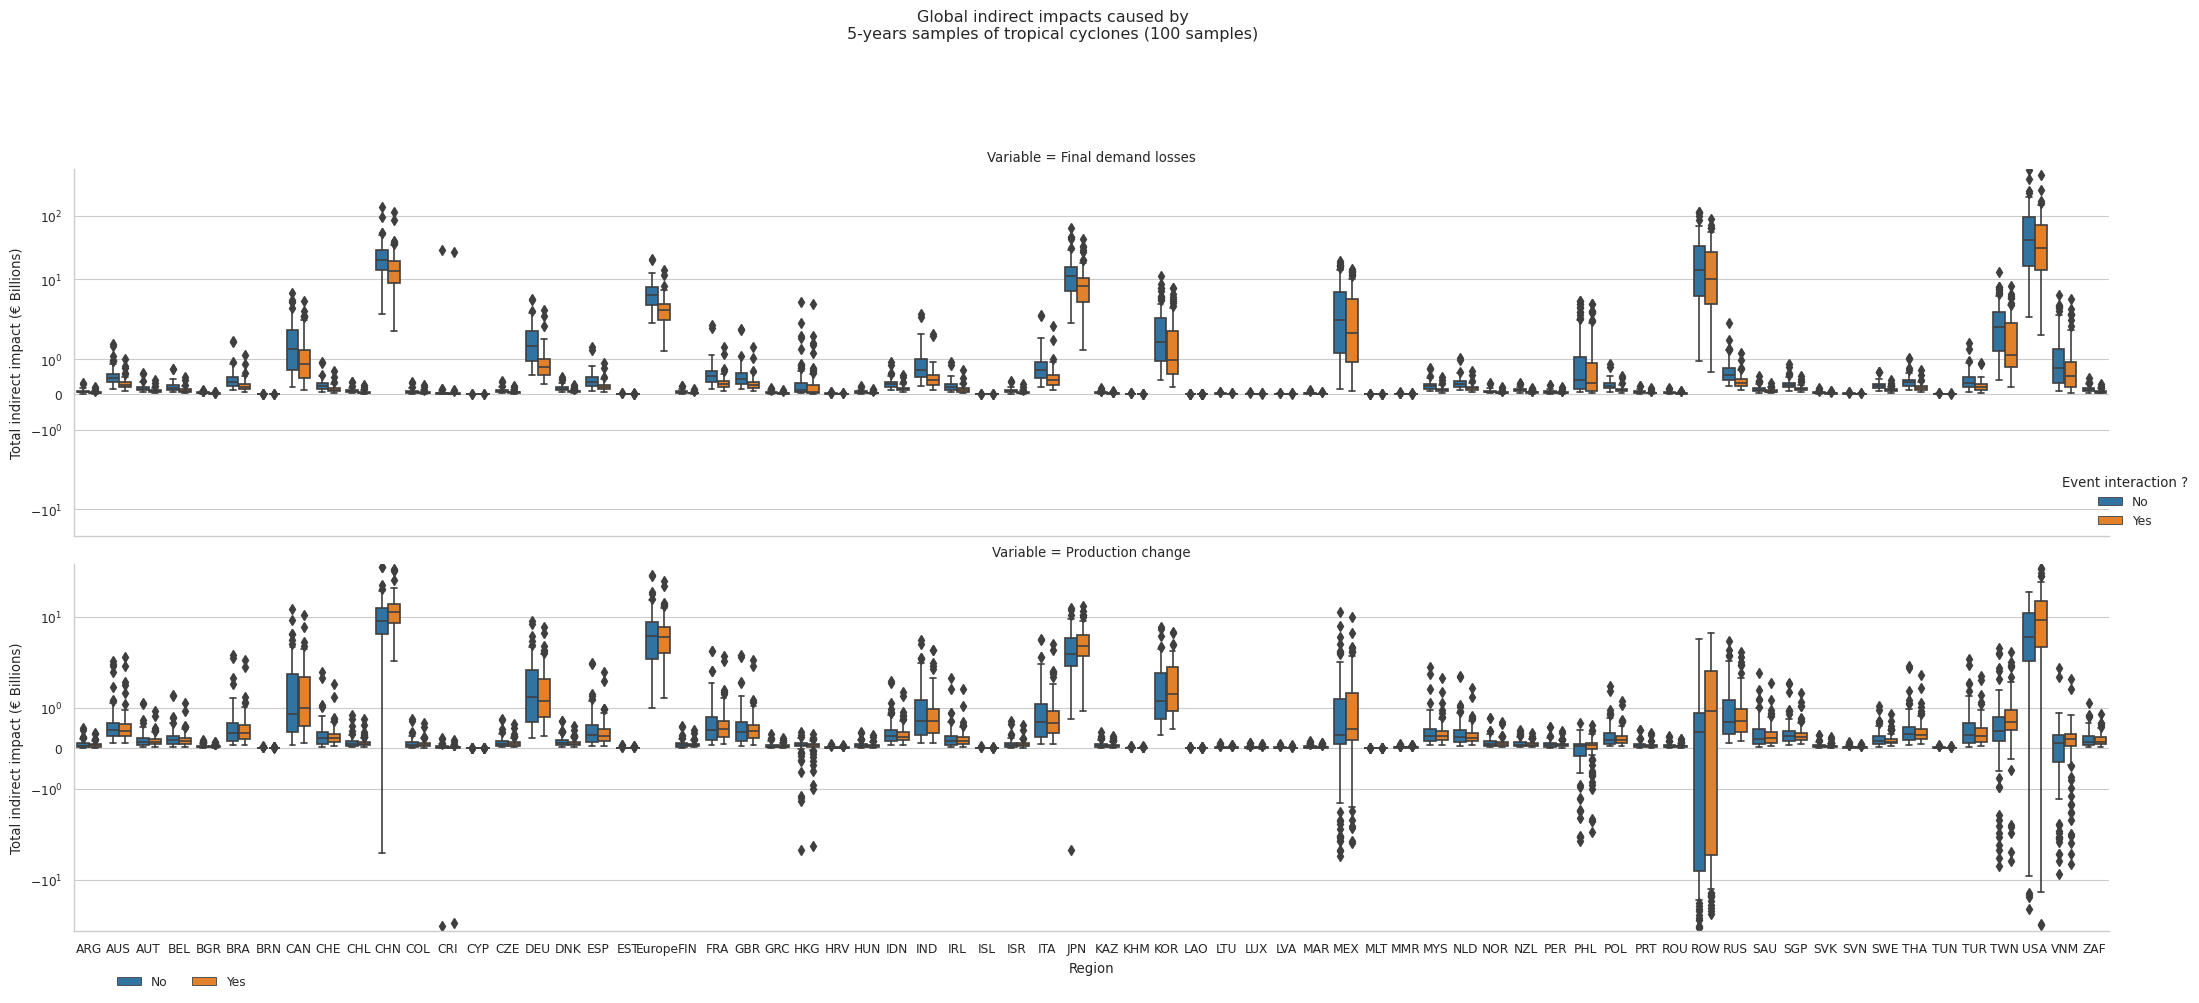

In [313]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Sample DataFrame
df = clean_df.loc[clean_df["Inv. Scenario"]=="9-6"].groupby(
    [
        'Sample', 'MRIOT', 'Inv. Scenario', 'Event interaction ?', 'Variable', "Region",
    ],as_index=False)[['Total direct impact (€ Billions)', 'Total indirect impact (€ Billions)']].sum()

# Replace column names
# Set the style of the plot
sns.set_style("whitegrid")
#sns.set(style="whitegrid")
sns.set_context("paper",font_scale=1)

# Create a facet grid plot
g = sns.catplot(df,x="Region", y="Total indirect impact (€ Billions)", row="Variable", hue="Event interaction ?", sharey=False, aspect=4, height=5, kind="box")

# Map the scatter plot on the facet grid
#g.map(sns.regplot, "Global direct impact (€ Billions)", "Global indirect impact (€ Billions)", scatter=False, lowess=True)

# Add a legend
g.add_legend()
sns.move_legend(g, "lower left", ncol=2,bbox_to_anchor=(0.05,-0.01))
g.fig.subplots_adjust(top=0.82)
bbox = g.axes[0,0].get_position()
center=bbox.x1/2#+bbox.x1)
plt.suptitle("Global indirect impacts caused by\n5-years samples of tropical cyclones (100 samples)", x=center) 

g.set(yscale="symlog")
# Show the plot
plt.show()
#g.savefig("../../../../Latex/imgs-general/Plots/GlobalTCs/Global_IEI_vs_DEI_9-6_per_sector.pdf")

In [450]:
clean_df.loc[clean_df["Region"]=="Europe"].sort_values("Total indirect impact (€ Billions)")

Sample        MRIOT Inv. Scenario Event interaction ?  \
53615       1  OECD21-2018         90-60                  No   
53611       1  OECD21-2018           9-6                  No   
53879      34  OECD21-2018         90-60                  No   
53875      34  OECD21-2018           9-6                  No   
53609       1  OECD21-2018           9-6                 Yes   
...       ...          ...           ...                 ...   
53612       1  OECD21-2018         90-60                 Yes   
53610       1  OECD21-2018           9-6                  No   
53874      34  OECD21-2018           9-6                  No   
53614       1  OECD21-2018         90-60                  No   
53878      34  OECD21-2018         90-60                  No   

                  Variable  Region  Total direct impact (€ Billions)  \
53615    Production change  Europe                               0.0   
53611    Production change  Europe                               0.0   
53879    Production change  Europe                               0.0   
53875    Production change  Europe                               0.0   
53609    Production change  Europe                               0.0   
...                    ...     ...                               ...   
53612  Final demand losses  Europe                               0.0   
53610  Final demand losses  Europe                               0.0   
53874  Final demand losses  Europe                               0.0   
53614  Final demand losses  Europe                               0.0   
53878  Final demand losses  Europe                               0.0   

       Total indirect impact (€ Billions)  \
53615                          -37.369501   
53611                          -36.958044   
53879                          -35.934093   
53875                          -35.753508   
53609                          -30.977600   
...                                   ...   
53612                           15.826257   
53610                           20.344278   
53874                           21.005007   
53614                           22.452307   
53878                           23.189634   

       Sample total direct impact (€ Billions)  \
53615                               807.546212   
53611                               807.546212   
53879                               744.458426   
53875                               744.458426   
53609                               807.546212   
...                                        ...   
53612                               807.546212   
53610                               807.546212   
53874                               744.458426   
53614                               807.546212   
53878                               744.458426   

                                        Affected regions  \
53615  [USA, ROW, JPN, CHN, TWN, KOR, CAN, MEX, PHL, ...   
53611  [USA, ROW, JPN, CHN, TWN, KOR, CAN, MEX, PHL, ...   
53879  [USA, ROW, CHN, KOR, JPN, MEX, PHL, TWN, VNM, ...   
53875  [USA, ROW, CHN, KOR, JPN, MEX, PHL, TWN, VNM, ...   
53609  [USA, ROW, JPN, CHN, TWN, KOR, CAN, MEX, PHL, ...   
...                                                  ...   
53612  [USA, ROW, JPN, CHN, TWN, KOR, CAN, MEX, PHL, ...   
53610  [USA, ROW, JPN, CHN, TWN, KOR, CAN, MEX, PHL, ...   
53874  [USA, ROW, CHN, KOR, JPN, MEX, PHL, TWN, VNM, ...   
53614  [USA, ROW, JPN, CHN, TWN, KOR, CAN, MEX, PHL, ...   
53878  [USA, ROW, CHN, KOR, JPN, MEX, PHL, TWN, VNM, ...   

       Relative indirect impact  Cumulated recovery time  \
53615                 -0.002059                     5067   
53611                 -0.002036                     5067   
53879                 -0.001980                     6933   
53875                 -0.001970                     6933   
53609                 -0.001707                     5067   
...                         ...                      ...   
53612                  0.000872                     5067   
53610                  0.00112

In [457]:
clean_df.loc[(clean_df["Inv. Scenario"]=="9-6") & (clean_df["Region"]=="Europe") & (clean_df["Event interaction ?"]=="Yes") & (clean_df["Variable"]=="Production change")]

Sample        MRIOT Inv. Scenario Event interaction ?  \
53601       0  OECD21-2018           9-6                 Yes   
53609       1  OECD21-2018           9-6                 Yes   
53617       2  OECD21-2018           9-6                 Yes   
53625       3  OECD21-2018           9-6                 Yes   
53633       4  OECD21-2018           9-6                 Yes   
...       ...          ...           ...                 ...   
54361      95  OECD21-2018           9-6                 Yes   
54369      96  OECD21-2018           9-6                 Yes   
54377      97  OECD21-2018           9-6                 Yes   
54385      98  OECD21-2018           9-6                 Yes   
54393      99  OECD21-2018           9-6                 Yes   

                Variable  Region  Total direct impact (€ Billions)  \
53601  Production change  Europe                               0.0   
53609  Production change  Europe                               0.0   
53617  Production change  Europe                               0.0   
53625  Production change  Europe                               0.0   
53633  Production change  Europe                               0.0   
...                  ...     ...                               ...   
54361  Production change  Europe                               0.0   
54369  Production change  Europe                               0.0   
54377  Production change  Europe                               0.0   
54385  Production change  Europe                               0.0   
54393  Production change  Europe                               0.0   

       Total indirect impact (€ Billions)  \
53601                          -14.782474   
53609                          -30.977600   
53617                           -4.657309   
53625                           -3.358087   
53633                           -4.774313   
...                                   ...   
54361                          -13.129902   
54369                           -2.451594   
54377                           -3.114411   
54385                           -1.233491   
54393                           -2.357676   

       Sample total direct impact (€ Billions)  \
53601                               338.314777   
53609                               807.546212   
53617                                87.411724   
53625                                85.613788   
53633                               178.798980   
...                                        ...   
54361                               426.513670   
54369                                63.452378   
54377                               105.550599   
54385                                47.083070   
54393                               103.661265   

                                        Affected regions  \
53601  [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
53609  [USA, ROW, JPN, CHN, TWN, KOR, CAN, MEX, PHL, ...   
53617  [ROW, CHN, JPN, USA, MEX, KOR, TWN, VNM, HKG, ...   
53625  [ROW, CHN, JPN, USA, TWN, KOR, MEX, PHL, VNM, ...   
53633  [USA, CHN, ROW, JPN, VNM, TWN, HKG, KOR, CAN, ...   
...                                                  ...   
54361  [USA, ROW, CHN, JPN, TWN, KOR, PHL, CAN, VNM, ...   
54369  [CHN, JPN, MEX, USA, ROW, TWN, PHL, VNM, HKG, ...   
54377  [USA, CHN, JPN, ROW, KOR, TWN, HKG, VNM, CAN, ...   
54385  [CHN, JPN, USA, ROW, KOR, VNM, MEX, TWN, PHL, ...   
54393  [USA, CHN, JPN, TWN, ROW, VNM, MEX, HKG, PHL, ...   

       Relative indirect impact  Cumulated recovery time  \
53601                 -0.000815                     6501   
53609                 -0.001707                     5067   
53617                 -0.000257                     2541   
53625                 -0.000185                     2650   
53633                 -0.000263                     2738   
...                         ...                      ...   
54361                 -0.000723                     6122   
54369                 -0.000135                     32

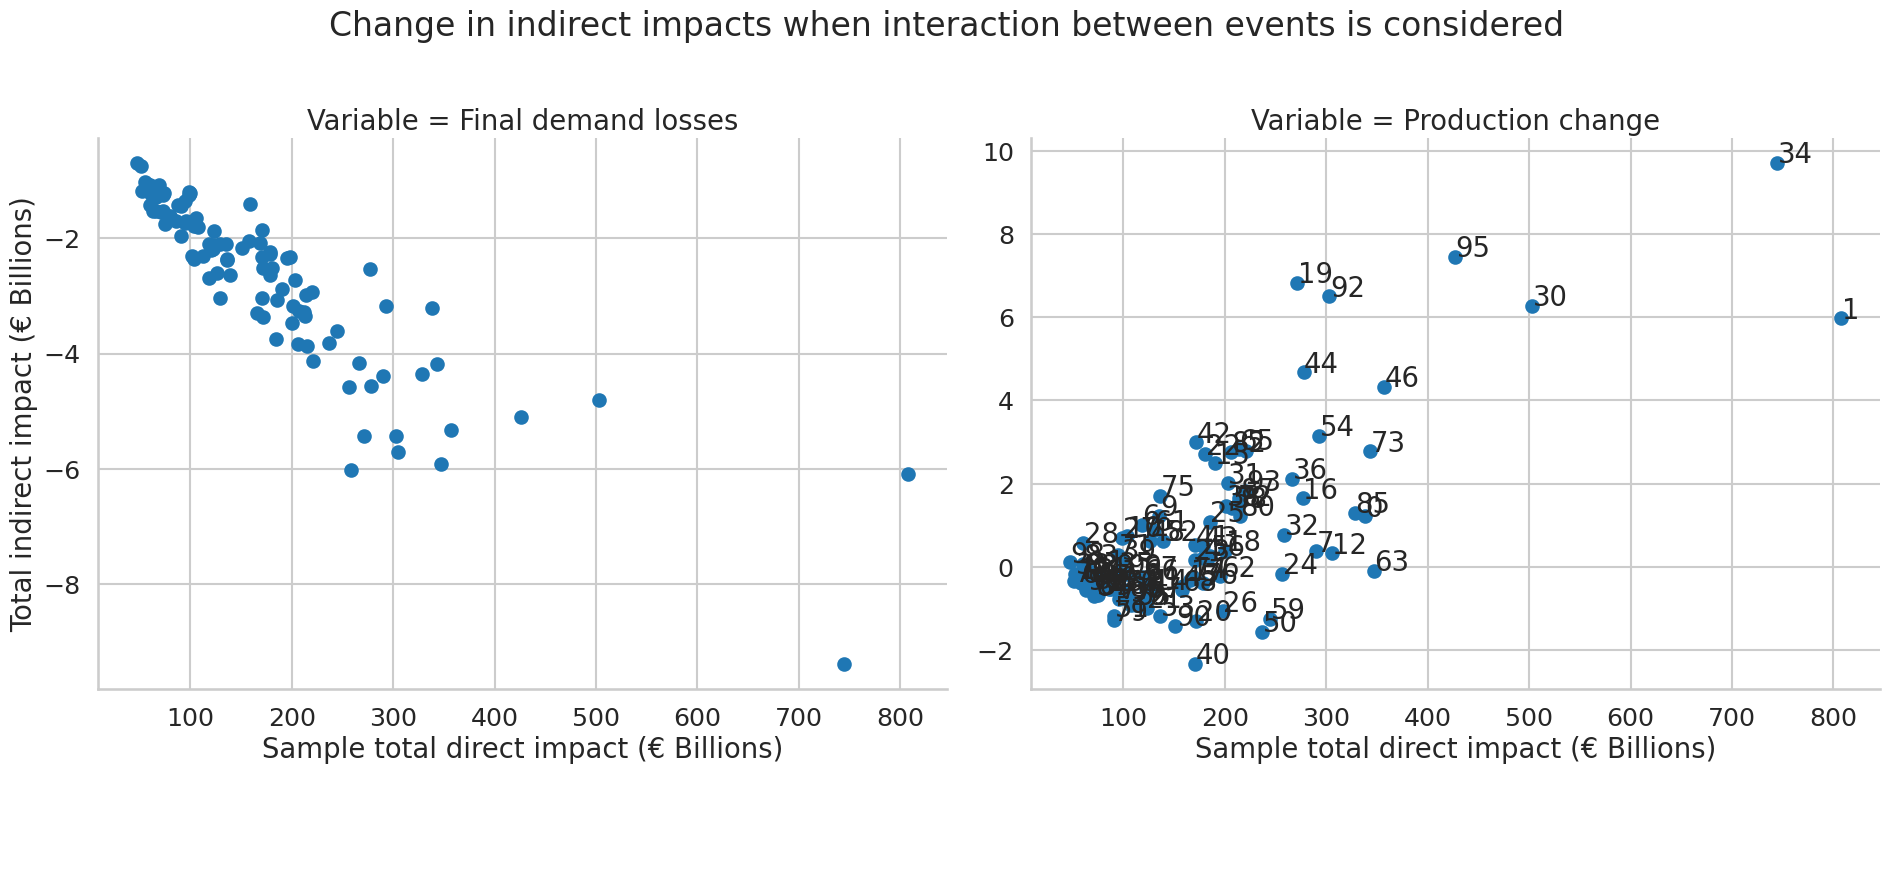

In [338]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Sample DataFrame
df = clean_df.loc[(clean_df["Inv. Scenario"]=="9-6") & (clean_df["Region"]=="Europe")].groupby(
    [
        'Sample', 'MRIOT', 'Inv. Scenario', 'Event interaction ?', 'Variable'
    ],as_index=False)[['Sample total direct impact (€ Billions)', 'Total indirect impact (€ Billions)']].agg({"Sample total direct impact (€ Billions)":"first",'Total indirect impact (€ Billions)':"sum"})

df_1 = df.groupby(
    [
        'Sample', 'MRIOT', 'Inv. Scenario', 'Variable'
    ])['Total indirect impact (€ Billions)'].agg(lambda x: x.iloc[1] - x.iloc[0])

df_2 = df.groupby(
    [
        'Sample', 'MRIOT', 'Inv. Scenario', 'Variable'
    ])['Sample total direct impact (€ Billions)'].agg("first")

df = df_1.to_frame().join(df_2).reset_index()

# Replace column names
# Set the style of the plot
sns.set_style("whitegrid")
#sns.set(style="whitegrid")
sns.set_context("talk",font_scale=1.1)

# Create a facet grid plot
g = sns.FacetGrid(df, col="Variable", sharey=False, aspect=1.2, height=8)

# Map the scatter plot on the facet grid
g.map(plt.scatter, "Sample total direct impact (€ Billions)", "Total indirect impact (€ Billions)")


for row in df.loc[df["Variable"]=="Production change"].itertuples():
    ax = g.axes[0, 1]
    ax.text(row[6] + 0.5, row[5], row[1], horizontalalignment='left')

#g.map(sns.regplot, "Global direct impact (€ Billions)", "Global indirect impact (€ Billions)", scatter=False, lowess=True)

# Add a legend
g.add_legend()
sns.move_legend(g, "lower left", ncol=2,bbox_to_anchor=(0.05,-0.1))
g.fig.subplots_adjust(top=0.82)
bbox = g.axes[0,0].get_position()
center=bbox.x1#+bbox.x1)
plt.suptitle("Change in indirect impacts when interaction between events is considered", x=center) 
# Show the plot
plt.show()
#g.savefig("../../../../Latex/imgs-general/Plots/GlobalTCs/Global_IEI_vs_DEI_9-6.pdf")

In [ ]:
with open(f"../results_for_zelie/OECD21-2018.pkl",'rb') as f:
    mriot = pkl.load(f)

file_template = r"([^/]+)_([^/]+)_event_(\d+)/([\w-]+)\.parquet"
for sample_number in [1,30,34,40,59,63,95]/

In [443]:
def treat_sample(sample_number):
    df_impact = pd.read_parquet(f"../results_for_zelie/sample_{sample_number}/OECD21-2018_df_impact.parquet")
    df_impact = df_impact.reset_index(names=["step"])
    df_impact["step"] = df_impact["step"].astype(int)
    df_impact = df_impact.set_index("step", append=True)

    meta_df_impact = pd.read_parquet(f"../results_for_zelie/sample_{sample_number}/OECD21-2018_meta_df_impact.parquet")
    meta_df_impact = meta_df_impact.reset_index(names=["step"])
    meta_df_impact["step"] = meta_df_impact["step"].astype(int)

    # Simulation specific
    inv_sce = "9-6"

    production_df = pd.read_parquet(f"../results_for_zelie/sample_{sample_number}/OECD21-2018_{inv_sce}_event_aggregated/production_realised.parquet")
    final_demand_df = pd.read_parquet(f"../results_for_zelie/sample_{sample_number}/OECD21-2018_{inv_sce}_event_aggregated/final_demand_unmet.parquet")
    
    df_impact_countries = df_impact.T.groupby("region").sum().T
    df_impact_countries.drop(labels=df_impact_countries.columns[(df_impact_countries == 0).all()], axis=1)
    
    sample_directory = Path(f"../results_for_zelie/sample_{sample_number}/")

    # Create a dictionary to store the key-value pairs
    file_dict = {}

    # Iterate through the directory and its subdirectories
    for file in sample_directory.rglob("*.parquet"):
        file_path = Path(file.parents[0].name + "/" + file.name)
        file_info = extract_file_info(file_path)
        if file_info:
            file_dict[file_info] = file.resolve()

    # Build a nested dictionary from the file_dict
    nested_dict = build_nested_dict(file_dict)

    # Compute the difference between all events and each event individually
    results = compute_difference(nested_dict, progress=True)
    meta_df_agg = aggregate_results(results,sample_number)
    
    direct_impact_df = df_impact_countries.copy()
    direct_impact_df = direct_impact_df / 10**6 # make it in the same unit as results (M€)
    direct_impact_df.columns.name = None
    direct_impact_df = direct_impact_df.reset_index(names=["event_id","step"])
    
    
    
    final_results = meta_df_agg.merge(direct_impact_df)[["sample","MRIOT","invtype","event_id","variable","region","total indirect impact"]+df_impact_countries.columns.to_list()]
    return final_results, direct_impact_df, meta_df_agg, results

In [451]:
final_results, direct_impact_df, meta_df_agg, results = treat_sample(1)

Processing OECD21-2018/90-60/production_realised: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37/37 [01:37<00:00,  2.64s/it]


In [448]:
final_results.region.unique()

array(['ARG', 'AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'BRN', 'CAN', 'CHE',
       'CHL', 'CHN', 'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP',
       'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HKG', 'HRV', 'HUN', 'IDN',
       'IND', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KAZ', 'KHM', 'KOR',
       'LAO', 'LTU', 'LUX', 'LVA', 'MAR', 'MEX', 'MLT', 'MMR', 'MYS',
       'NLD', 'NOR', 'NZL', 'PER', 'PHL', 'POL', 'PRT', 'ROU', 'ROW',
       'RUS', 'SAU', 'SGP', 'SVK', 'SVN', 'SWE', 'THA', 'TUN', 'TUR',
       'TWN', 'USA', 'VNM', 'ZAF'], dtype=object)

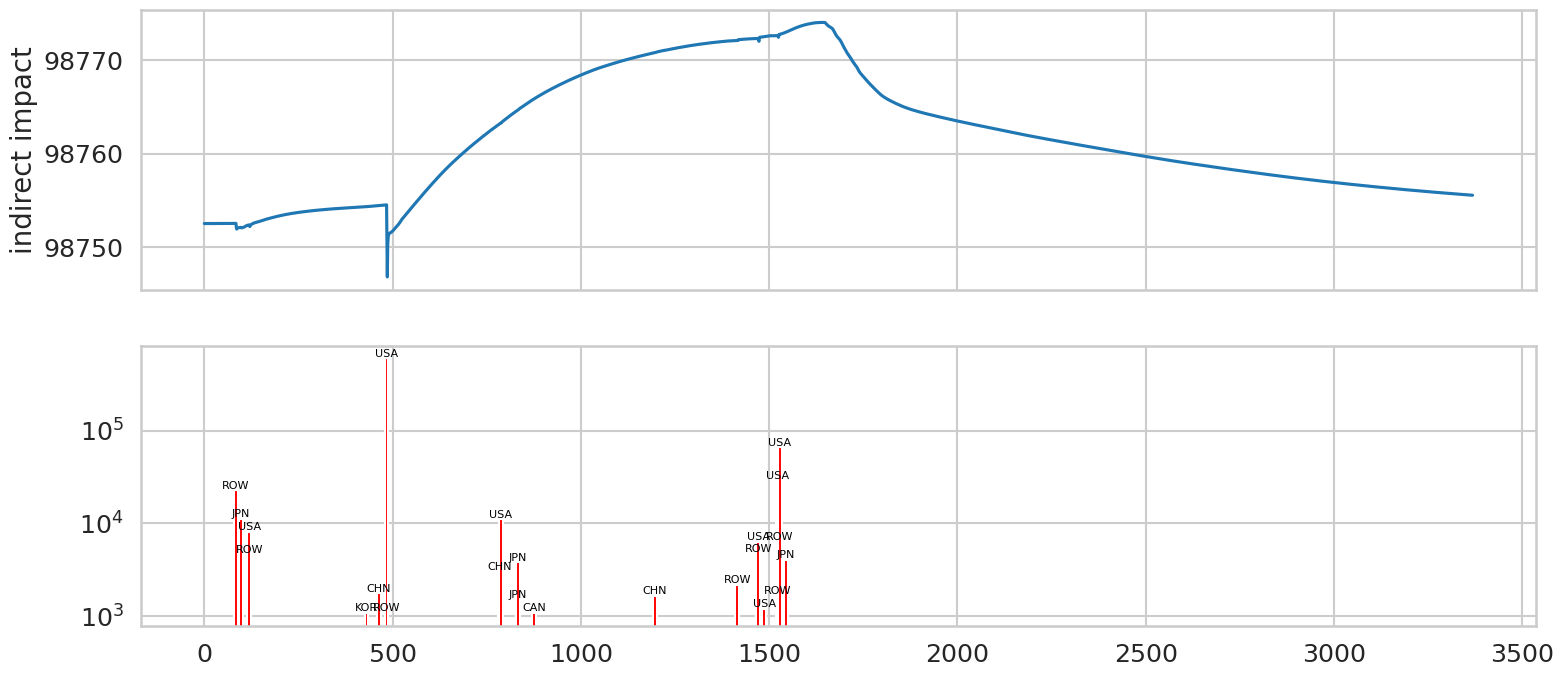

In [460]:
import matplotlib.pyplot as plt

region = EU_regs_wiod

fig,axs = plt.subplots(figsize=(18,8),nrows=2, sharex=True)

indirect_impact_from_all_ev = results["OECD21-2018"]["9-6"]["production_realised"][-99]
indirect_impact_from_all_ev_norm = indirect_impact_from_all_ev / indirect_impact_from_all_ev.loc[0]

dir_imp_plot = direct_impact_df.melt(id_vars=["event_id",'step'],var_name="region",value_name="direct impact")
dir_imp_plot = dir_imp_plot.loc[dir_imp_plot["direct impact"]!=0].copy()
dir_imp_plot["step"] += 1
dir_imp_plot["step"] = dir_imp_plot["step"].astype(int)

# Exemple 
plot_df = indirect_impact_from_all_ev.loc[:,pd.IndexSlice[region,:]].sum(axis=1).reset_index().copy()
plot_df = plot_df.rename(columns={0:"indirect impact"})
plot_df["step"] = plot_df["step"].astype(int)

plot_df = plot_df.merge(dir_imp_plot, on="step", how="left")
valid_indices = ~pd.isna(plot_df.event_id) & (plot_df["direct impact"] > 1e3)
bar_width = 10

sns.lineplot(plot_df, x="step", y="indirect impact", ax=axs[0])
#bars = ax2.bar(direct_impact.date[valid_indices]-205, direct_impact.at_event[valid_indices]/1e9, width=bar_width, color='r', label='Direct impact', alpha=1)
bars = axs[1].bar(plot_df.loc[valid_indices,"step"], plot_df.loc[valid_indices,"direct impact"], width=bar_width, color='r', label='Direct impact', alpha=1)
axs[1].set_yscale("log")

for bar, label in zip(bars, plot_df.loc[valid_indices,"region"]):
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, label, va='bottom', ha='center', color='black', size=8)

axs[0].ticklabel_format(useOffset=False)
    
#ax2.set_ylabel('Direct Impact Value [€ Billions]')
#ax2.set_ylim(0,30)
#ax2.set_xlim(0,2000)
#ax2.legend(loc='upper right')

#sns.barplot(plot_df[valid_indices], x="step", y="direct impact", hue="region", ax=axs[1], dodge=False)
#axs[1]. xlabel('step')
#axs[1].ylabel('Direct Impact')
#axs[1].yscale("log")

#indirect_impact_from_all_ev = results["OECD21-2018"]["9-6"]["production_realised"][-98]
#indirect_impact_from_all_ev_norm = indirect_impact_from_all_ev / indirect_impact_from_all_ev.loc[0]

In [461]:
res_df = pd.read_parquet("../outputs/results_meta_df_OECD_update.parquet")
res_df = res_df.reset_index()

In [465]:
res_df.loc[(res_df["region"]=="AUT")].sort_values("total indirect impact")

sample        MRIOT region       sector  total direct impact  \
525517      98  OECD21-2018    AUT    Utilities                  0.0   
150317      28  OECD21-2018    AUT    Utilities                  0.0   
514797      96  OECD21-2018    AUT    Utilities                  0.0   
370046      69  OECD21-2018    AUT        Other                  0.0   
525513      98  OECD21-2018    AUT    Utilities                  0.0   
...        ...          ...    ...          ...                  ...   
5548         1  OECD21-2018    AUT  Manufacture                  0.0   
182430      34  OECD21-2018    AUT  Manufacture                  0.0   
182426      34  OECD21-2018    AUT  Manufacture                  0.0   
5550         1  OECD21-2018    AUT  Manufacture                  0.0   
5546         1  OECD21-2018    AUT  Manufacture                  0.0   

        total indirect impact invtype     simtype             variable  
525517               0.034713     9-6  aggregated   final_demand_unmet  
150317               0.034945     9-6  aggregated   final_demand_unmet  
514797               0.035339     9-6  aggregated   final_demand_unmet  
370046               0.036129     9-6   separated  production_realised  
525513               0.036837   90-60  aggregated   final_demand_unmet  
...                       ...     ...         ...                  ...  
5548               529.615234     9-6  aggregated  production_realised  
182430             612.736602     9-6   separated  production_realised  
182426             614.512099   90-60   separated  production_realised  
5550               637.193756     9-6   separated  production_realised  
5546               641.917556   90-60   separated  production_realised  

[8000 rows x 9 columns]